# Generate Candidate-Job Feature Score Matrix using Semantic Feature Code (BERT-based Embedding + Cosine Similarity)


Job Title: Data Science Co-op
Skills Required: ['LLMs via APIs', 'Understanding of application of dense vector', 'text embedding models for finding semantic similarity', 'NoSQL', 'Vector Database', 'Graph construction', 'AWS', 'Azure', 'Python', 'Data visualization', 'matplotlib', 'plotly', 'Power BI', 'Infrastructure as code']

Candidate: Aishwarya Kumar Arvind
Candidate Skills: ['Android Development', 'Machine Learning', 'Full-Stack Development', 'Web Development', 'Artificial Intelligence AI', 'Algorithms', 'MongoDB', 'SQL', 'Node.js', 'React.js', 'Cascading Style Sheets CSS', 'C++', 'Unix', 'Microsoft Office', 'LabVIEW', 'Matlab', 'C', 'HTML', 'Java', 'JavaScript', 'Public Speaking', 'Team Leadership', 'Conflict Resolution', 'Palantir', 'Databases', 'Microsoft Excel', 'Python Programming Language']
Matched Skills: set()
Semantic Match Score: 0.41449999809265137

Candidate: Meena Periasamy
Candidate Skills: ['SQL', 'R', 'BigQuery', 'Business Analysis', 'BI', 'Business Process', 'Da

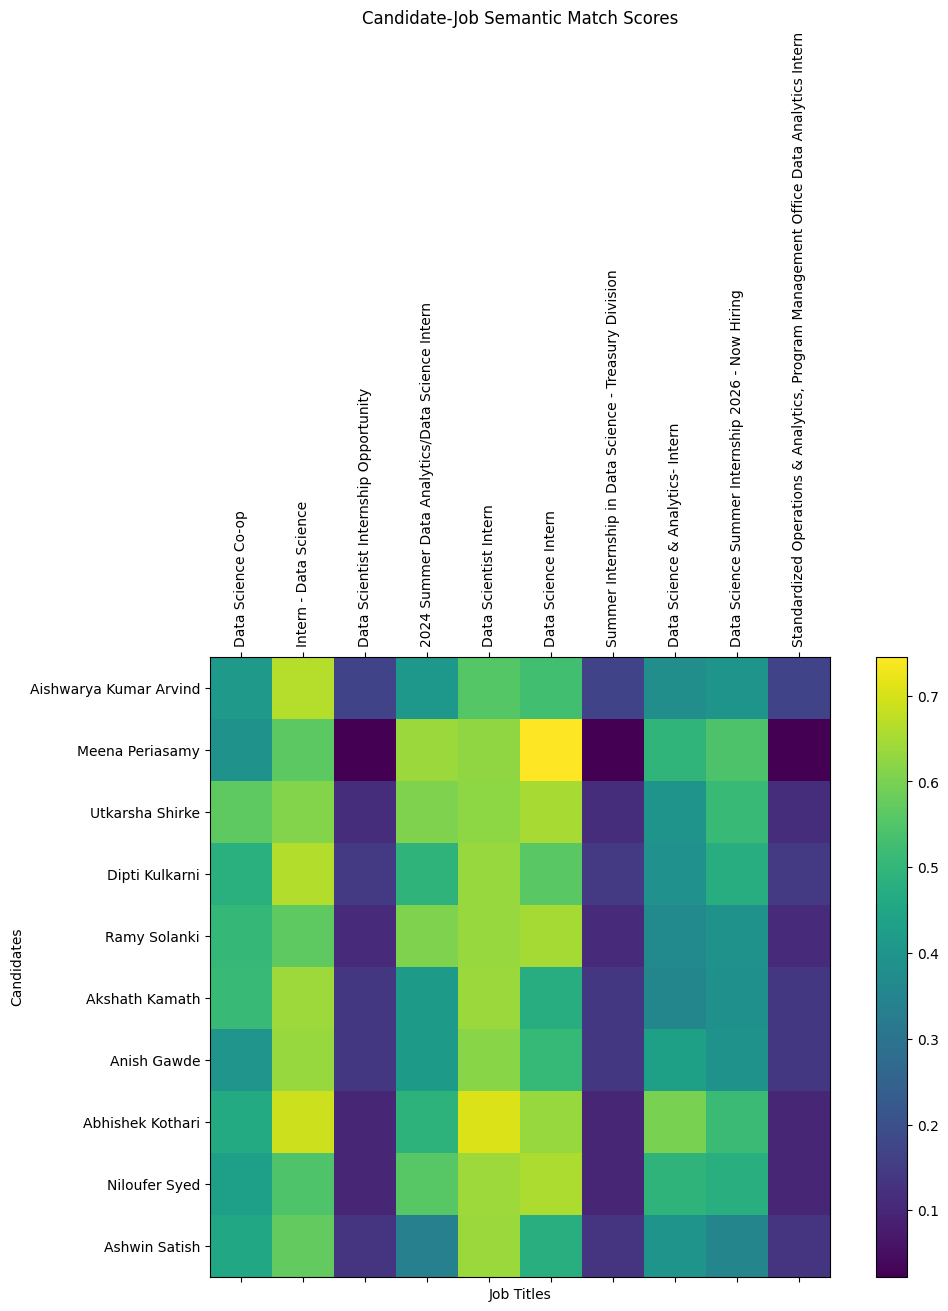

In [ ]:
# Skill Semantic Matching (Candidate vs Job) with clear explanations and matplotlib visuals
# Candidate-Job Skills Semantic Feature Score Matrix using BERT embeddings and Cosine Similarity

import pandas as pd
import re
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np

# Load candidates and jobs CSV files
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')

# Initialize the SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Extract skills for candidates
def extract_candidate_skills(skills_text):
    if isinstance(skills_text, str):
        return [skill.strip() for skill in re.split(r",|;", skills_text) if skill.strip()]
    return []

# Extract skills from job descriptions
def extract_job_skills(job_desc):
    match = re.search(r"SKILLS\s*:\s*(.*?)(?:\.|QUALIFICATIONS:|RESPONSIBILITIES:|LOCATION:|PAY:|APPLICATION DEADLINE:|JOB ID:|$)", 
                      job_desc, re.IGNORECASE | re.DOTALL)
    return [skill.strip() for skill in re.split(r",|;", match.group(1))] if match else []

# Generate embeddings
candidate_embeddings = {
    row['Name']: model.encode(", ".join(extract_candidate_skills(row['Skills'])))
    for _, row in candidates_df.iterrows()
}

job_embeddings = {
    row['Job_Title']: model.encode(", ".join(extract_job_skills(row['Job_Description'])))
    for _, row in jobs_df.iterrows()
}

# Create semantic feature score matrix
similarity_matrix = pd.DataFrame(index=candidate_embeddings.keys(), columns=job_embeddings.keys())

for candidate_name, candidate_emb in candidate_embeddings.items():
    for job_title, job_emb in job_embeddings.items():
        score = cosine_similarity([candidate_emb], [job_emb])[0][0]
        similarity_matrix.at[candidate_name, job_title] = round(score, 4)

# Save the matrix
#similarity_matrix.to_csv("/mnt/data/candidate_job_semantic_matrix.csv")

# Print detailed information for clarity
for job_title in jobs_df['Job_Title']:
    job_skills = extract_job_skills(jobs_df[jobs_df['Job_Title'] == job_title]['Job_Description'].values[0])
    print(f"\nJob Title: {job_title}\nSkills Required: {job_skills}\n")
    for candidate_name in candidates_df['Name']:
        candidate_skills = extract_candidate_skills(candidates_df[candidates_df['Name'] == candidate_name]['Skills'].values[0])
        matched_skills = set(candidate_skills).intersection(set(job_skills))
        score = similarity_matrix.at[candidate_name, job_title]
        print(f"Candidate: {candidate_name}")
        print(f"Candidate Skills: {candidate_skills}")
        print(f"Matched Skills: {matched_skills}")
        print(f"Semantic Match Score: {score}\n")
    print("-" * 80)

# Visualize the semantic feature matrix
plt.figure(figsize=(12, 8))
cax = plt.matshow(similarity_matrix.astype(float), cmap='viridis', fignum=1)
plt.colorbar(cax)
plt.xticks(range(len(similarity_matrix.columns)), similarity_matrix.columns, rotation=90)
plt.yticks(range(len(similarity_matrix.index)), similarity_matrix.index)
plt.xlabel('Job Titles')
plt.ylabel('Candidates')
plt.title('Candidate-Job Semantic Match Scores')
plt.show()


- Observation:

Job Title: Data Science Co-op
Skills Required: ['LLMs via APIs', 'Understanding of application of dense vector', 'text embedding models for finding semantic similarity', 'NoSQL', 'Vector Database', 'Graph construction', 'AWS', 'Azure', 'Python', 'Data visualization', 'matplotlib', 'plotly', 'Power BI', 'Infrastructure as code']

Candidate: Aishwarya Kumar Arvind
Candidate Skills: ['Android Development', 'Machine Learning', 'Full-Stack Development', 'Web Development', 'Artificial Intelligence AI', 'Algorithms', 'MongoDB', 'SQL', 'Node.js', 'React.js', 'Cascading Style Sheets CSS', 'C++', 'Unix', 'Microsoft Office', 'LabVIEW', 'Matlab', 'C', 'HTML', 'Java', 'JavaScript', 'Public Speaking', 'Team Leadership', 'Conflict Resolution', 'Palantir', 'Databases', 'Microsoft Excel', 'Python Programming Language']
Matched Skills: set()
Semantic Match Score: 0.41449999809265137

- Question:
why candidate job skills like Machine Learning, Artificial Intelligence AI are not considered against job skills like:. 'LLMs via APIs', 'Understanding of application of dense vector', 'text embedding models for finding semantic similarity'. why NoSQL', 'Vector Database' are not considered against candidate job skills like: Databases, MongoDB', 'SQL'. or job skills: 'LLMs via APIs' against candidature skills: 'Machine Learning', 'Full-Stack Development',?

- Reason:
When using the SentenceTransformer ('all-MiniLM-L6-v2'), embeddings are computed based on the semantic meaning of the exact phrases provided. However, when we input the entire skill set as a single string for each candidate and job (like "Machine Learning, Artificial Intelligence AI, MongoDB, SQL..."), the embedding is generated as a single averaged representation of all skills combined.

This can dilute or obscure semantic relationships:
Terms like "Machine Learning" or "Artificial Intelligence" are very general. They don't explicitly mean the same thing as "LLMs via APIs" or "text embedding models," even though LLMs and embeddings are subsets of Machine Learning and AI.
Similarly, "Databases, MongoDB, SQL" are very broad. While "NoSQL" or "Vector Database" is conceptually related, a simple average embedding of all these skills dilutes specific semantic matches.

- Solution:
Individual Skill Embedding Matching
Compute embeddings separately for each individual skill, then compute pairwise similarity.
Take maximum or average similarity as a candidate-job match score.


Candidate: Aishwarya Kumar Arvind
Candidate Skills: ['Android Development', 'Machine Learning', 'Full-Stack Development', 'Web Development', 'Artificial Intelligence AI', 'Algorithms', 'MongoDB', 'SQL', 'Node.js', 'React.js', 'Cascading Style Sheets CSS', 'C++', 'Unix', 'Microsoft Office', 'LabVIEW', 'Matlab', 'C', 'HTML', 'Java', 'JavaScript', 'Public Speaking', 'Team Leadership', 'Conflict Resolution', 'Palantir', 'Databases', 'Microsoft Excel', 'Python Programming Language']

Job: Data Science Co-op
Required Skills: ['LLMs via APIs', 'Understanding of application of dense vector', 'text embedding models for finding semantic similarity', 'NoSQL', 'Vector Database', 'Graph construction', 'AWS', 'Azure', 'Python', 'Data visualization', 'matplotlib', 'plotly', 'Power BI', 'Infrastructure as code']
Matched Skills and Scores:
  - MongoDB ↔ NoSQL (Score: 0.6212)
  - Matlab ↔ matplotlib (Score: 0.5146)
  - Databases ↔ NoSQL (Score: 0.5539)
  - Databases ↔ Vector Database (Score: 0.5718)
  

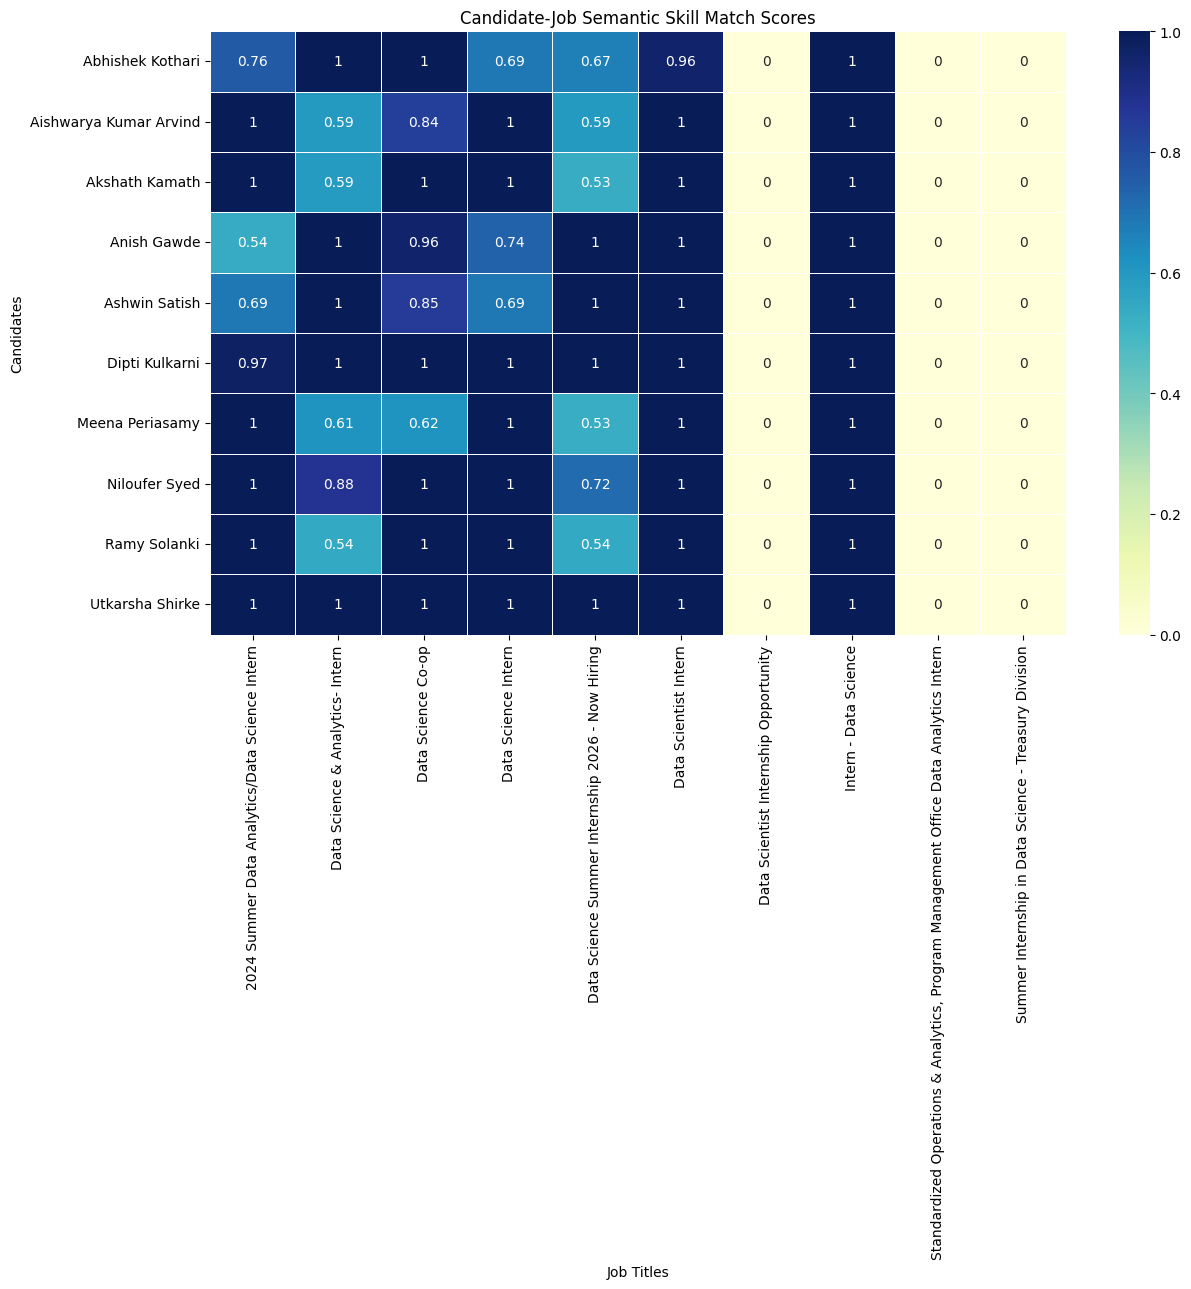

In [29]:
#Updated Python Code (Skill-wise Semantic Matching)

import pandas as pd
import re
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')

# Initialize Model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Skill extraction functions
def extract_candidate_skills(skills_text):
    if pd.isna(skills_text):
        return []
    return [skill.strip() for skill in re.split(r",|;", skills_text) if skill.strip()]

def extract_job_skills(job_desc):
    match = re.search(r"SKILLS\s*:\s*(.*?)(?:\.|QUALIFICATIONS:|RESPONSIBILITIES:|LOCATION:|PAY:|APPLICATION DEADLINE:|JOB ID:|$)", 
                      job_desc, re.IGNORECASE | re.DOTALL)
    return [skill.strip() for skill in re.split(r",|;", match.group(1))] if match else []

# Embeddings for job skills
job_embeddings = {}
for _, row in jobs_df.iterrows():
    job_id = row['Job_ID']
    skills = extract_job_skills(row['Job_Description'])
    job_embeddings[job_id] = model.encode(", ".join(skills))

# Skill-wise matching and semantic scoring
final_results = []

for idx, candidate_row in candidates_df.iterrows():
    candidate_name = candidate_row['Name']
    candidate_skills = extract_candidate_skills(candidate_row['Skills'])
    candidate_skill_embs = model.encode(candidate_skills)

    print(f"\nCandidate: {candidate_name}")
    print(f"Candidate Skills: {candidate_skills}")

    for job_title, job_skills in job_skills_dict.items():
        job_skill_embs = job_skill_embeddings[job_title]

        # Compute skill-wise similarity matrix
        similarity_matrix = cosine_similarity(candidate_skill_embs, job_skill_embs)

        # Find matched skill pairs above threshold (e.g., 0.5)
        threshold = 0.5
        matched_pairs = []
        for i, c_skill in enumerate(candidate_skills):
            for j, j_skill in enumerate(job_skills):
                sim_score = similarity_matrix[i, j]
                if sim_score >= threshold:
                    matched_pairs.append((c_skill, j_skill, sim_score))

        # Compute an overall average or max similarity
        overall_similarity = similarity_matrix.max() if matched_pairs else 0

        # Append to results
        final_results.append({
            "Candidate": candidate_name,
            "Job": job_title,
            "Matched_Skills": matched_pairs,
            "Overall_Score": round(overall_similarity, 4)
        })

        # Print job-wise details
        print(f"\nJob: {job_title}")
        print(f"Required Skills: {job_skills}")
        print(f"Matched Skills and Scores:")
        if matched_pairs:
            for c_skill, j_skill, sim in matched_pairs:
                print(f"  - {c_skill} ↔ {j_skill} (Score: {sim:.4f})")
        else:
            print("  - No strong matches found.")

# Create DataFrame of results
results_df = pd.DataFrame(final_results)

# Pivot results for matrix visualization
matrix_df = results_df.pivot(index="Candidate", columns="Job", values="Overall_Score").fillna(0)

# Save to CSV
#matrix_df.to_csv("candidate_job_skillwise_semantic_matrix.csv")

# Plot Heatmap for Visual Understanding
plt.figure(figsize=(13, 13))
sns.heatmap(matrix_df, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Candidate-Job Semantic Skill Match Scores")
plt.xlabel("Job Titles")
plt.ylabel("Candidates")
plt.tight_layout()
plt.show()


Saved: semantic_feature_dataset_final.csv


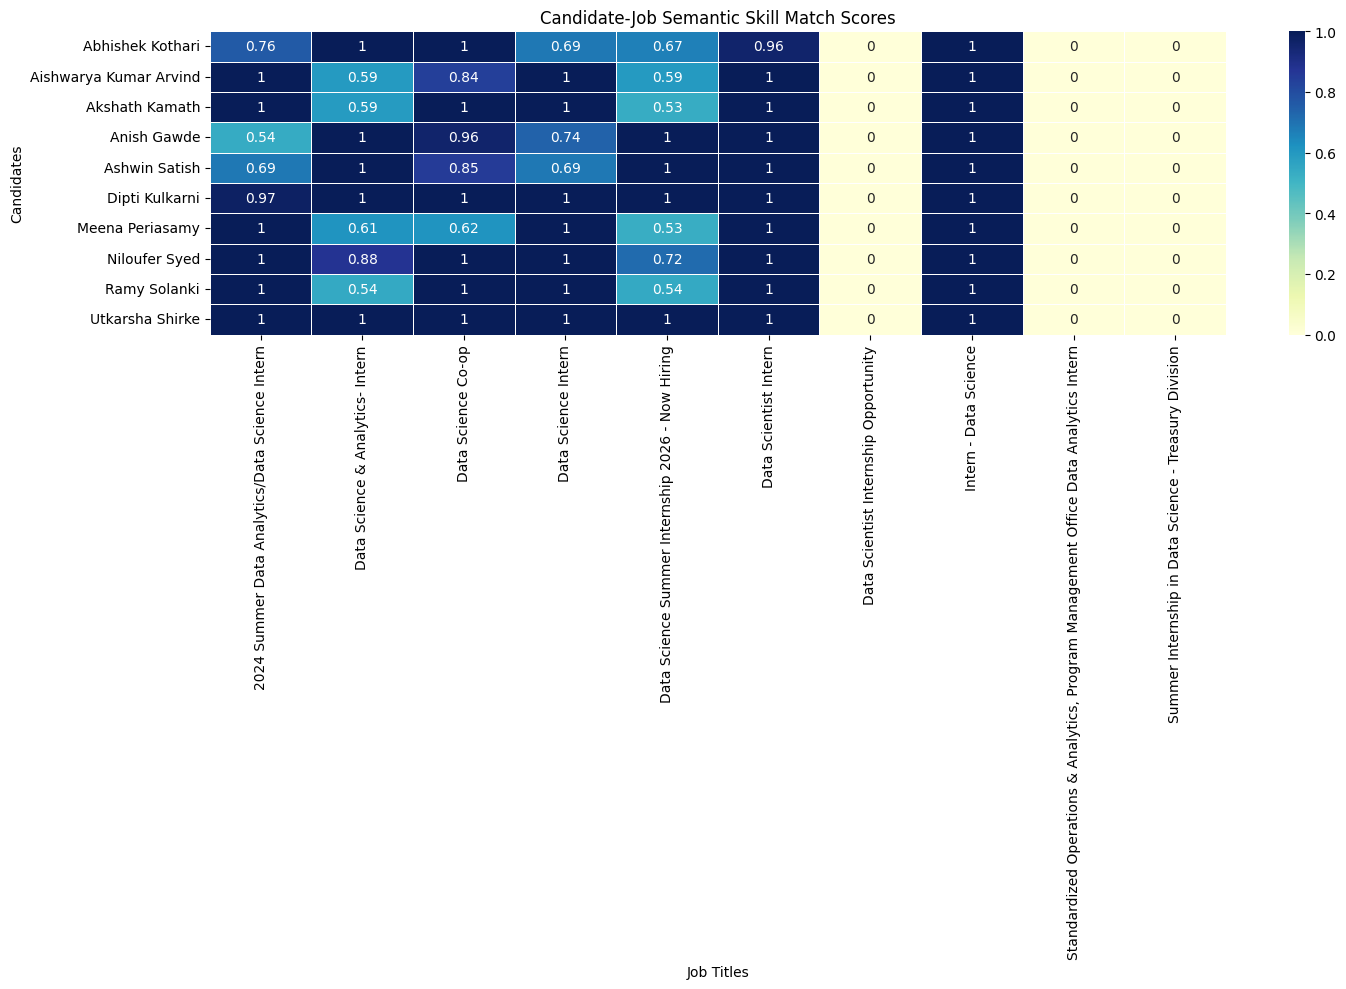

In [36]:
# Enhanced Semantic Matching with Skill-wise Scoring (Code 2 updated with Code 1 logic)

import pandas as pd
import re
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')

# Initialize Model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Extract candidate skills
def extract_candidate_skills(skills_text):
    if pd.isna(skills_text):
        return []
    return [skill.strip() for skill in re.split(r",|;", skills_text) if skill.strip()]

# Extract job skills from job description
def extract_job_skills(job_desc):
    match = re.search(r"SKILLS\s*:\s*(.*?)(?:\.|QUALIFICATIONS:|RESPONSIBILITIES:|LOCATION:|PAY:|APPLICATION DEADLINE:|JOB ID:|$)", 
                      job_desc, re.IGNORECASE | re.DOTALL)
    return [skill.strip() for skill in re.split(r",|;", match.group(1)) if skill.strip()] if match else []

# Precompute embeddings for all job skills
job_skill_embeddings = {}
job_skill_lists = {}

for _, job in jobs_df.iterrows():
    job_id = job['Job_ID']
    job_skills = extract_job_skills(job['Job_Description'])
    job_skill_lists[job_id] = job_skills
    job_skill_embeddings[job_id] = model.encode(job_skills) if job_skills else []

# Compute pairwise skill similarity
results = []

for _, c_row in candidates_df.iterrows():
    candidate_id = c_row['Candidate_ID']
    candidate_name = c_row['Name']
    candidate_skills = extract_candidate_skills(c_row['Skills'])
    candidate_embeddings = model.encode(candidate_skills) if candidate_skills else []

    for _, j_row in jobs_df.iterrows():
        job_id = j_row['Job_ID']
        job_title = j_row['Job_Title']
        company = j_row['Company']
        job_skills = job_skill_lists[job_id]
        job_embeddings = job_skill_embeddings[job_id]

        if len(candidate_embeddings) > 0 and len(job_embeddings) > 0:
            sim_matrix = cosine_similarity(candidate_embeddings, job_embeddings)
            matched_pairs = []
            threshold = 0.5
            for i, c_skill in enumerate(candidate_skills):
                for j, j_skill in enumerate(job_skills):
                    sim = sim_matrix[i][j]
                    if sim >= threshold:
                        matched_pairs.append((c_skill, j_skill, sim))
            overall_score = sim_matrix.max() if matched_pairs else 0.0
        else:
            matched_pairs = []
            overall_score = 0.0

        results.append({
            "Candidate_ID": candidate_id,
            "Candidate_Name": candidate_name,
            "Job_ID": job_id,
            "Job_Title": job_title,
            "Company": company,
            "skills_semantic_score": round(overall_score, 4),
            "experience_semantic_score": "NONE",
            "project_semantic_score": "NONE",
            "education_semantic_score": "NONE",
            "overall_semantic_match_score": "NONE",
            "Label (Ranking)": "NONE"
        })

# Convert to DataFrame and save
results_df = pd.DataFrame(results)
results_df.to_csv("semantic_feature_dataset_final.csv", index=False)
print("Saved: semantic_feature_dataset_final.csv")

# Visualize: Heatmap
matrix_df = results_df.pivot(index="Candidate_Name", columns="Job_Title", values="skills_semantic_score").astype(float)
plt.figure(figsize=(15, 10))
sns.heatmap(matrix_df, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Candidate-Job Semantic Skill Match Scores")
plt.xlabel("Job Titles")
plt.ylabel("Candidates")
plt.tight_layout()
plt.show()


In [ ]:
# Experience Semantic Matching (Candidate vs Job) with clear explanations and matplotlib visuals
# Candidate-Job Experience Semantic Feature Score Matrix using BERT embeddings and Cosine Similarity

In [45]:
import pandas as pd
import re
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime

# Load Data
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')
model = SentenceTransformer('all-MiniLM-L6-v2')

# Helper to clean and split candidate experience blocks
def parse_experience_blocks(experience_text):
    return [block.strip() for block in experience_text.split("|") if "Experience_ID" in block]

# Extract fields from one experience block
def extract_fields(block):
    fields = {}
    for pair in re.findall(r"(\w+):\s*([^;|]+)", block):
        key, val = pair
        fields[key.strip()] = val.strip()
    return fields

# Compute duration score
def duration_score(start_year, end_year):
    try:
        end_year = int(end_year) if end_year != "None" else datetime.now().year
        start_year = int(start_year)
        years = end_year - start_year
        return min(1.0, years / 5.0)  # max at 5 years
    except:
        return 0.0

# Start matching
for _, job in jobs_df.iterrows():
    job_id, job_title, company, desc = job['Job_ID'], job['Job_Title'], job['Company'], job['Job_Description']
    
    # Extract job responsibilities
    match = re.search(r"RESPONSIBILITIES:(.*?)(?:QUALIFICATIONS:|SKILLS:|$)", desc, re.IGNORECASE | re.DOTALL)
    responsibilities = match.group(1).strip() if match else job_title
    
    print(f"\n🔹 Job: {job_title} | Company: {company}")
    print("Required Role/Responsibilities Summary:", responsibilities[:120] + "...")

    for _, cand in candidates_df.iterrows():
        name = cand['Name']
        experiences = parse_experience_blocks(str(cand['Experience']))

        print(f"\n  👤 Candidate: {name}")
        for exp_text in experiences:
            fields = extract_fields(exp_text)
            exp_title = fields.get("Employment_Title", "")
            exp_desc = fields.get("Employment_Description", "")
            exp_org = fields.get("Employment_Organisation", "")
            exp_skills = fields.get("Employment_Skills", "")
            exp_start = fields.get("Employment_Start_Year", "")
            exp_end = fields.get("Employment_End_Year", "")

            # Semantic Components
            role_score = cosine_similarity([model.encode(exp_title)], [model.encode(job_title)])[0][0]
            desc_score = cosine_similarity([model.encode(exp_desc + " " + exp_skills)], [model.encode(responsibilities)])[0][0]
            org_score = cosine_similarity([model.encode(exp_org)], [model.encode(company)])[0][0]
            dur_score = duration_score(exp_start, exp_end)

            # Weighted score
            weighted_score = 0.25*role_score + 0.35*desc_score + 0.15*org_score + 0.25*dur_score

            # Report
            print(f"    ✅ Title: {exp_title} | Org: {exp_org}")
            print(f"      - 🧠 Role Match: {role_score:.2f}")
            print(f"      - 📋 Desc/Skills Match: {desc_score:.2f}")
            print(f"      - 🏢 Org Match: {org_score:.2f}")
            print(f"      - ⏳ Duration Score: {dur_score:.2f}")
            print(f"      👉 Final Experience Score: {weighted_score:.4f}")



🔹 Job: Data Science Co-op | Company: Honeywell
Required Role/Responsibilities Summary: Collaborate with cross-functional teams to identify business challenges and opportunities where data science can provide...

  👤 Candidate: Aishwarya Kumar Arvind
    ✅ Title: Research Assistant | Org: Healthcare Systems Engineering Institute of Northeastern University HSyE
      - 🧠 Role Match: 0.29
      - 📋 Desc/Skills Match: 0.08
      - 🏢 Org Match: 0.39
      - ⏳ Duration Score: 0.40
      👉 Final Experience Score: 0.2582
    ✅ Title: Data Science Intern | Org: Palladium - Make it Possible
      - 🧠 Role Match: 0.64
      - 📋 Desc/Skills Match: 0.16
      - 🏢 Org Match: 0.04
      - ⏳ Duration Score: 0.00
      👉 Final Experience Score: 0.2223
    ✅ Title: Instructional Assistant | Org: Northeastern University Information Technology Services
      - 🧠 Role Match: 0.20
      - 📋 Desc/Skills Match: -0.02
      - 🏢 Org Match: 0.18
      - ⏳ Duration Score: 0.20
      👉 Final Experience Score: 0.1

In [46]:
import pandas as pd
import re
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load data
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')

# Load the deeper model
model = SentenceTransformer('all-mpnet-base-v2')

# Extract job responsibilities and role
def extract_job_roles_and_responsibilities(desc):
    match = re.search(r"(?:RESPONSIBILITIES|ROLE)\s*:\s*(.*?)(?:QUALIFICATIONS:|SKILLS:|LOCATION:|PAY:|APPLICATION DEADLINE:|JOB ID:|$)",
                      desc, re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else ""

# Process each candidate
for _, cand in candidates_df.iterrows():
    print(f"\n🧑 Candidate: {cand['Name']}")
    experience_entries = str(cand['Experience']).split("|")
    
    for _, job in jobs_df.iterrows():
        job_id = job["Job_ID"]
        job_title = job["Job_Title"]
        job_company = job["Company"]
        job_responsibility_text = extract_job_roles_and_responsibilities(job["Job_Description"])
        
        print(f"\n💼 Matching for Job: {job_title} at {job_company}")
        print(f"📋 Job Responsibilities: {job_responsibility_text}\n")

        if not job_responsibility_text.strip():
            print("⚠️ No responsibilities found in job description.")
            continue

        job_emb = model.encode(job_responsibility_text)

        for exp in experience_entries:
            exp = exp.strip()
            if not exp:
                continue

            exp_parts = re.split(r";\s*", exp)
            exp_text = " | ".join(exp_parts)
            exp_emb = model.encode(exp_text)
            sim_score = cosine_similarity([exp_emb], [job_emb])[0][0]

            print(f"🗂️ Experience: {exp_text}")
            print(f"🔍 Similarity with Job Role: {sim_score:.4f}")

            if sim_score > 0.55:
                print(f"✅ Relevant experience found! Score: {sim_score:.2f}")
            else:
                print(f"❌ Not a strong match. Score: {sim_score:.2f}")
            print("-" * 100)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Kartik\.cache\huggingface\hub\models--sentence-transformers--all-mpnet-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


🧑 Candidate: Aishwarya Kumar Arvind

💼 Matching for Job: Data Science Co-op at Honeywell
📋 Job Responsibilities: Data Science Co-op.Work alongside experienced data scientists,contribute to projects that drive data-driven decision-making and provide valuable insights to support business growth and operational excellence.RESPONSIBILITIES:Collaborate with cross-functional teams to identify business challenges and opportunities where data science can provide valuable insights,Assist in developing and implementing advanced analytical models and methodologies to analyze complex data sets Support data visualization efforts to effectively communicate insights to stakeholders,Conduct data analysis and provide actionable recommendations based on data-driven insights,Stay updated with the latest trends and advancements in data science and identify opportunities to leverage new tools and technologies.

🗂️ Experience: Experience_ID: 1.0 | Candidate_ID: 1.0 | Employment_Title: Research Assistant | 

In [47]:
import pandas as pd
import re
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from dateutil import parser
import numpy as np

# Load data
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')

# Load high-performance model for deeper understanding
model = SentenceTransformer('all-mpnet-base-v2')

# Function to extract job role and responsibilities
def extract_job_roles_and_responsibilities(desc):
    match = re.search(r"(?:RESPONSIBILITIES|ROLE)\s*:\s*(.*?)(?:QUALIFICATIONS:|SKILLS:|LOCATION:|PAY:|APPLICATION DEADLINE:|JOB ID:|$)",
                      desc, re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else ""

# Estimate experience duration in months (basic logic)
def estimate_duration(start_yr, start_mo, end_yr, end_mo):
    try:
        if pd.isna(end_yr) or end_yr in ["None", ""]:
            return 0
        start_date = parser.parse(f"{start_mo or 'January'} {start_yr}")
        end_date = parser.parse(f"{end_mo or 'January'} {end_yr}")
        delta = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
        return max(delta, 0)
    except:
        return 0

# Start matching process
for _, cand in candidates_df.iterrows():
    print(f"\n🧑 Candidate: {cand['Name']}")
    experience_entries = str(cand['Experience']).split("|")

    for _, job in jobs_df.iterrows():
        job_title = job["Job_Title"]
        company = job["Company"]
        job_responsibility_text = extract_job_roles_and_responsibilities(job["Job_Description"])

        if not job_responsibility_text.strip():
            continue

        job_emb = model.encode(job_responsibility_text)

        print(f"\n💼 Matching with Job: {job_title} @ {company}")
        print(f"📋 Job Role & Responsibilities:\n{job_responsibility_text}\n")

        for exp in experience_entries:
            fields = {kv.split(":")[0].strip(): kv.split(":")[1].strip() if ":" in kv else "" for kv in exp.split(";")}

            title = fields.get("Employment_Title", "")
            skills = fields.get("Employment_Skills", "")
            desc = fields.get("Employment_Description", "")
            start_yr = fields.get("Employment_Start_Year", "")
            start_mo = fields.get("Employment_Start_Month", "")
            end_yr = fields.get("Employment_End_Year", "")
            end_mo = fields.get("Employment_End_Month", "")
            duration_months = estimate_duration(start_yr, start_mo, end_yr, end_mo)

            # Encode fields
            title_emb = model.encode(title)
            skills_emb = model.encode(skills) if skills.lower() != "none" else np.zeros((768,))
            desc_emb = model.encode(desc) if desc.lower() != "none" else np.zeros((768,))

            # Score each part
            title_score = cosine_similarity([title_emb], [job_emb])[0][0]
            skills_score = cosine_similarity([skills_emb], [job_emb])[0][0] if skills else 0
            desc_score = cosine_similarity([desc_emb], [job_emb])[0][0] if desc else 0

            # Blend scores: you can change weights
            final_score = (title_score * 0.4 + skills_score * 0.3 + desc_score * 0.3)
            weighted_score = final_score * min(duration_months / 36, 1)  # Weight based on duration (up to 3 years)

            print(f"🗂️ Experience: {title}")
            print(f"  - Duration: {duration_months} months")
            print(f"  - Skills: {skills}")
            print(f"  - Description: {desc}")
            print(f"🔍 Scores:")
            print(f"    - Title match:        {title_score:.4f}")
            print(f"    - Skill match:        {skills_score:.4f}")
            print(f"    - Description match:  {desc_score:.4f}")
            print(f"    - Combined Score:     {final_score:.4f}")
            print(f"    - Duration Weighted:  {weighted_score:.4f}")
            print("-" * 100)



🧑 Candidate: Aishwarya Kumar Arvind

💼 Matching with Job: Data Science Co-op @ Honeywell
📋 Job Role & Responsibilities:
Data Science Co-op.Work alongside experienced data scientists,contribute to projects that drive data-driven decision-making and provide valuable insights to support business growth and operational excellence.RESPONSIBILITIES:Collaborate with cross-functional teams to identify business challenges and opportunities where data science can provide valuable insights,Assist in developing and implementing advanced analytical models and methodologies to analyze complex data sets Support data visualization efforts to effectively communicate insights to stakeholders,Conduct data analysis and provide actionable recommendations based on data-driven insights,Stay updated with the latest trends and advancements in data science and identify opportunities to leverage new tools and technologies.

🗂️ Experience: Research Assistant
  - Duration: 0 months
  - Skills: Python Programming 

In [53]:
import pandas as pd
import re
from sentence_transformers import SentenceTransformer, util
from datetime import datetime

# Load data
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')

# Initialize context-aware model
model = SentenceTransformer("all-mpnet-base-v2")

# Function to extract responsibilities or job role
def extract_job_role(text):
    match = re.search(r"(?:RESPONSIBILITIES|ROLE):\s*(.*?)(?:QUALIFICATIONS:|SKILLS:|$)", text, re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else text.strip()

# Function to split experience string into individual experiences
def split_experiences(experience_blob):
    return [e.strip() for e in experience_blob.split('|') if e.strip()]

# Parse individual experience into components
def parse_experience_text(exp_text):
    parts = dict(re.findall(r"(\w+): ([^;|]+)", exp_text))
    title = parts.get("Employment_Title", "")
    desc = parts.get("Employment_Description", "")
    skills = parts.get("Employment_Skills", "")
    start_year = parts.get("Employment_Start_Year", "0").strip()
    end_year = parts.get("Employment_End_Year", str(datetime.now().year)).strip()

    # Handle "None" values
    try:
        start_year = int(start_year) if start_year.lower() != "none" else 0
    except:
        start_year = 0
    try:
        end_year = int(end_year) if end_year.lower() != "none" else datetime.now().year
    except:
        end_year = datetime.now().year

    duration = max(end_year - start_year, 0)

    return {
        "title": title.strip(),
        "description": desc.strip(),
        "skills": skills.strip(),
        "duration": duration
    }

# Process each candidate against each job
for _, job_row in jobs_df.iterrows():
    job_id = job_row["Job_ID"]
    job_title = job_row["Job_Title"]
    company = job_row["Company"]
    job_desc = str(job_row["Job_Description"])
    job_role_text = extract_job_role(job_desc)
    job_emb = model.encode(job_role_text, convert_to_tensor=True)

    print(f"\n==============================")
    print(f"📌 Job: {job_title} at {company}")
    print(f"🧠 Role/Responsibilities:\n{job_role_text}\n")

    for _, cand_row in candidates_df.iterrows():
        cand_id = cand_row["Candidate_ID"]
        cand_name = cand_row["Name"]
        experience_blob = str(cand_row["Experience"])
        experiences = split_experiences(experience_blob)

        matched_logs = []
        similarities = []

        for exp in experiences:
            parsed = parse_experience_text(exp)
            components = " ".join([
                parsed["title"],
                parsed["description"],
                parsed["skills"]
            ])
            if components.strip():
                exp_emb = model.encode(components, convert_to_tensor=True)
                sim = util.cos_sim(exp_emb, job_emb).item()
                similarities.append(sim)
                if sim >= 0.3:
                    matched_logs.append({
                        "Title": parsed["title"],
                        "Skills": parsed["skills"] or "N/A",
                        "Desc": parsed["description"] or "N/A",
                        "Years": parsed["duration"],
                        "Score": round(sim, 4)
                    })

        # Compute top-k similarity average (more stable than max)
        if similarities:
            top_k = sorted(similarities, reverse=True)[:]
            avg_score = round(sum(top_k) / len(top_k), 4)
        else:
            avg_score = 0.0

        # Output
        print(f"\n👤 Candidate: {cand_name}")
        print(f"🧮 Experience Semantic Score: {avg_score}")
        if matched_logs:
            print("✅ Matched Experiences:")
            for m in matched_logs:
                print(f"  • Title: {m['Title']} | Score: {m['Score']}")
                print(f"    Skills: {m['Skills']}")
                print(f"    Description: {m['Desc']}")
                print(f"    Duration: {m['Years']} years\n")
        else:
            print("❌ No matching experience found.")



📌 Job: Data Science Co-op at Honeywell
🧠 Role/Responsibilities:
Data Science Co-op.Work alongside experienced data scientists,contribute to projects that drive data-driven decision-making and provide valuable insights to support business growth and operational excellence.RESPONSIBILITIES:Collaborate with cross-functional teams to identify business challenges and opportunities where data science can provide valuable insights,Assist in developing and implementing advanced analytical models and methodologies to analyze complex data sets Support data visualization efforts to effectively communicate insights to stakeholders,Conduct data analysis and provide actionable recommendations based on data-driven insights,Stay updated with the latest trends and advancements in data science and identify opportunities to leverage new tools and technologies.


👤 Candidate: Aishwarya Kumar Arvind
🧮 Experience Semantic Score: 0.319
✅ Matched Experiences:
  • Title: Research Assistant | Score: 0.3225
   

In [ ]:
import pandas as pd
import re
from sentence_transformers import SentenceTransformer, util
from datetime import datetime

# Load files
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')
semantic_df = pd.read_csv("semantic_feature_dataset_final.csv")

# Load SentenceTransformer model
model = SentenceTransformer("all-mpnet-base-v2")

# Function to extract job role or responsibility
def extract_job_role(text):
    match = re.search(r"(?:RESPONSIBILITIES|ROLE):\s*(.*?)(?:QUALIFICATIONS:|SKILLS:|$)", str(text), re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else str(text).strip()

# Function to split multiple experiences
def split_experiences(experience_blob):
    return [e.strip() for e in str(experience_blob).split('|') if e.strip()]

# Parse experience dictionary
def parse_experience_text(exp_text):
    parts = dict(re.findall(r"(\w+): ([^;|]+)", exp_text))
    title = parts.get("Employment_Title", "")
    desc = parts.get("Employment_Description", "")
    skills = parts.get("Employment_Skills", "")
    start_year = parts.get("Employment_Start_Year", "0").strip()
    end_year = parts.get("Employment_End_Year", str(datetime.now().year)).strip()

    try:
        start_year = int(start_year) if start_year.lower() != "none" else 0
    except:
        start_year = 0
    try:
        end_year = int(end_year) if end_year.lower() != "none" else datetime.now().year
    except:
        end_year = datetime.now().year

    duration = max(end_year - start_year, 0)
    return {
        "title": title.strip(),
        "description": desc.strip(),
        "skills": skills.strip(),
        "duration": duration
    }

# Iterate through each candidate-job pair
updated_scores = []

for _, row in semantic_df.iterrows():
    job_id = row["Job_ID"]
    cand_id = row["Candidate_ID"]

    job_row = jobs_df[jobs_df["Job_ID"] == job_id].iloc[0]
    cand_row = candidates_df[candidates_df["Candidate_ID"] == cand_id].iloc[0]

    job_role_text = extract_job_role(job_row["Job_Description"])
    job_emb = model.encode(job_role_text, convert_to_tensor=True)

    experience_blob = str(cand_row["Experience"])
    experiences = split_experiences(experience_blob)

    similarities = []

    for exp in experiences:
        parsed = parse_experience_text(exp)
        components = " ".join([
            parsed["title"],
            parsed["description"],
            parsed["skills"]
        ])
        if components.strip():
            exp_emb = model.encode(components, convert_to_tensor=True)
            sim = util.cos_sim(exp_emb, job_emb).item()
            similarities.append(sim)

    if similarities:
        top_k = sorted(similarities, reverse=True)[:5]  # TOP 5
        avg_score = round(sum(top_k) / len(top_k), 4)   # Rounded to 4 decimal places
    else:
        avg_score = 0.0

    updated_scores.append(avg_score)

# Add column to CSV
semantic_df["experience_semantic_score"] = updated_scores

# Save final file
semantic_df.to_csv("semantic_feature_dataset_updated_with_experience.csv", index=False)
print("✅ experience_semantic_score column added and file saved as 'semantic_feature_dataset_updated_with_experience.csv'")


    Candidate_ID          Candidate_Name  Job_ID  \
0              1  Aishwarya Kumar Arvind       1   
1              1  Aishwarya Kumar Arvind       2   
2              1  Aishwarya Kumar Arvind       3   
3              1  Aishwarya Kumar Arvind       4   
4              1  Aishwarya Kumar Arvind       5   
..           ...                     ...     ...   
95            10           Ashwin Satish       6   
96            10           Ashwin Satish       7   
97            10           Ashwin Satish       8   
98            10           Ashwin Satish       9   
99            10           Ashwin Satish      10   

                                            Job_Title  \
0                                  Data Science Co-op   
1                               Intern - Data Science   
2               Data Scientist Internship Opportunity   
3      2024 Summer Data Analytics/Data Science Intern   
4                               Data Scientist Intern   
..                               

In [58]:
import pandas as pd
import re
from sentence_transformers import SentenceTransformer, util
from datetime import datetime

# Load files
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')

# Load model
model = SentenceTransformer("all-mpnet-base-v2")

# Extract job role/responsibilities
def extract_job_role(text):
    match = re.search(r"(?:RESPONSIBILITIES|ROLE):\s*(.*?)(?:QUALIFICATIONS:|SKILLS:|$)", str(text), re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else str(text).strip()

# Split candidate experience
def split_experiences(experience_blob):
    return [e.strip() for e in str(experience_blob).split('|') if e.strip()]

# Parse fields from each experience string
def parse_experience_text(exp_text):
    parts = dict(re.findall(r"(\w+): ([^;|]+)", exp_text))
    title = parts.get("Employment_Title", "")
    desc = parts.get("Employment_Description", "")
    skills = parts.get("Employment_Skills", "")
    start_year = parts.get("Employment_Start_Year", "0").strip()
    end_year = parts.get("Employment_End_Year", str(datetime.now().year)).strip()
    try:
        start_year = int(start_year) if start_year.lower() != "none" else 0
    except:
        start_year = 0
    try:
        end_year = int(end_year) if end_year.lower() != "none" else datetime.now().year
    except:
        end_year = datetime.now().year
    duration = max(end_year - start_year, 0)
    return {
        "title": title.strip(),
        "description": desc.strip(),
        "skills": skills.strip(),
        "duration": duration
    }

# Process and print results
for _, job_row in jobs_df.iterrows():
    job_title = job_row["Job_Title"]
    company = job_row["Company"]
    job_desc = str(job_row["Job_Description"])
    job_role_text = extract_job_role(job_desc)
    job_emb = model.encode(job_role_text, convert_to_tensor=True)

    print(f"\n\n==============================")
    print(f"📌 Job Title: {job_title} at {company}")
    print(f"🧠 Job Role Summary:\n{job_role_text}\n")

    for _, cand_row in candidates_df.iterrows():
        cand_name = cand_row["Name"]
        experience_blob = str(cand_row["Experience"])
        experiences = split_experiences(experience_blob)

        match_count = 0
        print(f"\n👤 Candidate: {cand_name}")
        for exp in experiences:
            parsed = parse_experience_text(exp)
            components = " ".join([
                parsed["title"],
                parsed["description"],
                parsed["skills"]
            ])
            if components.strip():
                exp_emb = model.encode(components, convert_to_tensor=True)
                sim = util.cos_sim(exp_emb, job_emb).item()
                #if sim >= 0.5:
                    #match_count += 1
                print(f"\n")#  ✅ Experience Match #{match_count}")
                print(f"  • Title: {parsed['title']}")
                print(f"  • Skills: {parsed['skills']}")
                print(f"  • Description: {parsed['description'] or 'N/A'}")
                print(f"  • Duration: {parsed['duration']} years")
                print(f"  • Semantic Match Score: {round(sim, 4)}")
        '''if match_count == 0:
            print("  ❌ No matching experience found.")'''




📌 Job Title: Data Science Co-op at Honeywell
🧠 Job Role Summary:
Data Science Co-op.Work alongside experienced data scientists,contribute to projects that drive data-driven decision-making and provide valuable insights to support business growth and operational excellence.RESPONSIBILITIES:Collaborate with cross-functional teams to identify business challenges and opportunities where data science can provide valuable insights,Assist in developing and implementing advanced analytical models and methodologies to analyze complex data sets Support data visualization efforts to effectively communicate insights to stakeholders,Conduct data analysis and provide actionable recommendations based on data-driven insights,Stay updated with the latest trends and advancements in data science and identify opportunities to leverage new tools and technologies.


👤 Candidate: Aishwarya Kumar Arvind


  • Title: Research Assistant
  • Skills: Python Programming Language,Full Stack Development
  • Descri

Deep Text understanding model: ("all-mpnet-base-v2")

In [ ]:
import pandas as pd
import re
from sentence_transformers import SentenceTransformer, util
from datetime import datetime

# Load existing semantic feature dataset
feature_df = pd.read_csv("semantic_feature_dataset_final.csv")
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')

# Load BERT model
model = SentenceTransformer("all-mpnet-base-v2")

# Extract job responsibilities
def extract_job_role(text):
    match = re.search(r"(?:RESPONSIBILITIES|ROLE):\s*(.*?)(?:QUALIFICATIONS:|SKILLS:|$)", str(text), re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else str(text).strip()

# Split experiences from blob
def split_experiences(blob):
    return [e.strip() for e in str(blob).split('|') if e.strip()]

# Parse experience string into components
def parse_experience_text(exp_text):
    parts = dict(re.findall(r"(\w+): ([^;|]+)", exp_text))
    title = parts.get("Employment_Title", "")
    desc = parts.get("Employment_Description", "")
    skills = parts.get("Employment_Skills", "")
    start_year = parts.get("Employment_Start_Year", "0").strip()
    end_year = parts.get("Employment_End_Year", str(datetime.now().year)).strip()
    try:
        start_year = int(start_year) if start_year.lower() != "none" else 0
    except:
        start_year = 0
    try:
        end_year = int(end_year) if end_year.lower() != "none" else datetime.now().year
    except:
        end_year = datetime.now().year
    duration = max(end_year - start_year, 0)
    return {
        "title": title.strip(),
        "description": desc.strip(),
        "skills": skills.strip(),
        "duration": duration
    }

# Build experience semantic scores for every candidate-job pair
exp_scores = []

for _, job_row in jobs_df.iterrows():
    job_id = job_row["Job_ID"]
    job_desc = job_row["Job_Description"]
    job_role_text = extract_job_role(job_desc)
    job_emb = model.encode(job_role_text, convert_to_tensor=True)

    for _, cand_row in candidates_df.iterrows():
        cand_id = cand_row["Candidate_ID"]
        experience_blob = cand_row["Experience"]
        experiences = split_experiences(experience_blob)
        
        similarities = []

        for exp in experiences:
            parsed = parse_experience_text(exp)
            combined_text = " ".join([
                parsed["title"],
                parsed["description"],
                parsed["skills"]
            ])
            if combined_text.strip():
                exp_emb = model.encode(combined_text, convert_to_tensor=True)
                sim = util.cos_sim(exp_emb, job_emb).item()
                similarities.append(sim)

        if similarities:
            top_k = sorted(similarities, reverse=True)[:3]  # top 3
            avg_score = round(sum(top_k) / len(top_k), 4)
        else:
            avg_score = 0.0

        exp_scores.append({
            "Candidate_ID": cand_id,
            "Job_ID": job_id,
            "experience_semantic_score": avg_score
        })

# Create DataFrame with scores
exp_df = pd.DataFrame(exp_scores)

# Merge into original feature file
merged_df = pd.merge(feature_df, exp_df, on=["Candidate_ID", "Job_ID"], how="left", suffixes=("", "_new"))
merged_df["experience_semantic_score"] = merged_df["experience_semantic_score_new"].fillna(0.0)
merged_df.drop(columns=["experience_semantic_score_new"], inplace=True)

# Save final CSV
merged_df.to_csv("semantic_feature_dataset_final.csv", index=False)
print("Updated: 'experience_semantic_score' column added to semantic_feature_dataset_final.csv")


✅ Updated: 'experience_semantic_score' column added to semantic_feature_dataset_final.csv


C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1614816656.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=job_df, palette="Blues_d")


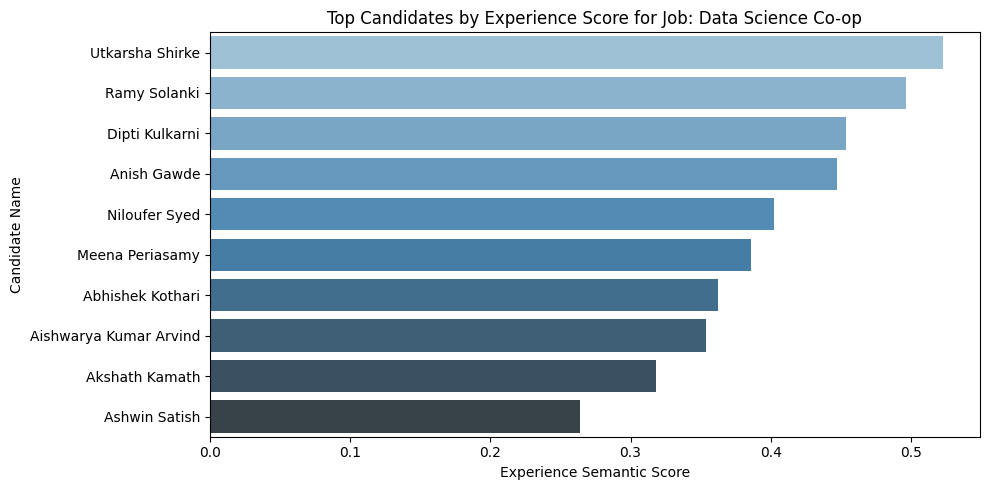

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1614816656.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=job_df, palette="Blues_d")


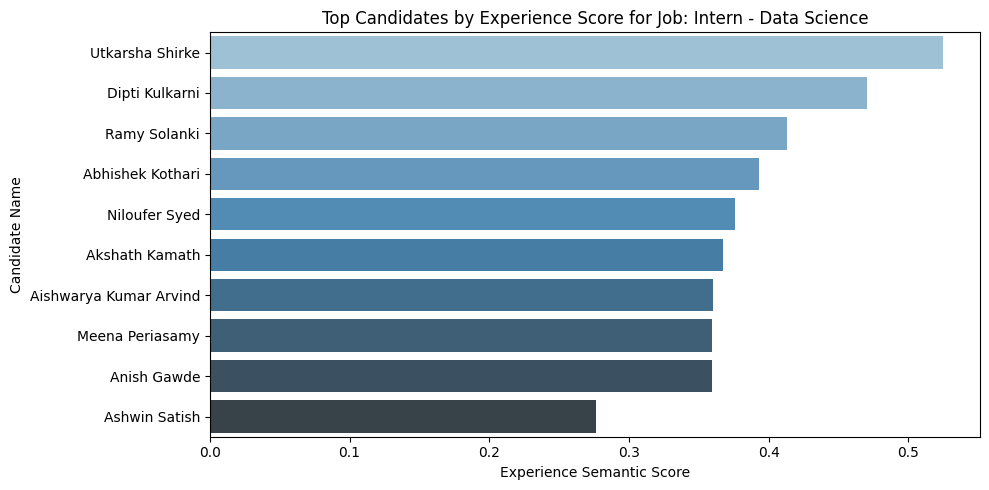

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1614816656.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=job_df, palette="Blues_d")


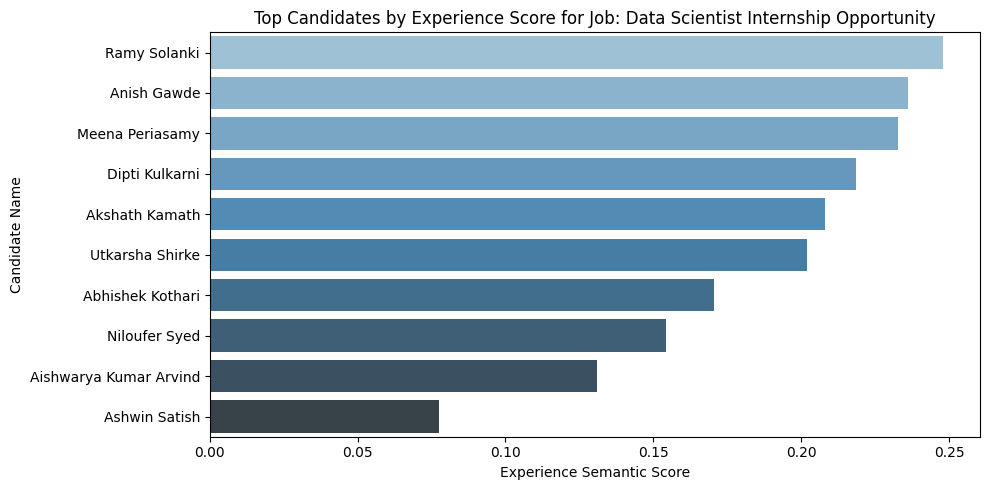

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1614816656.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=job_df, palette="Blues_d")


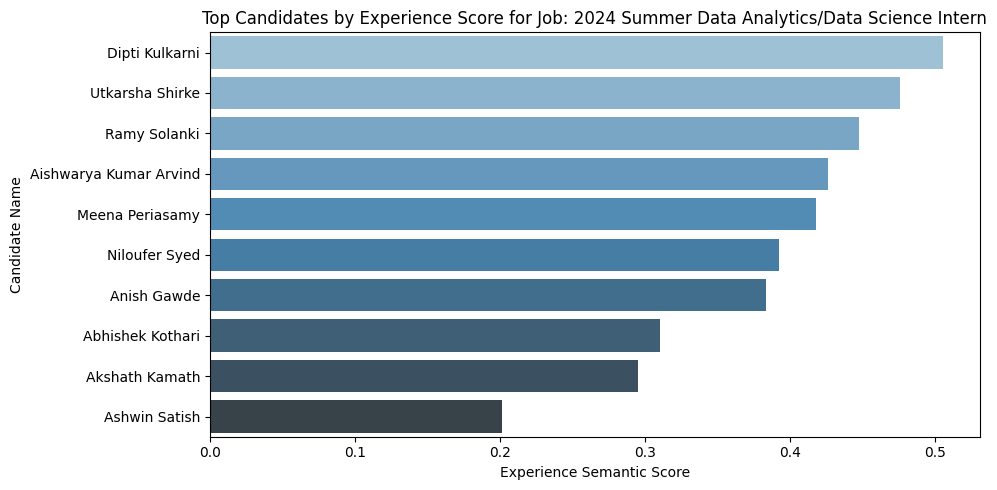

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1614816656.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=job_df, palette="Blues_d")


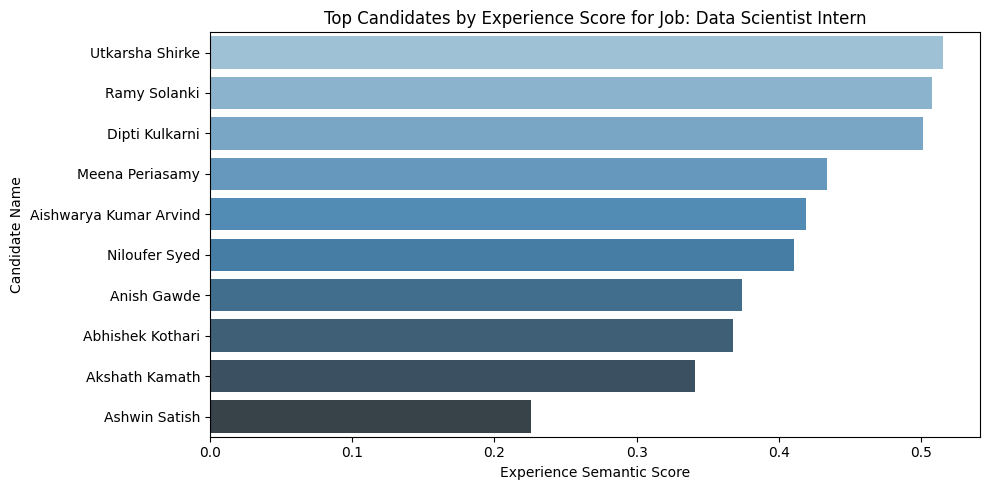

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1614816656.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=job_df, palette="Blues_d")


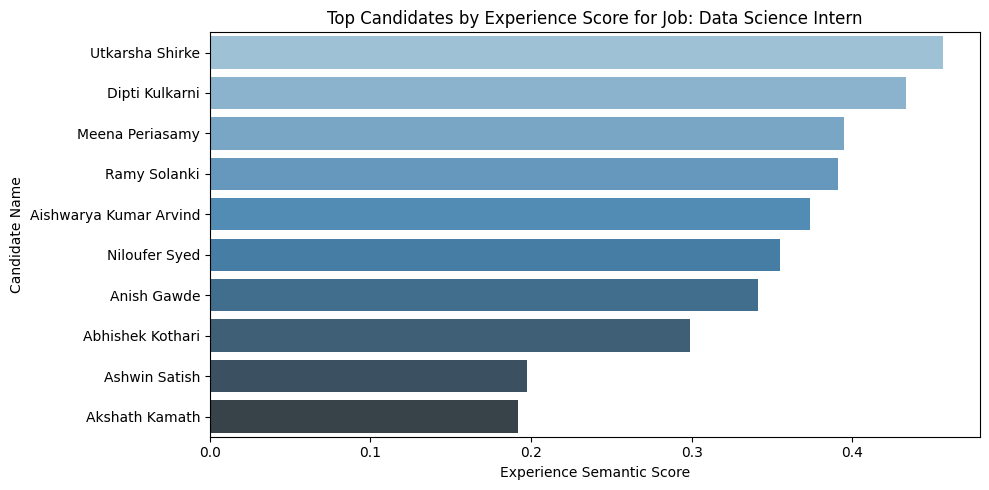

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1614816656.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=job_df, palette="Blues_d")


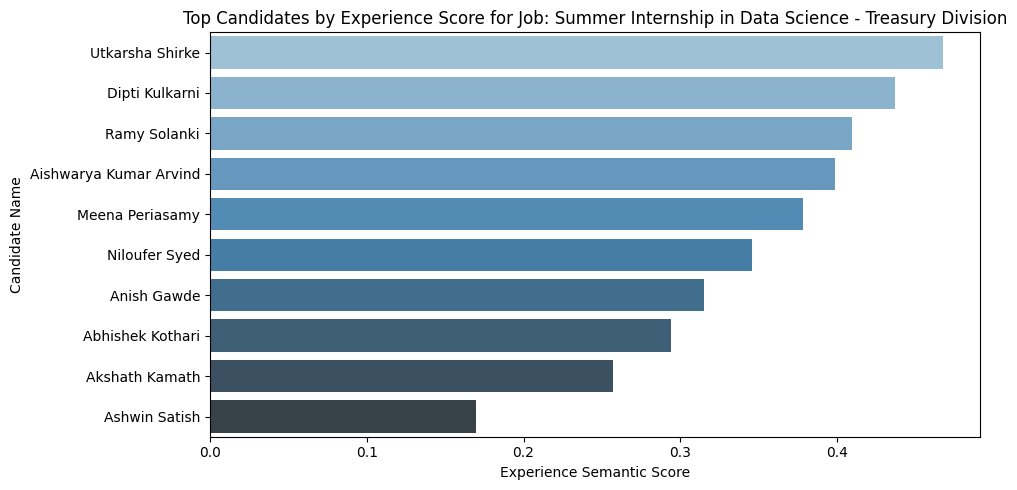

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1614816656.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=job_df, palette="Blues_d")


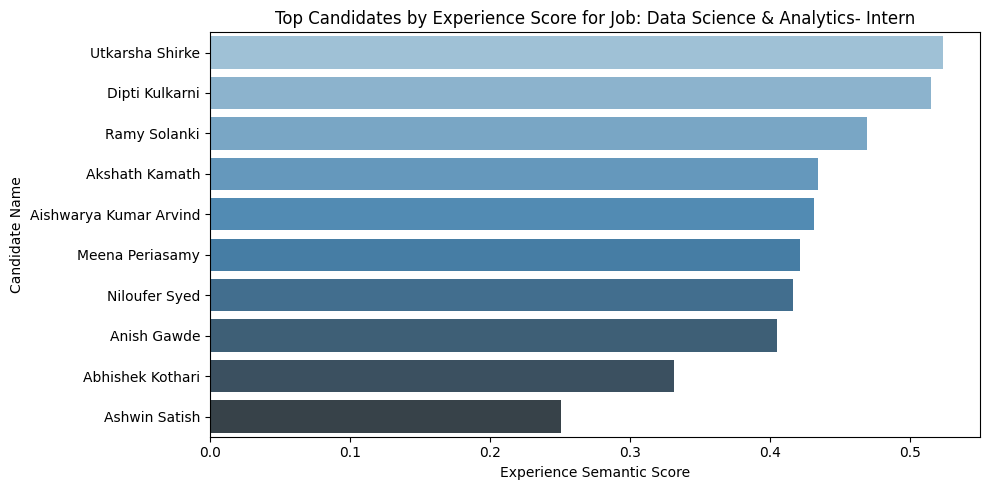

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1614816656.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=job_df, palette="Blues_d")


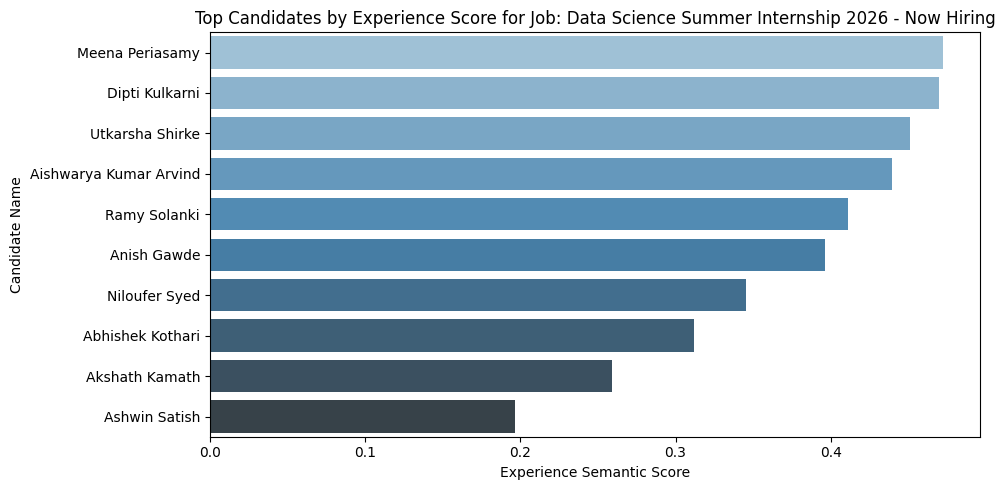

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1614816656.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=job_df, palette="Blues_d")


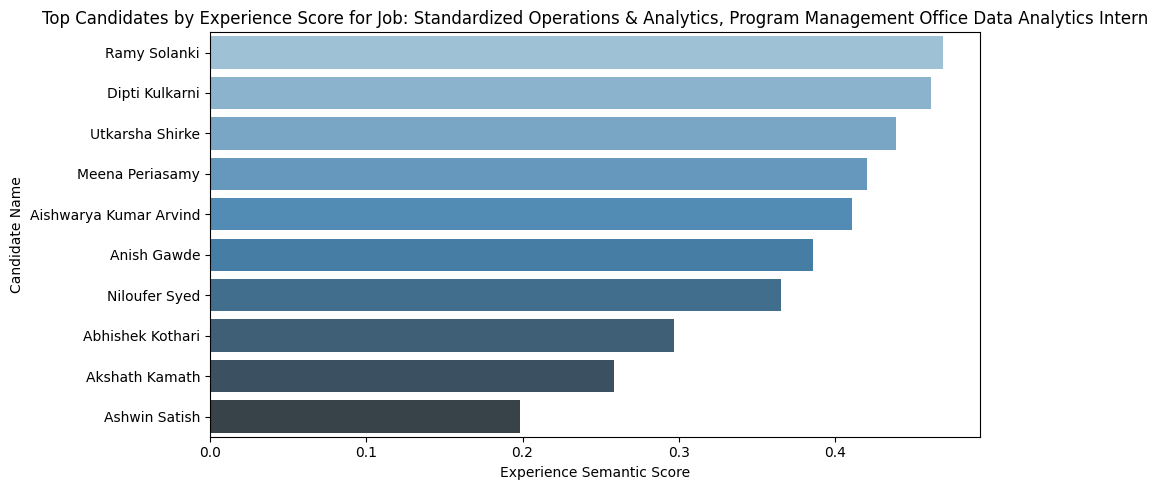

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the semantic feature dataset
df = pd.read_csv("semantic_feature_dataset_final.csv")

# Convert experience score to numeric (handle missing or malformed entries)
df["experience_semantic_score"] = pd.to_numeric(df["experience_semantic_score"], errors="coerce").fillna(0.0)

# Get list of unique jobs
unique_jobs = df["Job_Title"].unique()

# Plot top candidates per job based on experience score
for job in unique_jobs:
    job_df = df[df["Job_Title"] == job].sort_values(by="experience_semantic_score", ascending=False)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=job_df, palette="Blues_d")
    plt.title(f"Top Candidates by Experience Score for Job: {job}")
    plt.xlabel("Experience Semantic Score")
    plt.ylabel("Candidate Name")
    plt.tight_layout()
    plt.show()


In [99]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, util
from datetime import datetime

# Load Data
feature_df = pd.read_csv("semantic_feature_dataset_final_updated.csv")
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')

# Load Ensemble Models
models = {
    "mpnet": SentenceTransformer("all-mpnet-base-v2"),
    "e5": SentenceTransformer("intfloat/e5-base"),
    "bge": SentenceTransformer("BAAI/bge-base-en-v1.5")
}

# Extract job responsibilities and skills
def extract_job_details(text):
    resp_match = re.search(r"(?:RESPONSIBILITIES|ROLE):\s*(.*?)(?:QUALIFICATIONS:|SKILLS:|$)", str(text), re.IGNORECASE | re.DOTALL)
    skills_match = re.search(r"SKILLS:\s*(.*?)(?:RESPONSIBILITIES:|QUALIFICATIONS:|$)", str(text), re.IGNORECASE | re.DOTALL)
    resp = resp_match.group(1).strip() if resp_match else ""
    skills = skills_match.group(1).strip() if skills_match else ""
    return resp, skills

# Split and parse employment records
def split_experiences(blob):
    return [e.strip() for e in str(blob).split('|') if e.strip()]

def parse_experience(exp_text):
    parts = dict(re.findall(r"(\w+): ([^;|]+)", exp_text))
    return {
        "description": parts.get("Employment_Description", "").strip(),
        "skills": [s.strip() for s in parts.get("Employment_Skills", "").split(',') if s.strip()]
    }

# Sentence/Skill-level scoring using ensemble
def get_ensemble_score(text1, text2):
    scores = []
    for model in models.values():
        emb1 = model.encode(text1, convert_to_tensor=True)
        emb2 = model.encode(text2, convert_to_tensor=True)
        sim = util.cos_sim(emb1, emb2).item()
        scores.append(sim)
    return max(scores)

# Store scores
exp_score_logs = []

for _, job_row in jobs_df.iterrows():
    job_id = job_row["Job_ID"]
    job_title = job_row["Job_Title"]
    company = job_row["Company"]
    job_resp, job_skills = extract_job_details(job_row["Job_Description"])
    job_resp_sents = [s.strip() for s in re.split(r'[.\n]', job_resp) if s.strip()]
    job_skill_parts = [s.strip() for s in job_skills.split(',') if s.strip()]
    job_contexts = job_resp_sents + job_skill_parts

    for _, cand_row in candidates_df.iterrows():
        cand_id = cand_row["Candidate_ID"]
        cand_name = cand_row["Name"]
        experiences = split_experiences(cand_row["Experience"])

        scores = []
        detailed_logs = []

        for exp in experiences:
            parsed = parse_experience(exp)
            desc_scores = []
            skill_scores = []

            # Description sentence-level semantic matching
            for sent in re.split(r'[.\n]', parsed["description"]):
                sent = sent.strip()
                if sent:
                    sent_scores = [get_ensemble_score(sent, ctx) for ctx in job_contexts]
                    desc_scores.append(max(sent_scores))

            # Skills-level semantic matching
            for skill in parsed["skills"]:
                skill_scores += [get_ensemble_score(skill, ctx) for ctx in job_contexts]

            desc_avg = sum(desc_scores)/len(desc_scores) if desc_scores else 0.0
            skill_avg = sum(skill_scores)/len(skill_scores) if skill_scores else 0.0

            final_score = (desc_avg + skill_avg) / 2  # equal weight

            if final_score > 0:
                scores.append(final_score)
                detailed_logs.append((parsed["description"][:60] + "...", round(desc_avg, 4), round(skill_avg, 4), round(final_score, 4)))

        top_k = sorted(scores, reverse=True)[:3]
        avg_score = round(sum(top_k) / len(top_k), 4) if top_k else 0.0

        print(f"\n📌 Candidate: {cand_name} → Job: {job_title}")
        for log in detailed_logs:
            print(f"  ✨ Desc: {log[0]}\n     → Desc Score: {log[1]} | Skill Score: {log[2]} | Final: {log[3]}")

        exp_score_logs.append({
            "Candidate_ID": cand_id,
            "Candidate_Name": cand_name,
            "Job_ID": job_id,
            "Job_Title": job_title,
            "Company": company,
            "experience_semantic_score": avg_score,
            "Match (%)": f"{round(avg_score * 100)}%"
        })

# Convert to DataFrame
exp_df = pd.DataFrame(exp_score_logs)

# === Visualization per job ===
for job in exp_df["Job_Title"].unique():
    subset = exp_df[exp_df["Job_Title"] == job].sort_values(by="experience_semantic_score", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=subset, palette="crest")
    plt.title(f"💼 Experience Semantic Match – {job}", fontsize=14)
    plt.xlabel("Experience Semantic Score")
    plt.ylabel("Candidate")
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# === Save to CSV (optional - uncomment to activate) ===
# merged_df = pd.merge(feature_df, exp_df[["Candidate_ID", "Job_ID", "experience_semantic_score"]],
#                      on=["Candidate_ID", "Job_ID"], how="left", suffixes=("", "_new"))
# merged_df["experience_semantic_score"] = merged_df["experience_semantic_score_new"].fillna(0.0)
# merged_df.drop(columns=["experience_semantic_score_new"], inplace=True)
# merged_df.to_csv("semantic_feature_dataset_final_updated.csv", index=False)
# print("✅ Updated CSV with 'experience_semantic_score' saved.")



📌 Candidate: Aishwarya Kumar Arvind → Job: Data Science Co-op
  ✨ Desc: None...
     → Desc Score: 0.7406 | Skill Score: 0.7357 | Final: 0.7382
  ✨ Desc: None...
     → Desc Score: 0.7406 | Skill Score: 0.7753 | Final: 0.758
  ✨ Desc: None...
     → Desc Score: 0.7406 | Skill Score: 0.683 | Final: 0.7118
  ✨ Desc: None...
     → Desc Score: 0.7406 | Skill Score: 0.683 | Final: 0.7118
  ✨ Desc: None...
     → Desc Score: 0.7406 | Skill Score: 0.683 | Final: 0.7118
  ✨ Desc: None...
     → Desc Score: 0.7406 | Skill Score: 0.683 | Final: 0.7118

📌 Candidate: Meena Periasamy → Job: Data Science Co-op
  ✨ Desc: collected, cleaned, and analyzed data using Python and key l...
     → Desc Score: 0.8245 | Skill Score: 0.7581 | Final: 0.7913
  ✨ Desc: Utilized Cisco Packet Tracer for designing and simulating co...
     → Desc Score: 0.7861 | Skill Score: 0.683 | Final: 0.7346
  ✨ Desc: IEEE Student Branch: Designed and developed the Society's we...
     → Desc Score: 0.78 | Skill Score: 0.7324

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, util
from datetime import datetime

# Load Data
feature_df = pd.read_csv("semantic_feature_dataset_final_updated.csv")
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')

# Load Ensemble Models
models = {
    "mpnet": SentenceTransformer("all-mpnet-base-v2"),
    "e5": SentenceTransformer("intfloat/e5-base"),
    "bge": SentenceTransformer("BAAI/bge-base-en-v1.5")
}

# Extract job responsibilities and skills
def extract_job_details(text):
    resp_match = re.search(r"(?:RESPONSIBILITIES|ROLE):\s*(.*?)(?:QUALIFICATIONS:|SKILLS:|$)", str(text), re.IGNORECASE | re.DOTALL)
    skills_match = re.search(r"SKILLS:\s*(.*?)(?:RESPONSIBILITIES:|QUALIFICATIONS:|$)", str(text), re.IGNORECASE | re.DOTALL)
    resp = resp_match.group(1).strip() if resp_match else ""
    skills = skills_match.group(1).strip() if skills_match else ""
    return resp, skills

# Split and parse employment records
def split_experiences(blob):
    return [e.strip() for e in str(blob).split('|') if e.strip()]

def parse_experience(exp_text):
    parts = dict(re.findall(r"(\w+): ([^;|]+)", exp_text))
    return {
        "description": parts.get("Employment_Description", "").strip(),
        "skills": [s.strip() for s in parts.get("Employment_Skills", "").split(',') if s.strip()]
    }

# Sentence/Skill-level scoring using ensemble
def get_ensemble_score(text1, text2):
    scores = []
    for model in models.values():
        emb1 = model.encode(text1, convert_to_tensor=True)
        emb2 = model.encode(text2, convert_to_tensor=True)
        sim = util.cos_sim(emb1, emb2).item()
        scores.append(sim)
    return max(scores)

# Store scores
exp_score_logs = []

for _, job_row in jobs_df.iterrows():
    job_id = job_row["Job_ID"]
    job_title = job_row["Job_Title"]
    company = job_row["Company"]
    job_resp, job_skills = extract_job_details(job_row["Job_Description"])
    job_resp_sents = [s.strip() for s in re.split(r'[.\n]', job_resp) if s.strip()]
    job_skill_parts = [s.strip() for s in job_skills.split(',') if s.strip()]
    job_contexts = job_resp_sents + job_skill_parts

    for _, cand_row in candidates_df.iterrows():
        cand_id = cand_row["Candidate_ID"]
        cand_name = cand_row["Name"]
        experiences = split_experiences(cand_row["Experience"])

        scores = []
        detailed_logs = []

        for exp in experiences:
            parsed = parse_experience(exp)
            desc_scores = []
            skill_scores = []

            # Description sentence-level semantic matching
            for sent in re.split(r'[.\n]', parsed["description"]):
                sent = sent.strip()
                if sent:
                    sent_scores = [get_ensemble_score(sent, ctx) for ctx in job_contexts]
                    desc_scores.append(max(sent_scores))

            # Skills-level semantic matching
            for skill in parsed["skills"]:
                skill_scores += [get_ensemble_score(skill, ctx) for ctx in job_contexts]

            desc_avg = sum(desc_scores)/len(desc_scores) if desc_scores else 0.0
            skill_avg = sum(skill_scores)/len(skill_scores) if skill_scores else 0.0

            final_score = (desc_avg + skill_avg) / 2  # equal weight

            if final_score > 0:
                scores.append(final_score)
                #detailed_logs.append((parsed["description"][:60] + "...", round(desc_avg, 4), round(skill_avg, 4), round(final_score, 4)))

        top_k = sorted(scores, reverse=True)[:3]
        avg_score = round(sum(top_k) / len(top_k), 4) if top_k else 0.0

        '''print(f"\n Candidate: {cand_name} → Job: {job_title}")
        for log in detailed_logs:
            print(f"Desc: {log[0]}\n     → Desc Score: {log[1]} | Skill Score: {log[2]} | Final: {log[3]}")'''

        exp_score_logs.append({
            "Candidate_ID": cand_id,
            "Candidate_Name": cand_name,
            "Job_ID": job_id,
            "Job_Title": job_title,
            "Company": company,
            "experience_semantic_score": avg_score,
            "Match (%)": f"{round(avg_score * 100)}%"
        })

# Convert to DataFrame
exp_df = pd.DataFrame(exp_score_logs)
# Save to CSV
merged_df = pd.merge(feature_df, exp_df[["Candidate_ID", "Job_ID", "experience_semantic_score"]],
                      on=["Candidate_ID", "Job_ID"], how="left", suffixes=("", "_new"))
merged_df["experience_semantic_score"] = merged_df["experience_semantic_score_new"].fillna(0.0)
merged_df.drop(columns=["experience_semantic_score_new"], inplace=True)
merged_df.to_csv("semantic_feature_dataset_final_updated.csv", index=False)
print(" Updated CSV with 'experience_semantic_score' saved.")

# === Visualization per job ===
'''for job in exp_df["Job_Title"].unique():
    subset = exp_df[exp_df["Job_Title"] == job].sort_values(by="experience_semantic_score", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x="experience_semantic_score", y="Candidate_Name", data=subset, palette="crest")
    plt.title(f"Experience Semantic Match – {job}", fontsize=14)
    plt.xlabel("Experience Semantic Score")
    plt.ylabel("Candidate")
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()'''

# Project Semantic Matching (Candidate vs Job) with clear explanations and matplotlib visuals
# Candidate-Job Project Semantic Feature Score Matrix using BERT embeddings and Cosine Similarity

📊 Generating project match score visualizations...


C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="viridis")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:90: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


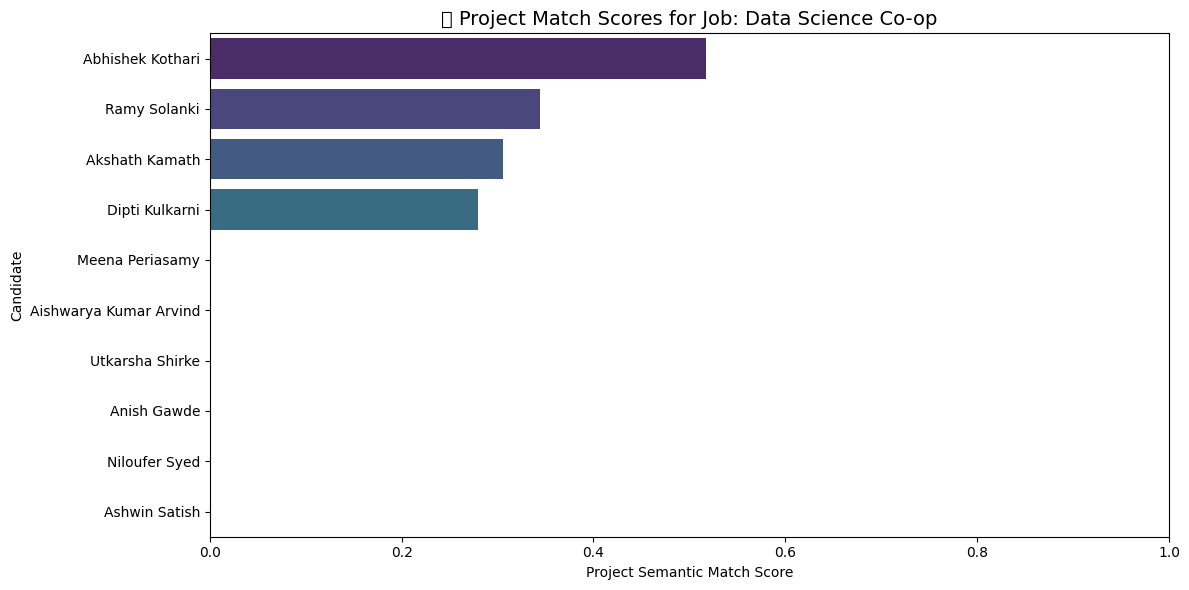

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="viridis")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:90: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


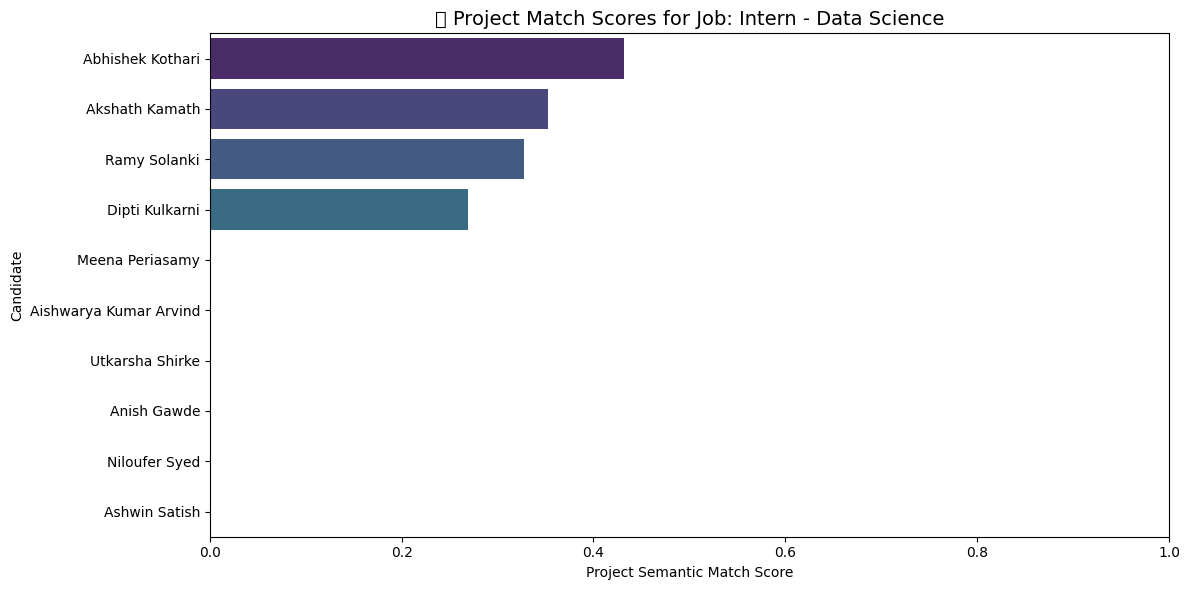

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="viridis")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:90: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


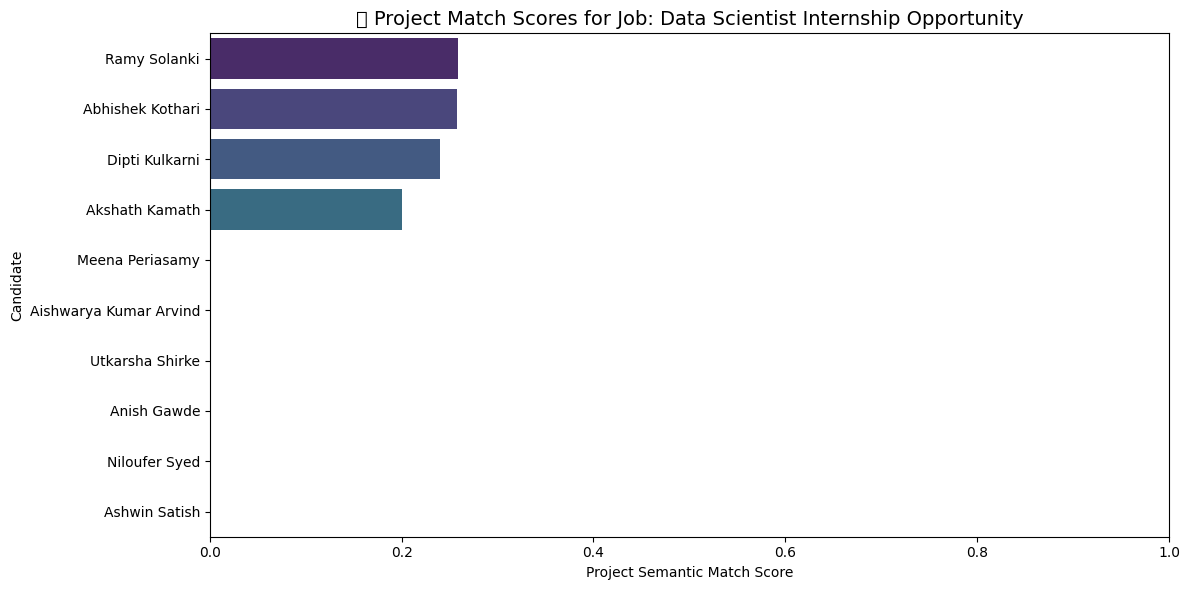

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="viridis")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:90: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


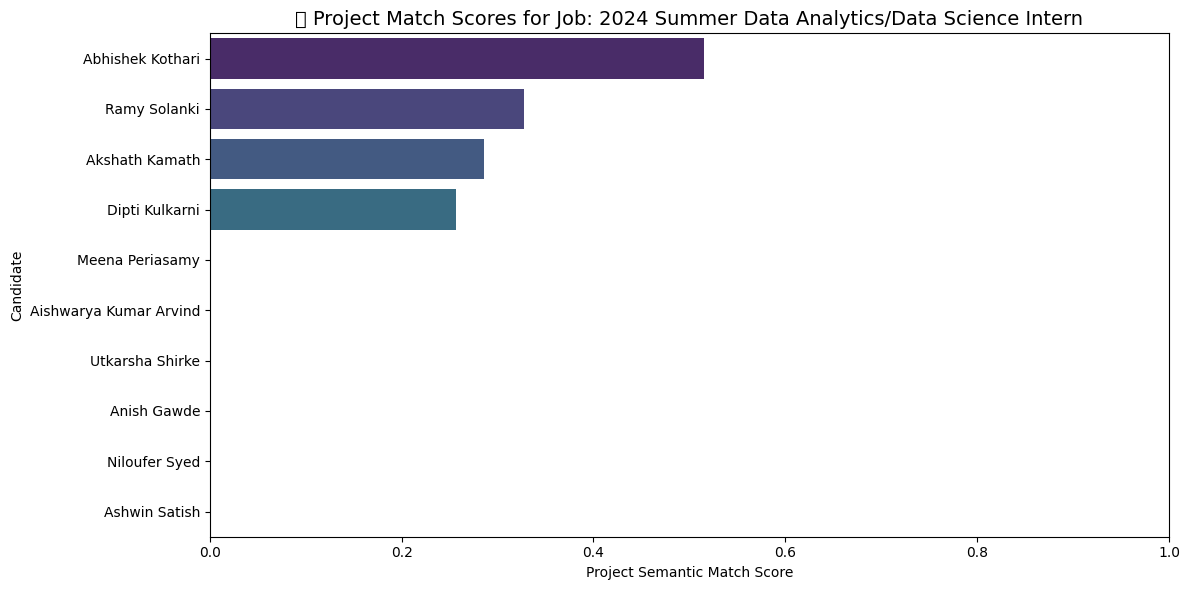

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="viridis")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:90: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


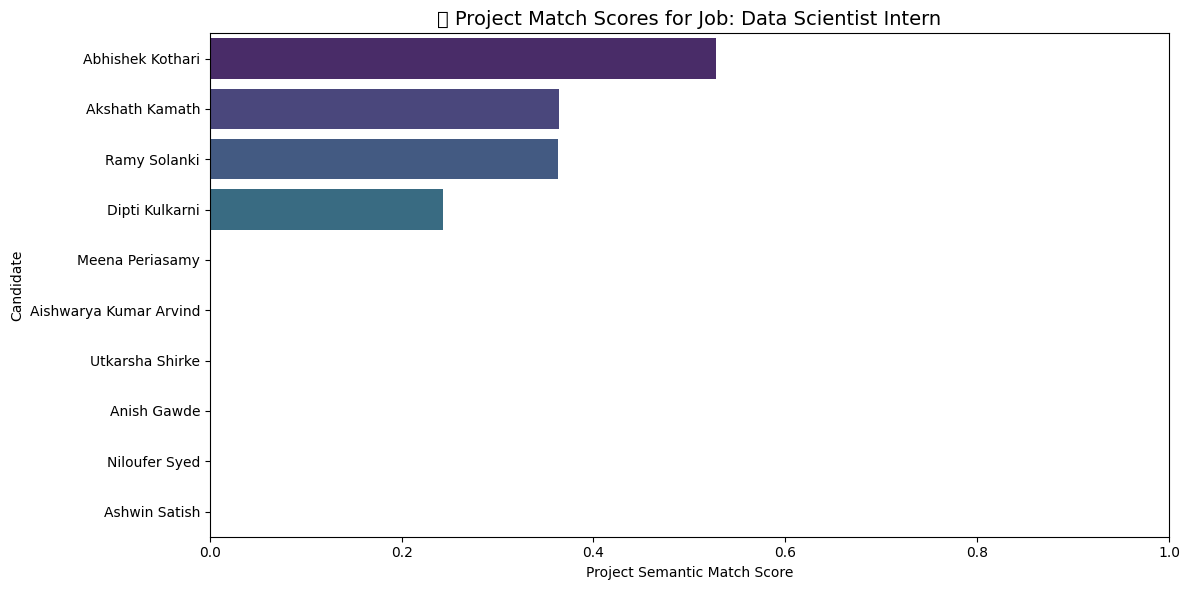

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="viridis")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:90: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


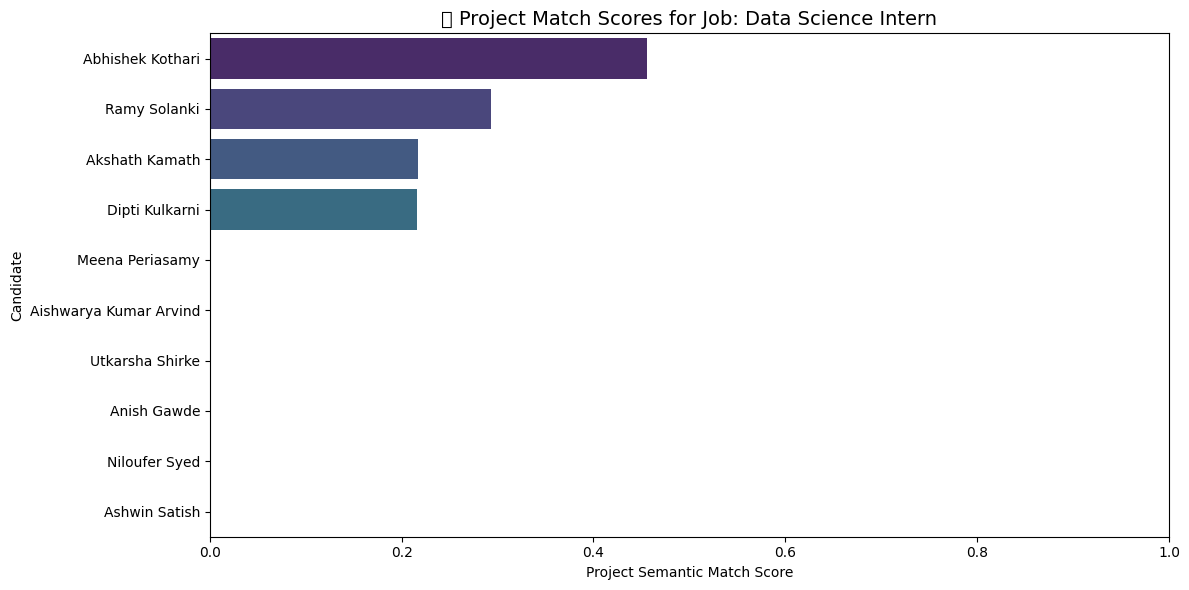

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="viridis")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:90: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


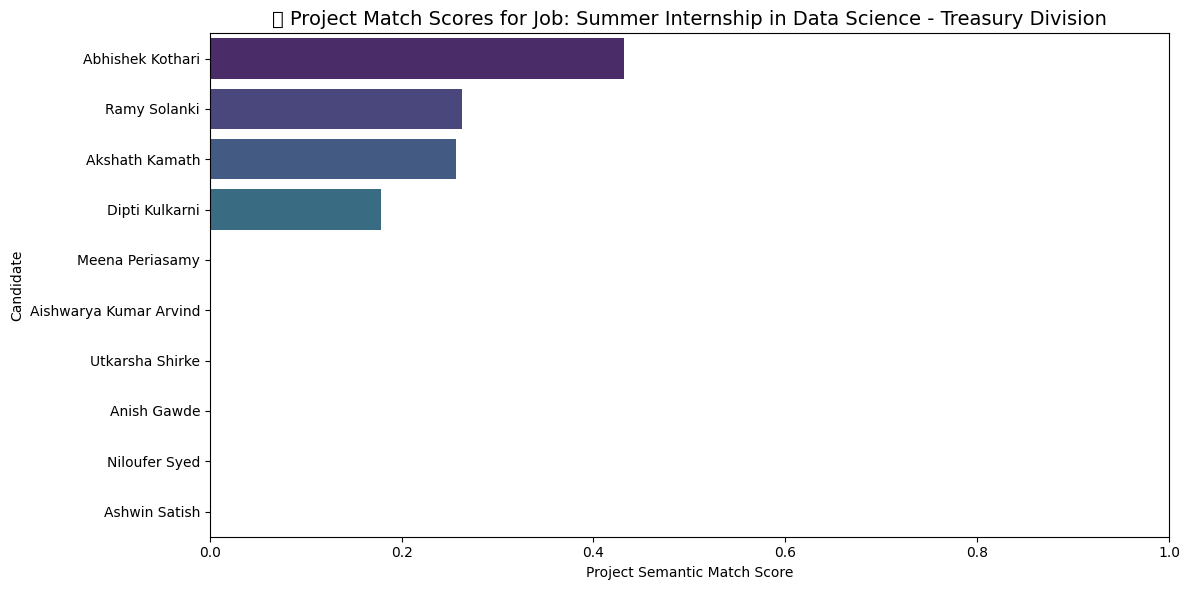

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="viridis")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:90: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


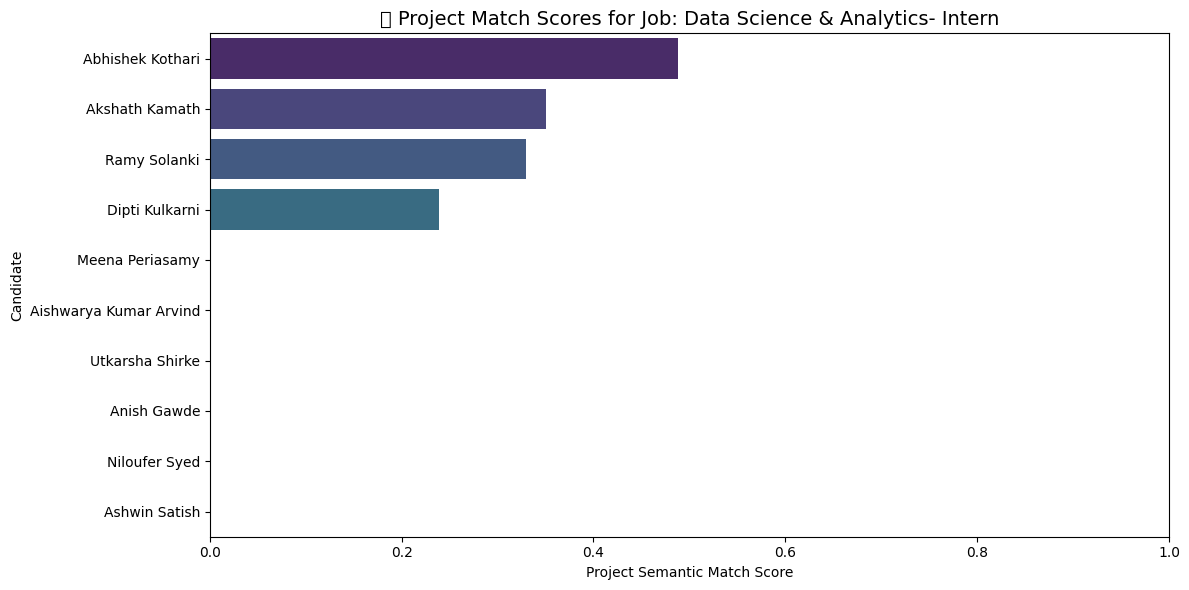

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="viridis")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:90: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


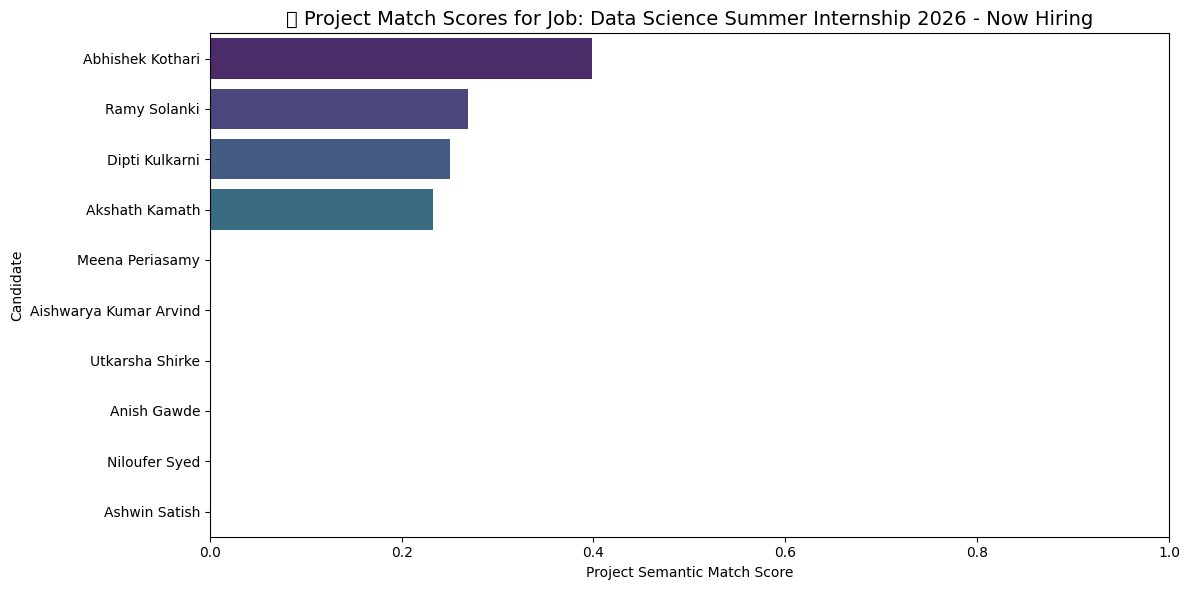

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="viridis")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\1986765386.py:90: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


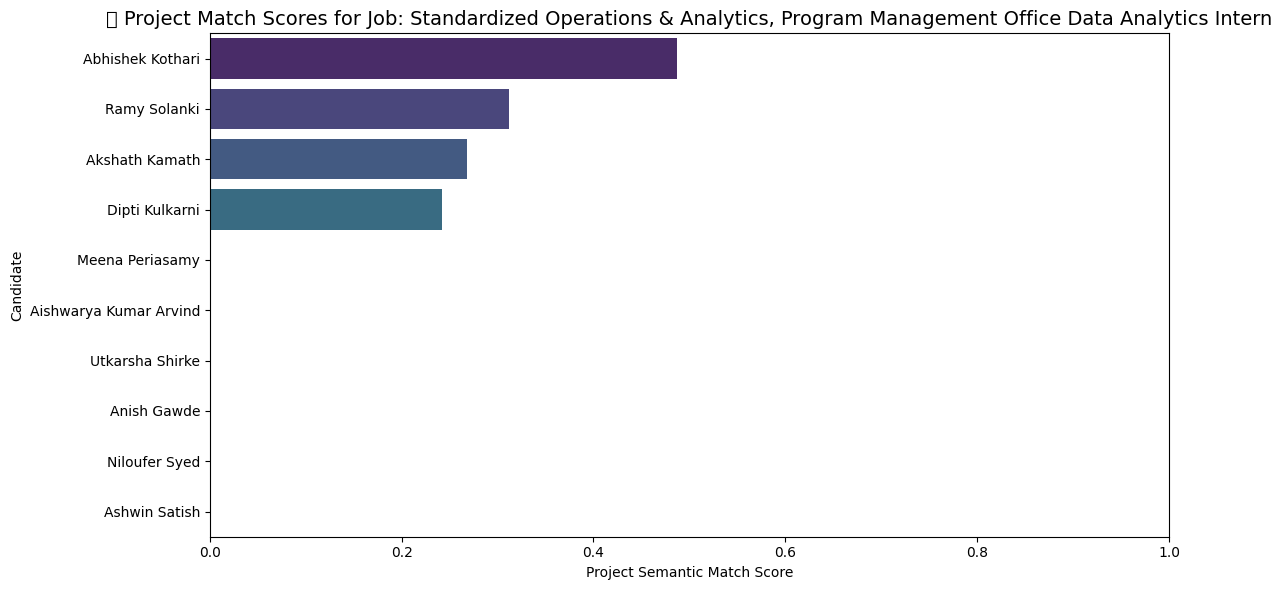

In [66]:
import pandas as pd
import re
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
feature_df = pd.read_csv("semantic_feature_dataset_final.csv")
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')

# Load semantic model
model = SentenceTransformer("all-mpnet-base-v2")

# Extract job role/responsibility
def extract_job_role(text):
    match = re.search(r"(?:RESPONSIBILITIES|ROLE):\s*(.*?)(?:QUALIFICATIONS:|SKILLS:|$)", str(text), re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else str(text).strip()

# Split project blob
def split_projects(blob):
    return [p.strip() for p in str(blob).split('|') if p.strip()]

# Parse project fields
def parse_project(project_text):
    parts = dict(re.findall(r"(\w+): ([^;|]+)", project_text))
    return {
        "name": parts.get("Project_Name", "").strip(),
        "description": parts.get("Project_Description", "").strip(),
        "skills": parts.get("Project_Skills", "").strip()
    }

# Main loop to compute scores
project_scores = []

for _, job_row in jobs_df.iterrows():
    job_id = job_row["Job_ID"]
    job_title = job_row["Job_Title"]
    job_text = extract_job_role(job_row["Job_Description"])
    job_emb = model.encode(job_text, convert_to_tensor=True)

    for _, cand_row in candidates_df.iterrows():
        cand_id = cand_row["Candidate_ID"]
        cand_name = cand_row["Name"]
        projects = split_projects(cand_row["Projects"])
        proj_scores = []

        for proj in projects:
            parsed = parse_project(proj)
            scores = []

            if parsed["description"]:
                desc_emb = model.encode(parsed["description"], convert_to_tensor=True)
                scores.append(util.cos_sim(desc_emb, job_emb).item())

            if parsed["skills"]:
                skills_emb = model.encode(parsed["skills"], convert_to_tensor=True)
                scores.append(util.cos_sim(skills_emb, job_emb).item())

            if scores:
                proj_scores.append(max(scores))  # Use best score for this project

        avg_score = round(sum(sorted(proj_scores, reverse=True)[:3]) / min(3, len(proj_scores)), 4) if proj_scores else 0.0

        project_scores.append({
            "Candidate_ID": cand_id,
            "Candidate_Name": cand_name,
            "Job_ID": job_id,
            "Job_Title": job_title,
            "Company": job_row["Company"],
            "project_semantic_score": avg_score
        })

# Create DataFrame
project_score_df = pd.DataFrame(project_scores)

# === Visualize ===
print("📊 Generating project match score visualizations...")
unique_jobs = project_score_df["Job_Title"].unique()

for job_title in unique_jobs:
    subset = project_score_df[project_score_df["Job_Title"] == job_title].sort_values(by="project_semantic_score", ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="viridis")
    plt.title(f"🔍 Project Match Scores for Job: {job_title}", fontsize=14)
    plt.xlabel("Project Semantic Match Score")
    plt.ylabel("Candidate")
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

# === Save (optional) ===
# merged_df = pd.merge(feature_df, project_score_df[["Candidate_ID", "Job_ID", "project_semantic_score"]],
#                      on=["Candidate_ID", "Job_ID"], how="left", suffixes=("", "_new"))
# merged_df["project_semantic_score"] = merged_df["project_semantic_score_new"].fillna(0.0)
# merged_df.drop(columns=["project_semantic_score_new"], inplace=True)
# merged_df.to_csv("semantic_feature_dataset_final.csv", index=False)
# print("✅ Updated: 'project_semantic_score' added to semantic_feature_dataset_final.csv")


Code improvement required for better score.

why? a model like all-mpnet-base-v2 struggle with:
ML vs Machine Learning
CV vs Computer Vision
AI vs Artificial Intelligence
or mismatches like "Data Visualization" vs "matplotlib, seaborn"

Reason:
Sentence Transformers like all-mpnet-base-v2 are powerful, but:
They don't always capture abbreviations or jargon unless they've seen it in enough context during pretraining.
They don’t explicitly map synonyms unless context makes it obvious.
"I worked on ML models" vs "I built machine learning algorithms" → sometimes yes, sometimes partial match.

Solution 1: Improve Input Text (Preprocessing & Expansion)
Normalize before embedding!

Raw	Improved
ML	Machine Learning
CV	Computer Vision
NLP	Natural Language Processing
matplotlib	Data Visualization
pandas + numpy	Data Analysis, Python Libraries
This is low-cost and gives quick gains.

Solution 2: Use Ensemble:

Why Ensemble Helps:
Each model has strengths:

Model	                Strength
mpnet	                Balanced contextual embeddings
e5-base	                Excellent at retrieval-style “is this relevant?”
bge	                    Fine-tuned for dense search, matches concepts very well
text-embedding-ada-002	Great general embeddings for commercial apps

Example Use Case:

You take your project descriptions like:
"Built a 3D tennis game using OpenCV and Python"

Compare with:
"Looking for someone skilled in computer vision and gesture control."

mpnet might give ~0.4
bge might give ~0.65
e5-base might give ~0.6

Ensemble would boost your match score and improve candidate ranking.

Updated: 'project_semantic_score' column added to semantic_feature_dataset_final.csv


C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3767978920.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="crest")


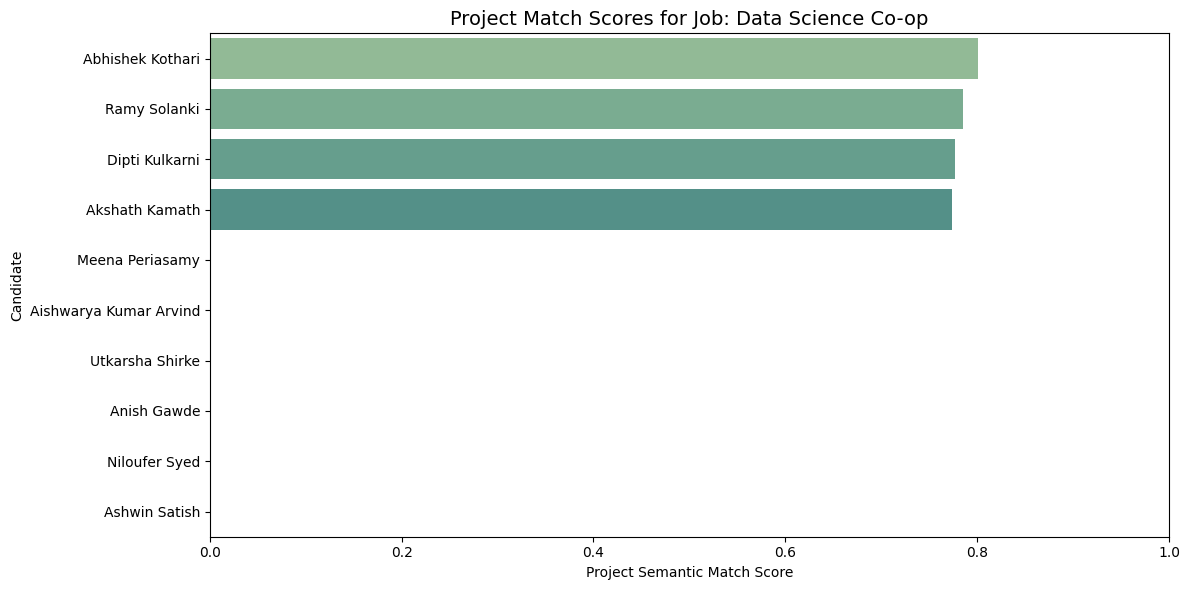

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3767978920.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="crest")


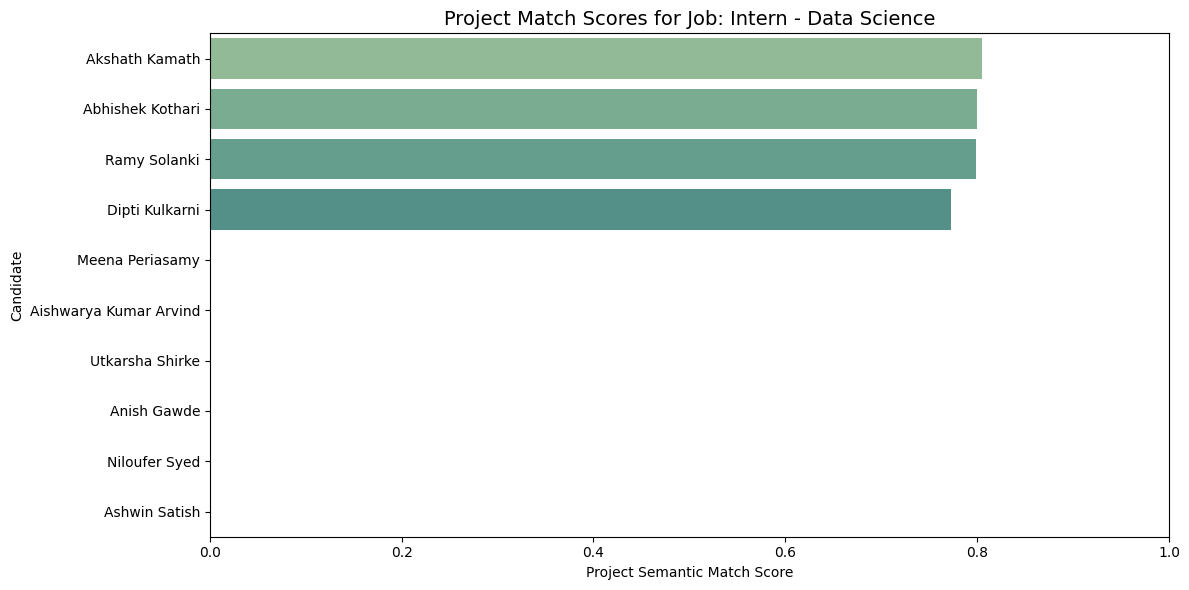

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3767978920.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="crest")


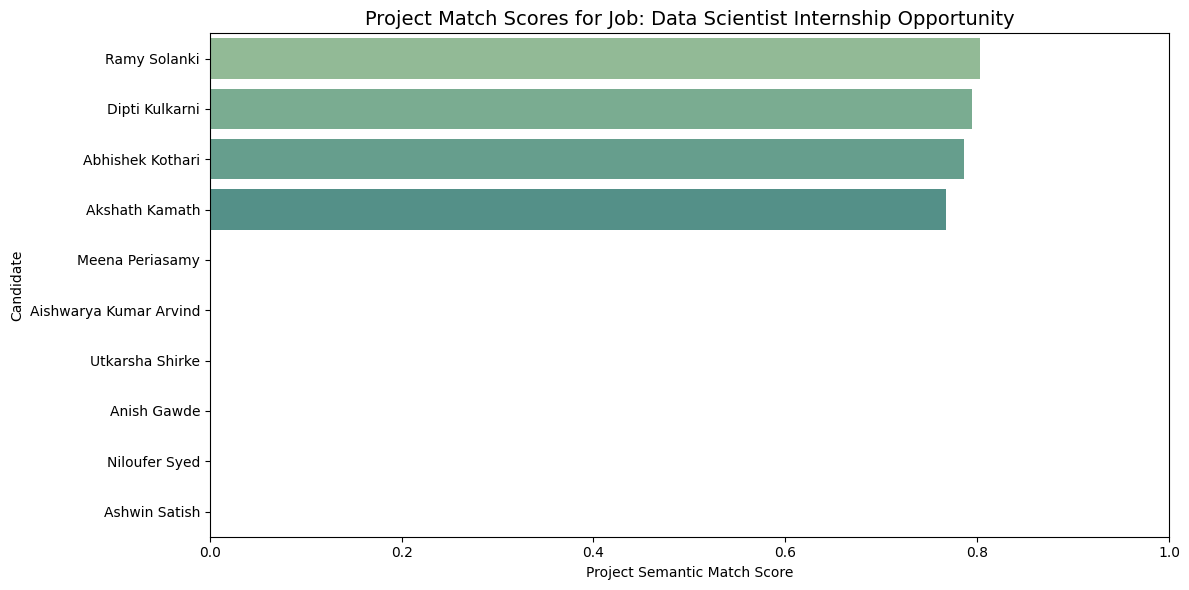

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3767978920.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="crest")


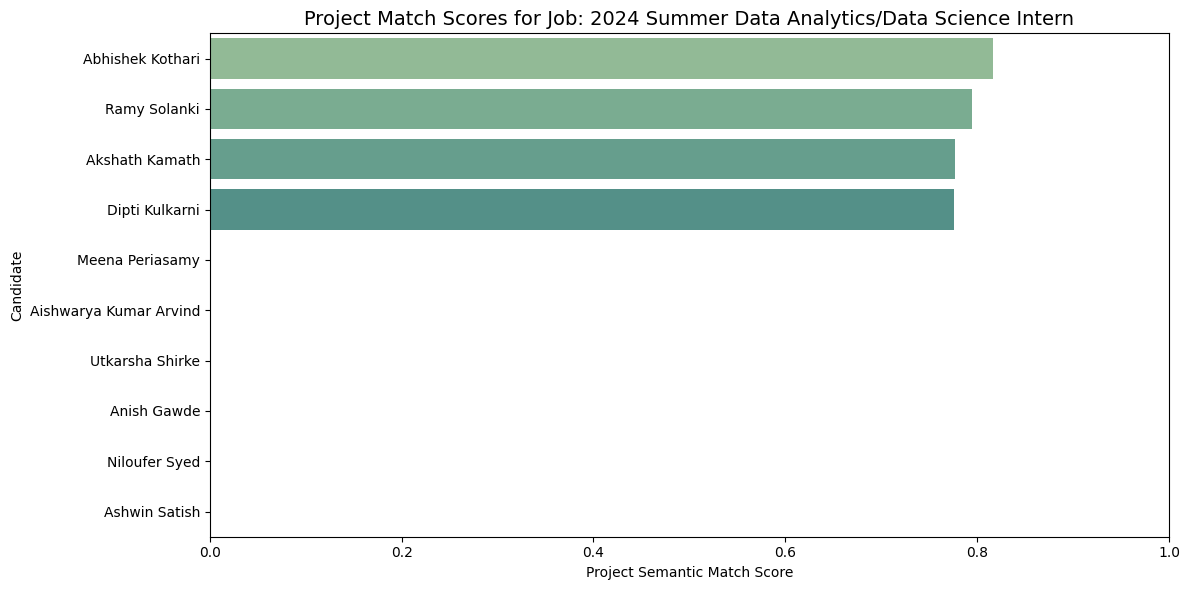

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3767978920.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="crest")


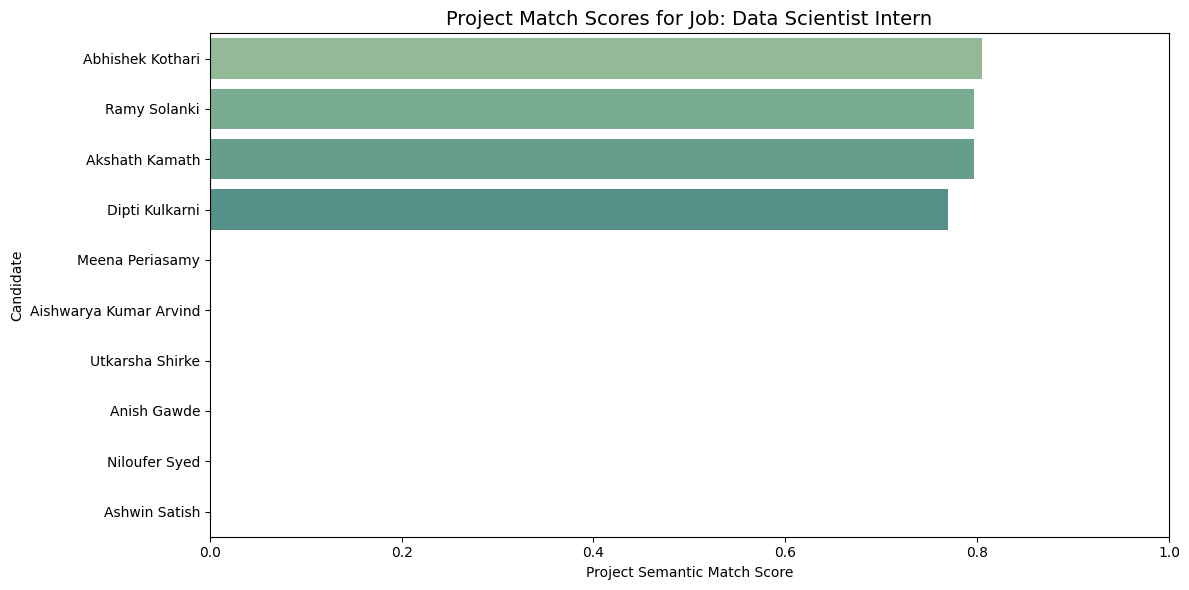

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3767978920.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="crest")


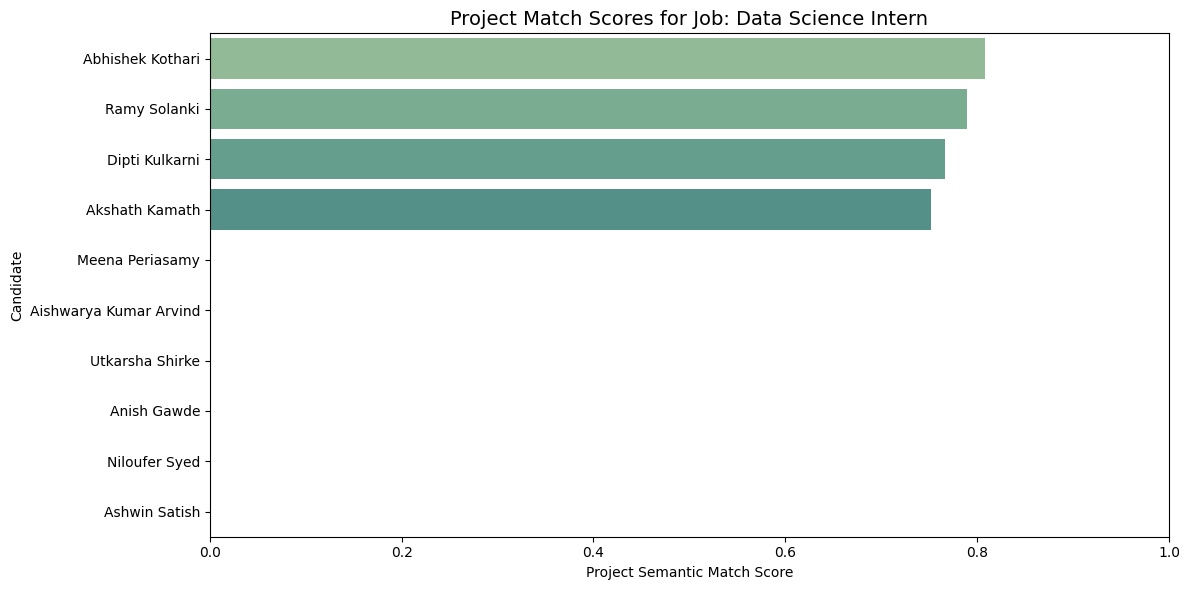

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3767978920.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="crest")


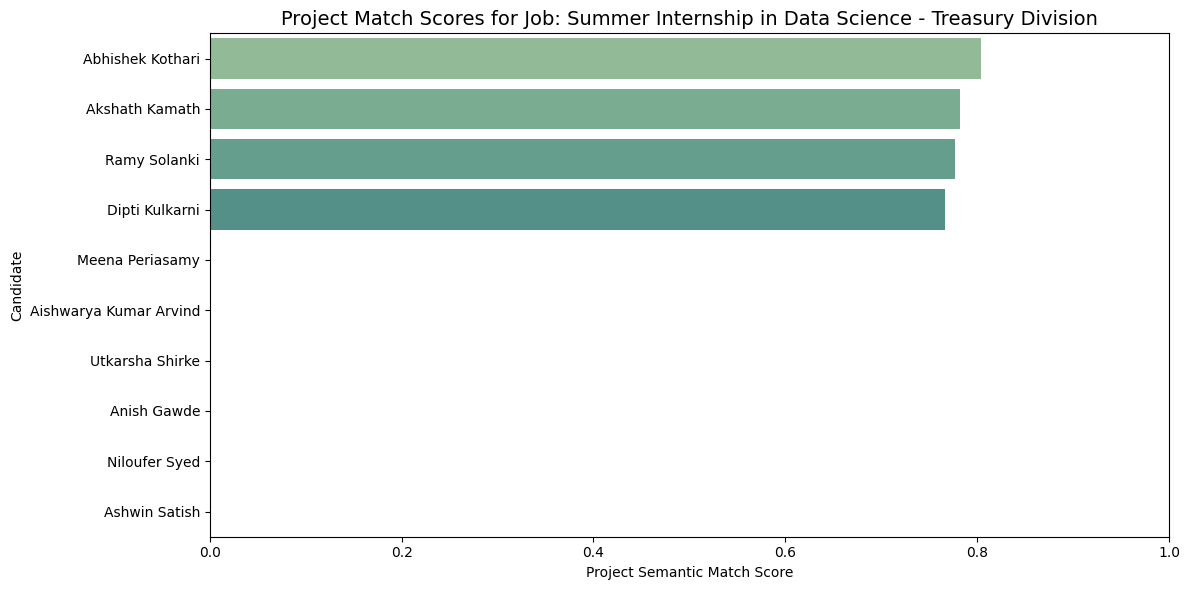

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3767978920.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="crest")


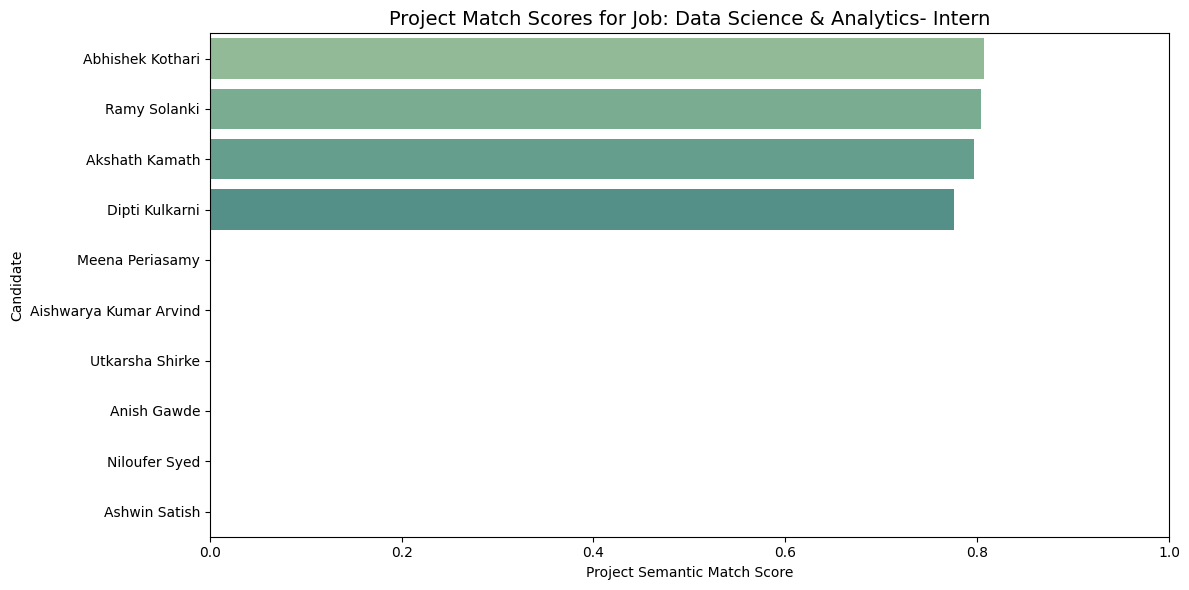

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3767978920.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="crest")


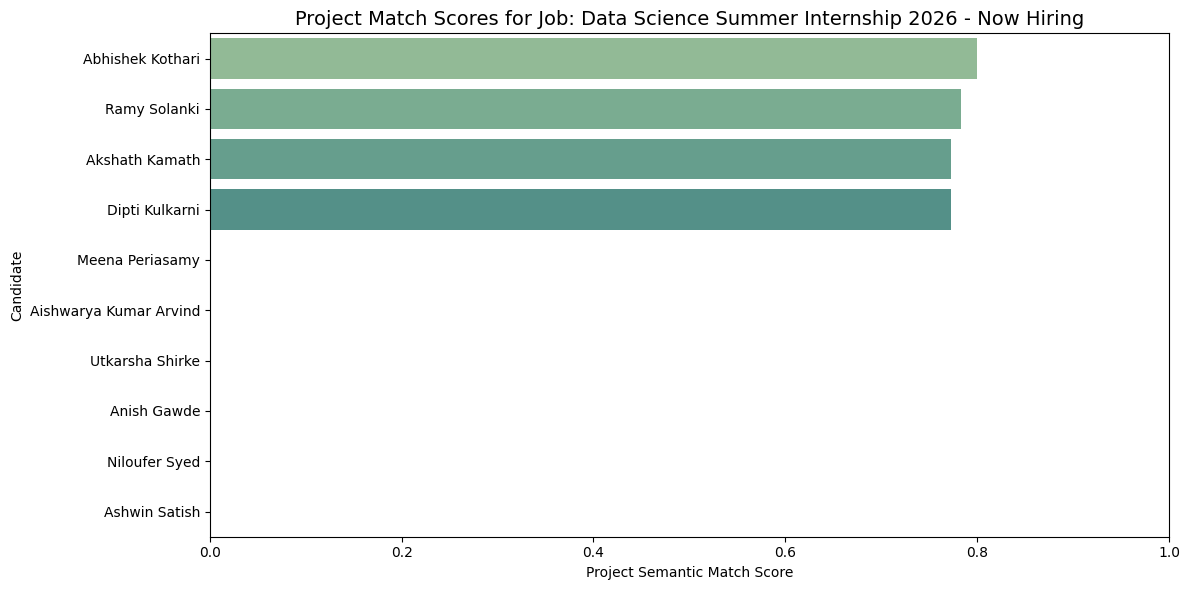

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3767978920.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="crest")


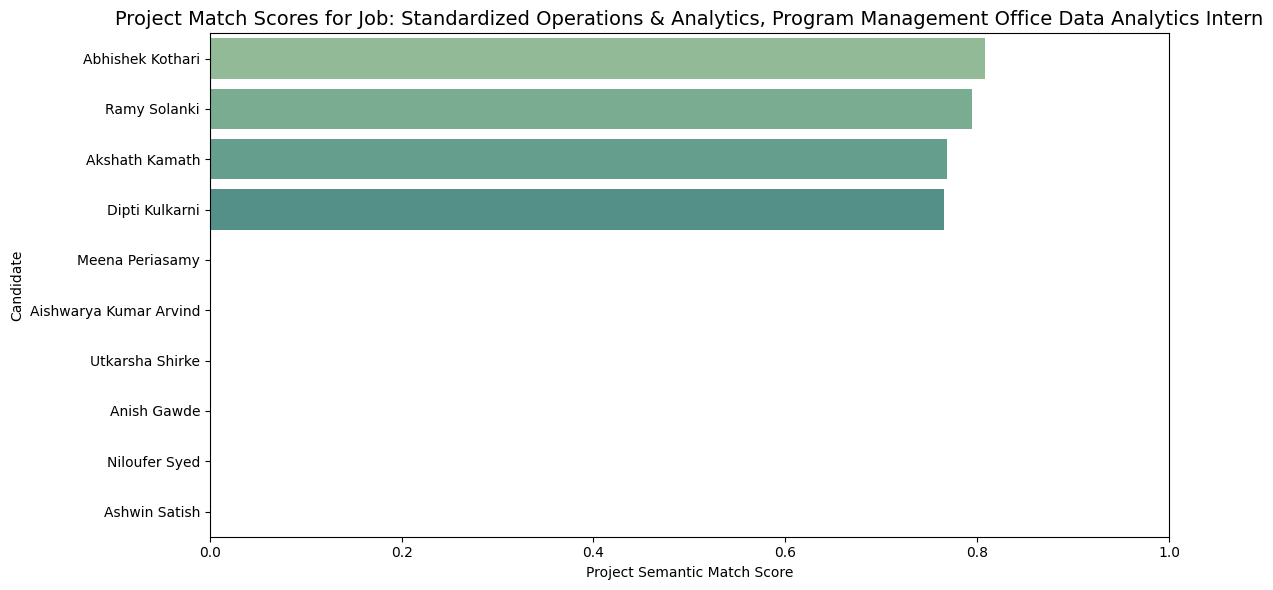

In [74]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, util

# Load Data
feature_df = pd.read_csv("semantic_feature_dataset_final.csv")
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')

# Load Ensemble Models
models = {
    "mpnet": SentenceTransformer("all-mpnet-base-v2"),
    "e5": SentenceTransformer("intfloat/e5-base"),
    "bge": SentenceTransformer("BAAI/bge-base-en-v1.5")
}

# Extract job responsibility or role
def extract_job_role(text):
    match = re.search(r"(?:RESPONSIBILITIES|ROLE):\s*(.*?)(?:QUALIFICATIONS:|SKILLS:|$)",
                      str(text), re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else str(text).strip()

# Split projects
def split_projects(blob):
    return [p.strip() for p in str(blob).split('|') if p.strip()]

# Parse individual project text
def parse_project(project_text):
    parts = dict(re.findall(r"(\w+): ([^;|]+)", project_text))
    return {
        "name": parts.get("Project_Name", "").strip(),
        "description": parts.get("Project_Description", "").strip(),
        "skills": parts.get("Project_Skills", "").strip()
    }

# Scoring function with ensemble
def get_max_semantic_score(text1, text2):
    scores = []
    for name, model in models.items():
        emb1 = model.encode(text1, convert_to_tensor=True)
        emb2 = model.encode(text2, convert_to_tensor=True)
        sim = util.cos_sim(emb1, emb2).item()
        scores.append(sim)
    return max(scores)

# Main Matching Loop
project_scores = []

for _, job_row in jobs_df.iterrows():
    job_id = job_row["Job_ID"]
    job_title = job_row["Job_Title"]
    company = job_row["Company"]
    job_text = extract_job_role(job_row["Job_Description"])

    for _, cand_row in candidates_df.iterrows():
        cand_id = cand_row["Candidate_ID"]
        cand_name = cand_row["Name"]
        projects = split_projects(cand_row["Projects"])
        proj_scores = []
        explanations = []

        for proj in projects:
            parsed = parse_project(proj)
            score = 0.0

            if parsed["description"]:
                score = max(score, get_max_semantic_score(parsed["description"], job_text))
            if parsed["skills"]:
                score = max(score, get_max_semantic_score(parsed["skills"], job_text))

            if score > 0:
                proj_scores.append(score)
                explanations.append({
                    "Project": parsed["name"],
                    "Score": round(score, 4)
                })

        # Average top 3 projects
        avg_score = round(sum(sorted(proj_scores, reverse=True)[:3]) / min(3, len(proj_scores)), 4) if proj_scores else 0.0
        '''
        # Print matched project explanations
        print(f"\n Job: {job_title}")
        print(f" Candidate: {cand_name}")
        print(f"Final Project Score: {avg_score}")
        for ex in explanations:
            print(f"   -  {ex['Project']} → Score: {ex['Score']}")
        if not explanations:
            print("   -  No strong project matches.")
        '''

        project_scores.append({
            "Candidate_ID": cand_id,
            "Candidate_Name": cand_name,
            "Job_ID": job_id,
            "Job_Title": job_title,
            "Company": company,
            "project_semantic_score": avg_score
        })

# Convert to DataFrame
project_score_df = pd.DataFrame(project_scores)

# Merge into original feature file
merged_df = pd.merge(feature_df, project_score_df, on=["Candidate_ID", "Job_ID"], how="left", suffixes=("", "_new"))
merged_df["project_semantic_score"] = merged_df["project_semantic_score_new"].fillna(0.0)
merged_df.drop(columns=["project_semantic_score_new"], inplace=True)

# Save final CSV
#merged_df.to_csv("semantic_feature_dataset_final_updated.csv", index=False)
print("Updated: 'project_semantic_score' column added to semantic_feature_dataset_final.csv")


# Visualizations per job
for job_title in project_score_df["Job_Title"].unique():
    subset = project_score_df[project_score_df["Job_Title"] == job_title].sort_values(by="project_semantic_score", ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x="project_semantic_score", y="Candidate_Name", data=subset, palette="crest")
    plt.title(f"Project Match Scores for Job: {job_title}", fontsize=14)
    plt.xlabel("Project Semantic Match Score")
    plt.ylabel("Candidate")
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()




#project semantic analysis

                                            Job_Title   Candidate_Name  \
0                                  Data Science Co-op  Meena Periasamy   
1                                  Data Science Co-op  Meena Periasamy   
2                                  Data Science Co-op  Meena Periasamy   
3                                  Data Science Co-op  Meena Periasamy   
4                                  Data Science Co-op  Meena Periasamy   
..                                                ...              ...   
75  Standardized Operations & Analytics, Program M...  Meena Periasamy   
76  Standardized Operations & Analytics, Program M...  Meena Periasamy   
77  Standardized Operations & Analytics, Program M...  Meena Periasamy   
78  Standardized Operations & Analytics, Program M...  Meena Periasamy   
79  Standardized Operations & Analytics, Program M...  Meena Periasamy   

                                    Publication_Title   Score Relevant  
0       Machine Learning Enhanced Spid

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


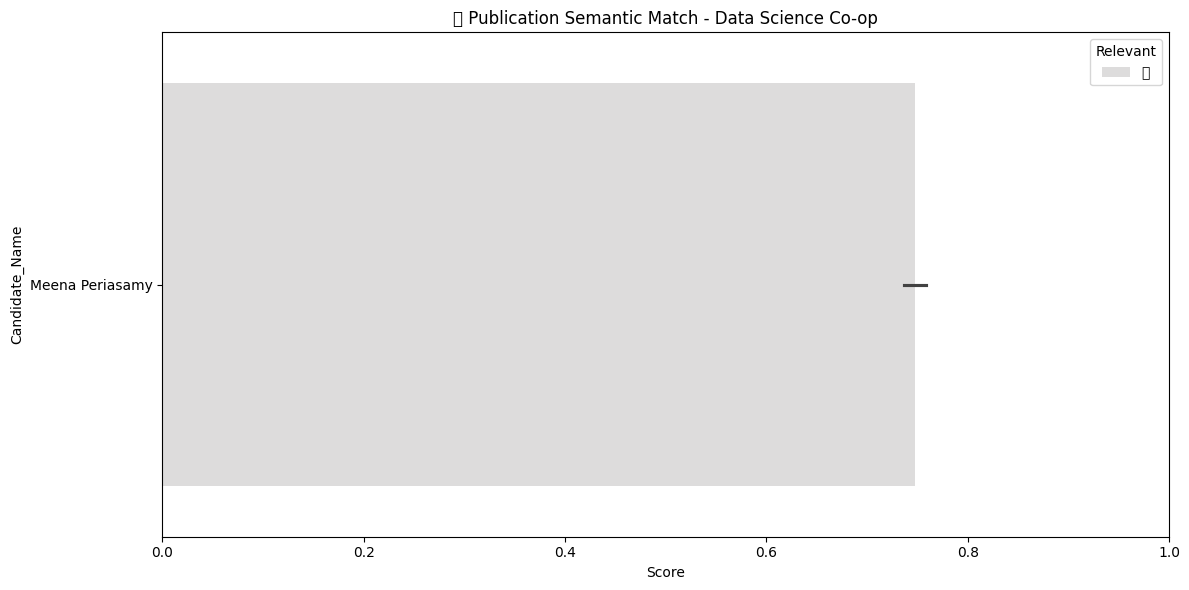

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


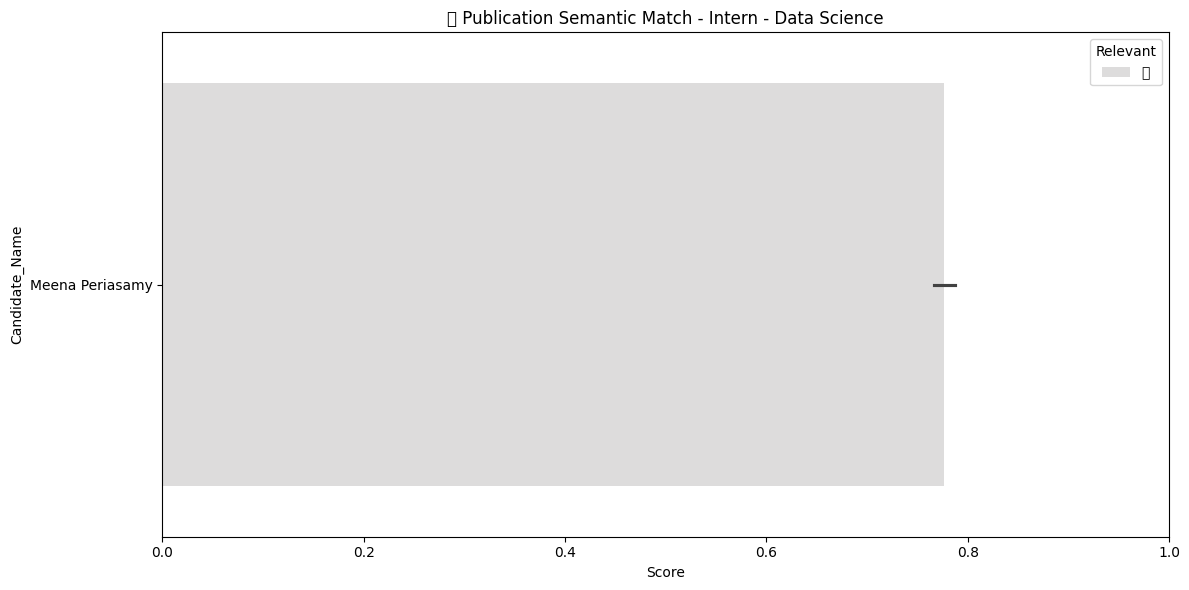

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


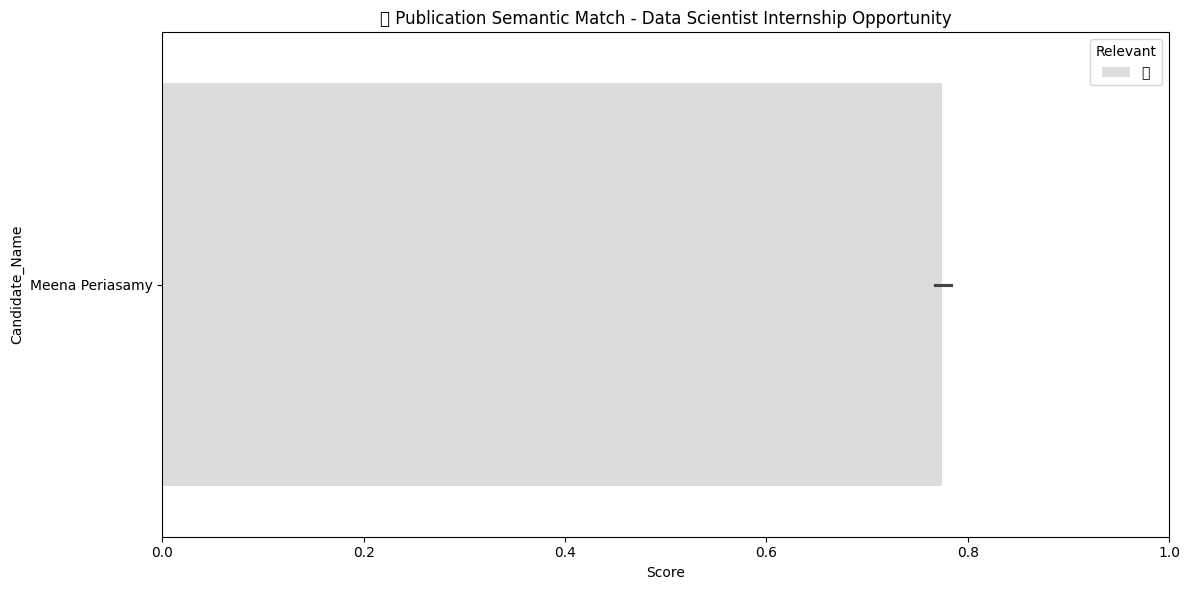

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


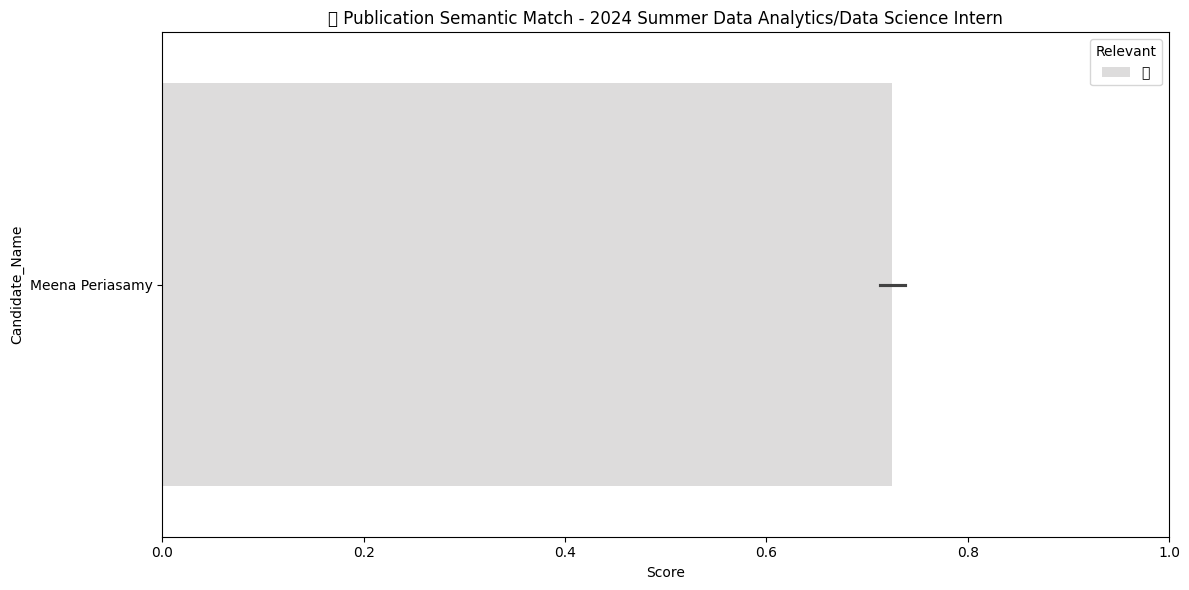

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


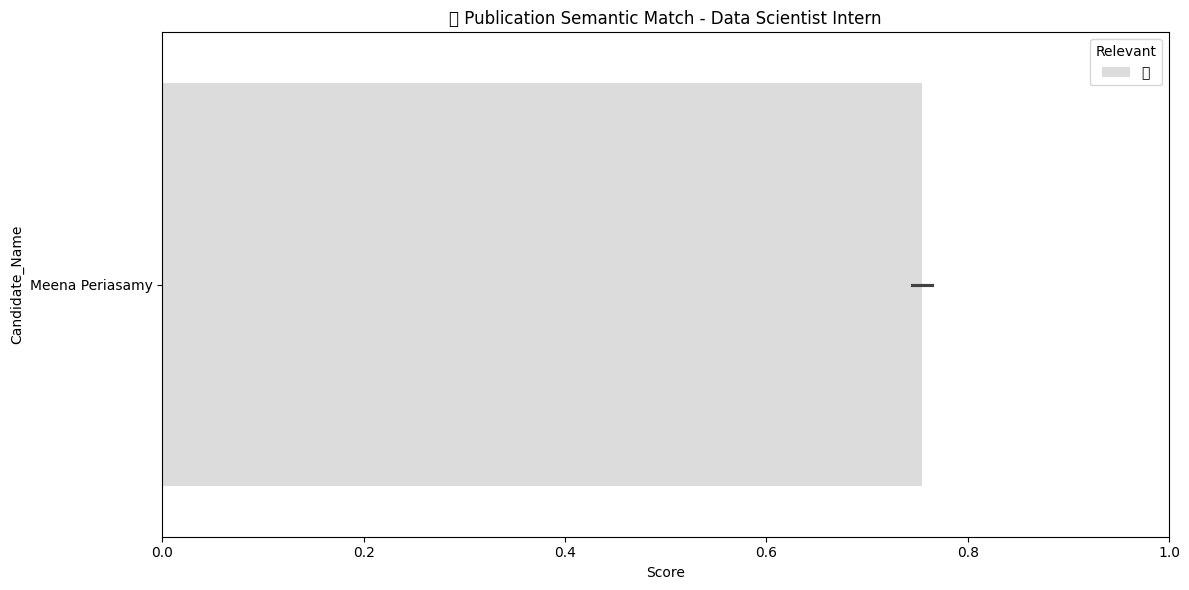

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


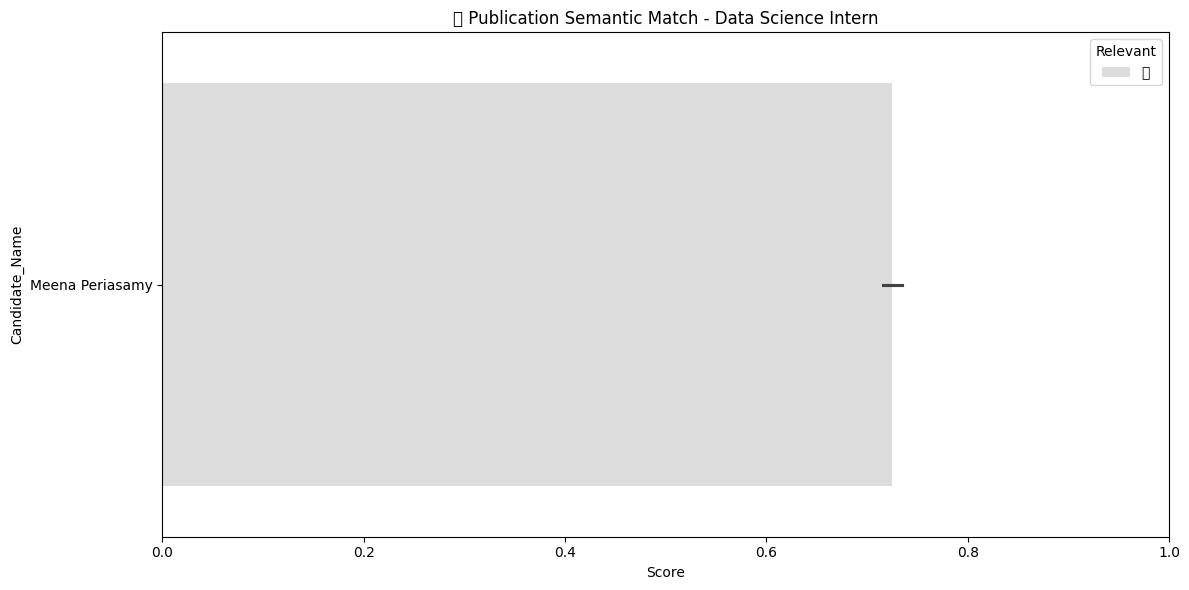

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


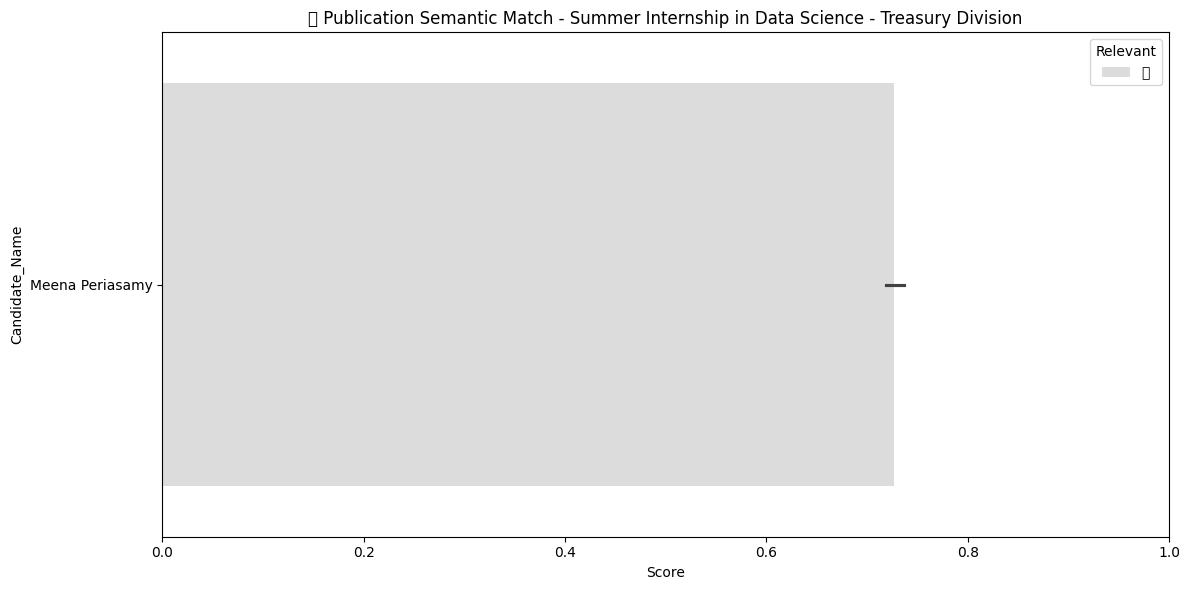

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


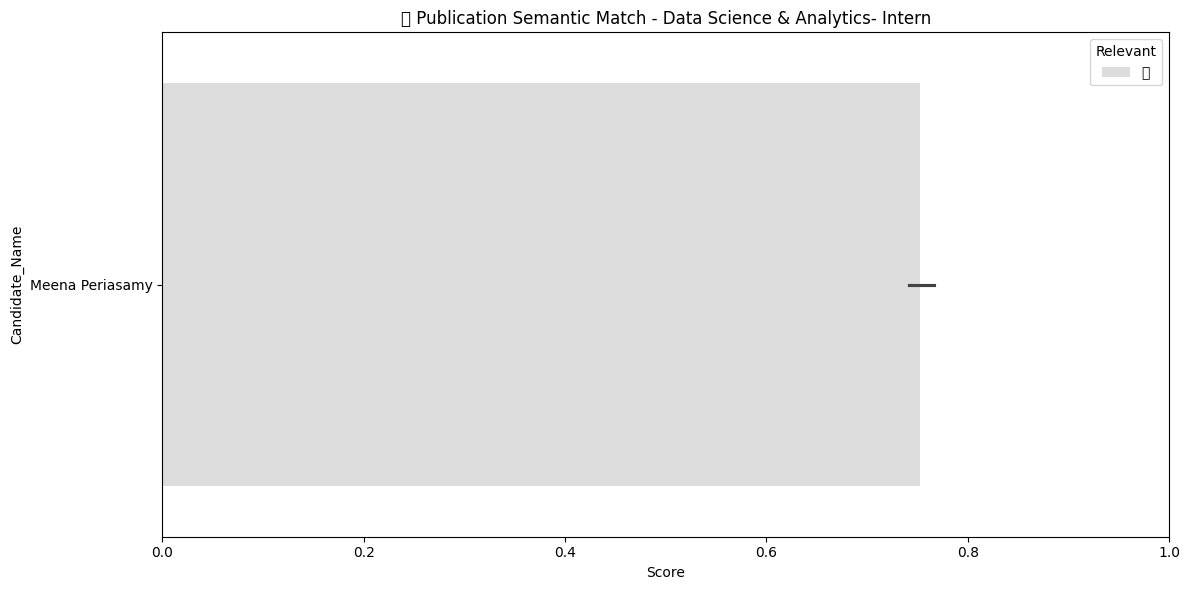

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


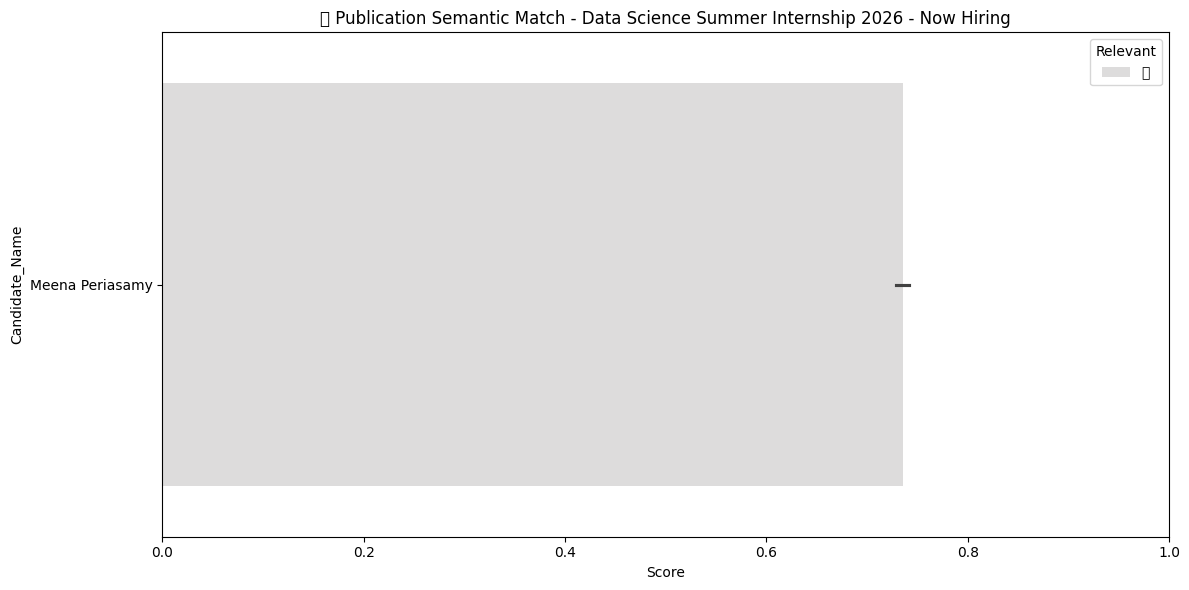

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3979415282.py:81: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


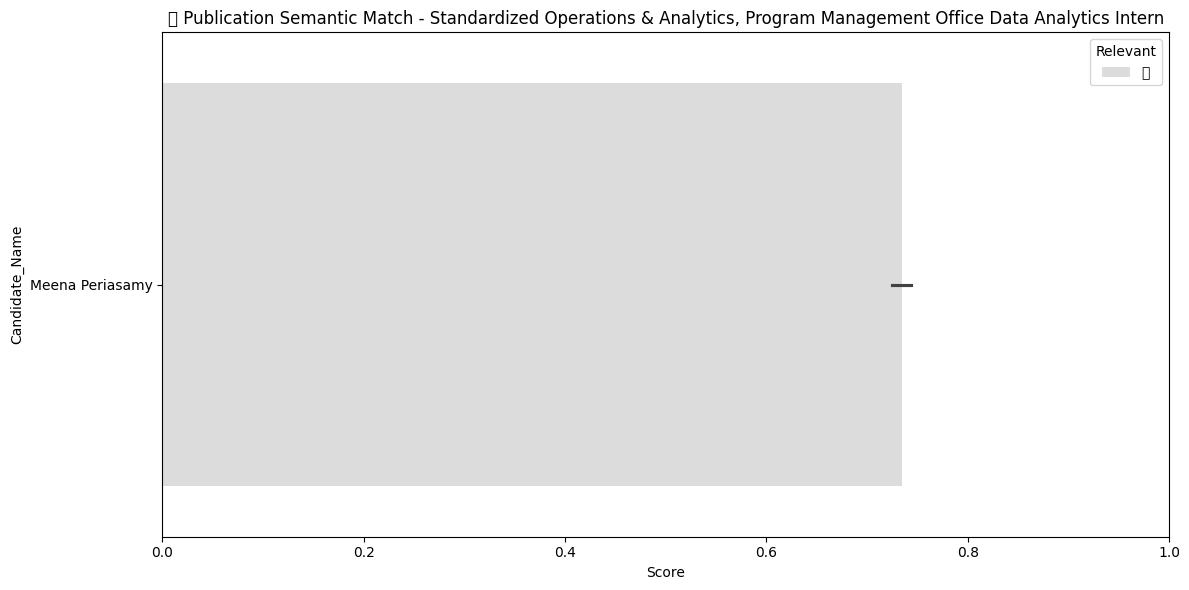

In [76]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, util

# Load Data
feature_df = pd.read_csv("semantic_feature_dataset_final.csv")
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')

# Load Ensemble Models
models = {
    "mpnet": SentenceTransformer("all-mpnet-base-v2"),
    "e5": SentenceTransformer("intfloat/e5-base"),
    "bge": SentenceTransformer("BAAI/bge-base-en-v1.5")
}

# Extract role/responsibility section
def extract_job_role(text):
    match = re.search(r"(?:RESPONSIBILITIES|ROLE):\s*(.*?)(?:QUALIFICATIONS:|SKILLS:|$)", str(text), re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else str(text).strip()

# Split and parse publication entries
def split_publications(blob):
    return [p.strip() for p in str(blob).split('|') if p.strip()]

def parse_publication(pub_text):
    parts = dict(re.findall(r"(\w+): ([^;|]+)", pub_text))
    return {
        "title": parts.get("Publication_Title", "").strip(),
        "description": parts.get("Publication_Description", "").strip()
    }

# Ensemble scoring
def get_max_ensemble_score(text1, text2):
    scores = []
    for model in models.values():
        emb1 = model.encode(text1, convert_to_tensor=True)
        emb2 = model.encode(text2, convert_to_tensor=True)
        sim = util.cos_sim(emb1, emb2).item()
        scores.append(sim)
    return max(scores)

# Match loop
match_logs = []

for _, job_row in jobs_df.iterrows():
    job_title = job_row["Job_Title"]
    job_text = extract_job_role(job_row["Job_Description"])

    for _, cand_row in candidates_df.iterrows():
        cand_name = cand_row["Name"]
        publications = split_publications(cand_row["Publications"])

        for pub in publications:
            parsed = parse_publication(pub)
            if not parsed["description"]:
                continue

            score = get_max_ensemble_score(parsed["description"], job_text)
            match_logs.append({
                "Job_Title": job_title,
                "Candidate_Name": cand_name,
                "Publication_Title": parsed["title"],
                "Score": round(score, 4),
                "Relevant": "✅" if score >= 0.55 else "❌"
            })

# Convert to DataFrame
df = pd.DataFrame(match_logs)
print(df)
# Visualize
for job in df["Job_Title"].unique():
    job_df = df[df["Job_Title"] == job].sort_values(by="Score", ascending=False)
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Score", y="Candidate_Name", hue="Relevant", data=job_df, palette="coolwarm")
    plt.title(f"📚 Publication Semantic Match - {job}")
    plt.xlabel("Score")
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()


                                            Job_Title   Candidate_Name  \
0                                  Data Science Co-op  Meena Periasamy   
1                                  Data Science Co-op  Meena Periasamy   
2                                  Data Science Co-op  Meena Periasamy   
3                                  Data Science Co-op  Meena Periasamy   
4                                  Data Science Co-op  Meena Periasamy   
..                                                ...              ...   
75  Standardized Operations & Analytics, Program M...  Meena Periasamy   
76  Standardized Operations & Analytics, Program M...  Meena Periasamy   
77  Standardized Operations & Analytics, Program M...  Meena Periasamy   
78  Standardized Operations & Analytics, Program M...  Meena Periasamy   
79  Standardized Operations & Analytics, Program M...  Meena Periasamy   

                                    Publication_Title   Score Match (%)  \
0       Machine Learning Enhanced Sp

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


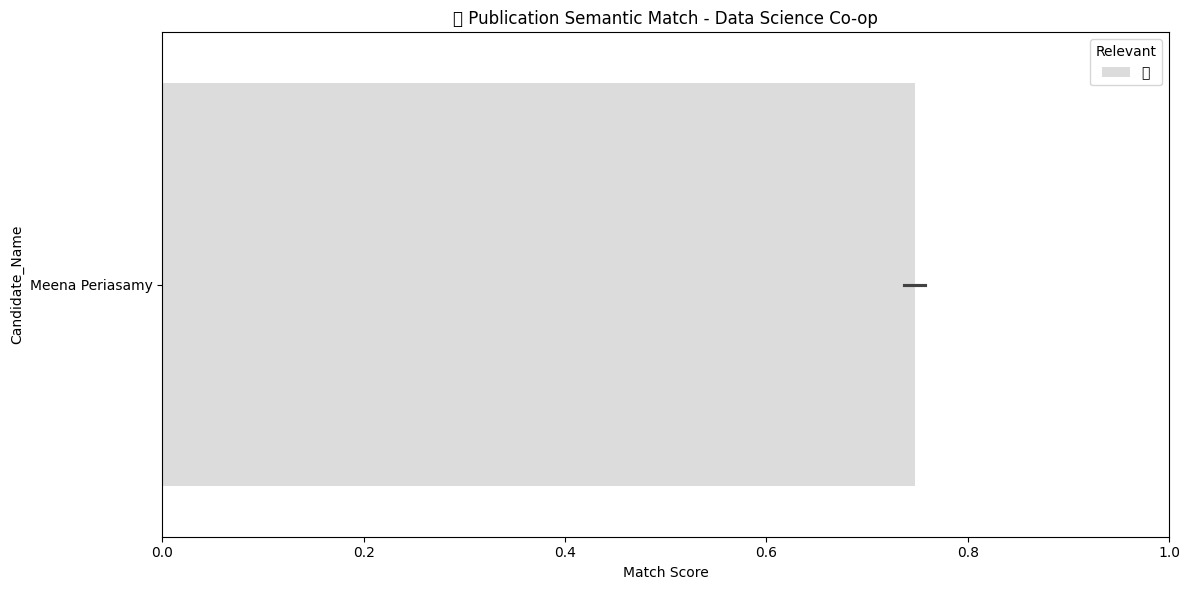

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


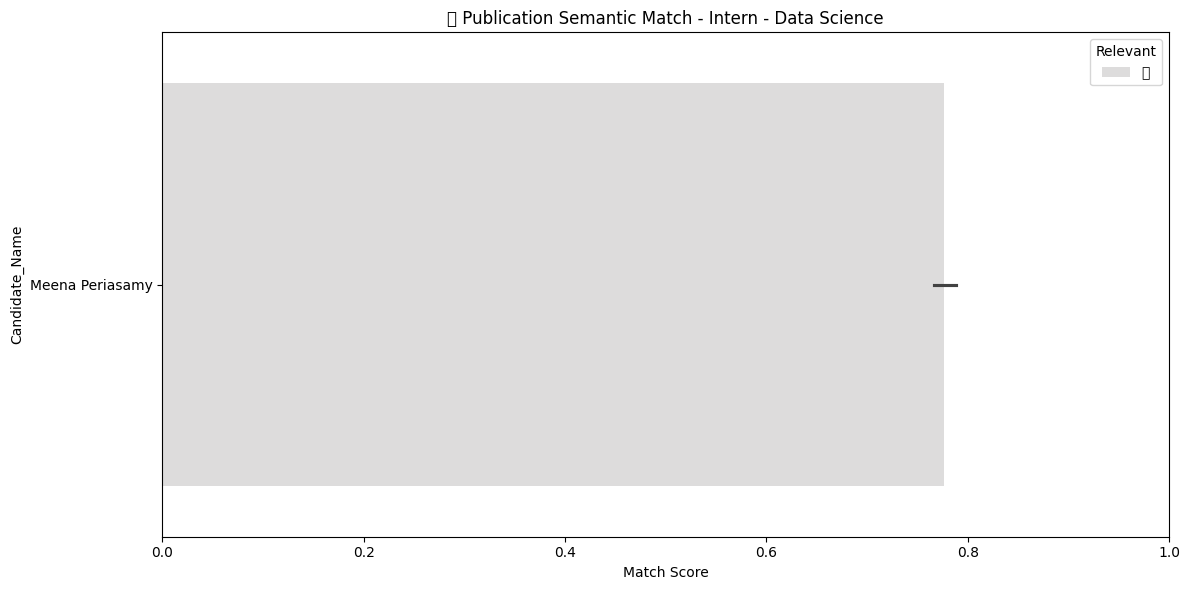

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


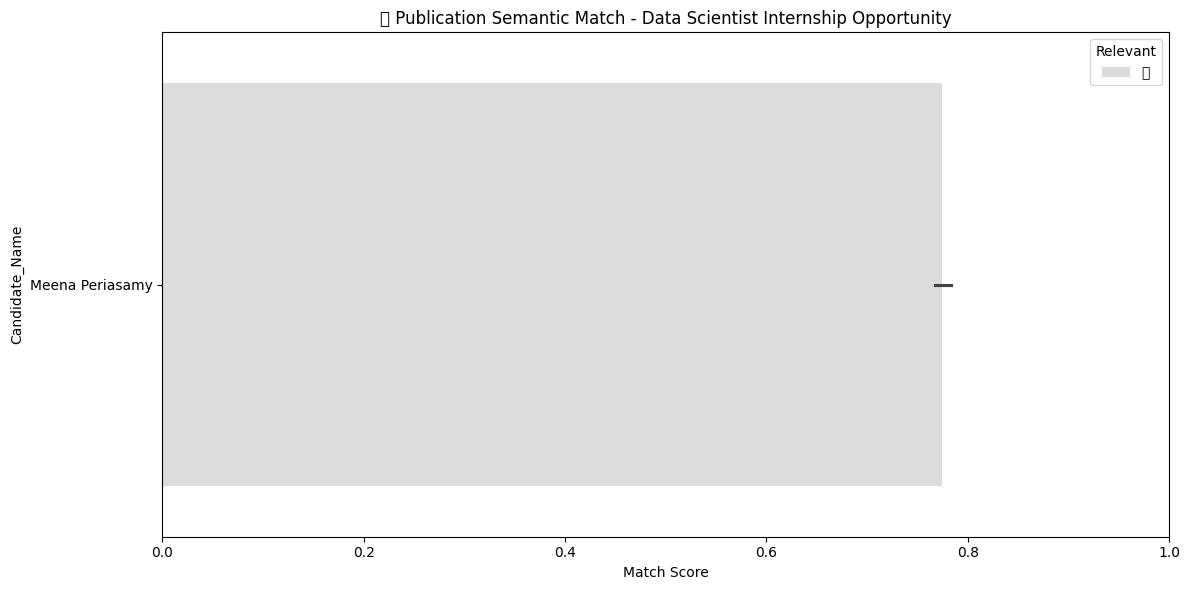

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


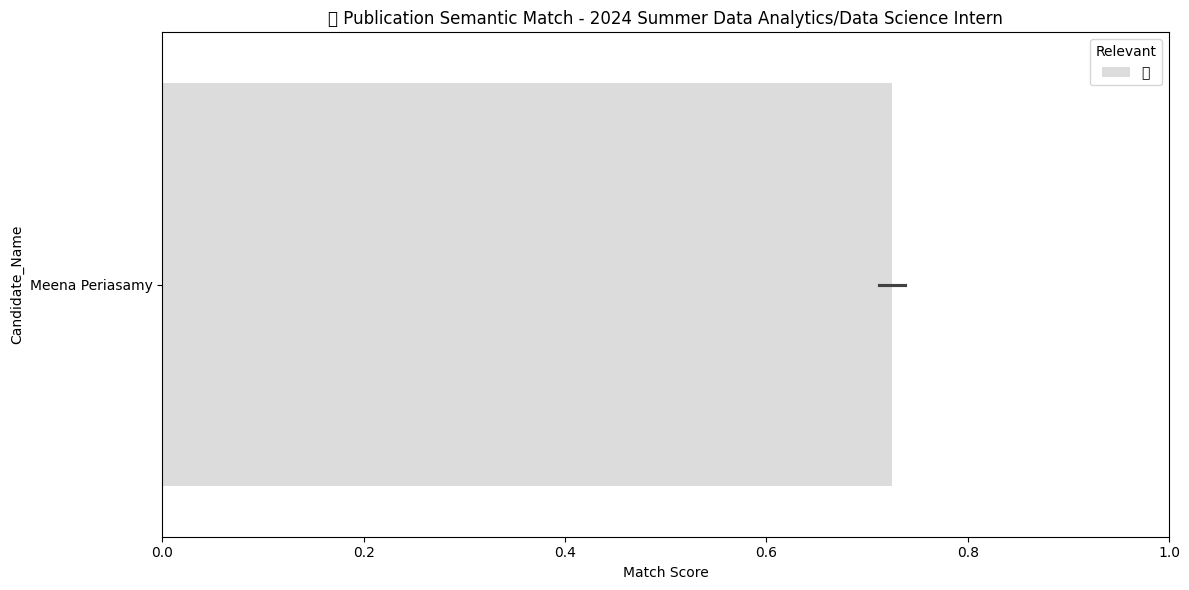

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


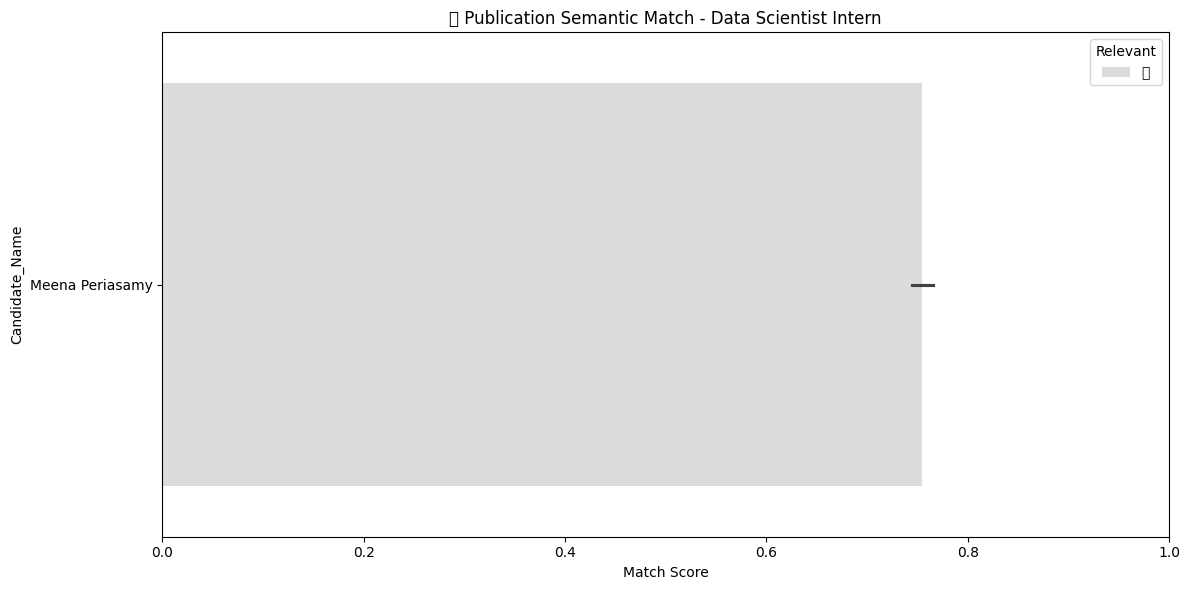

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


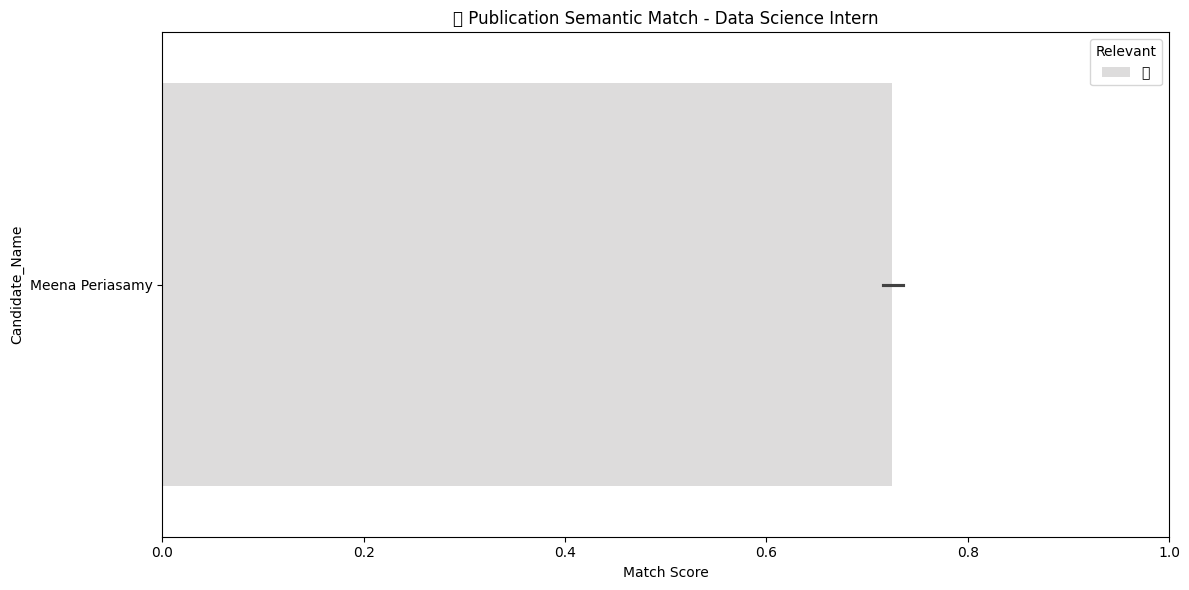

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


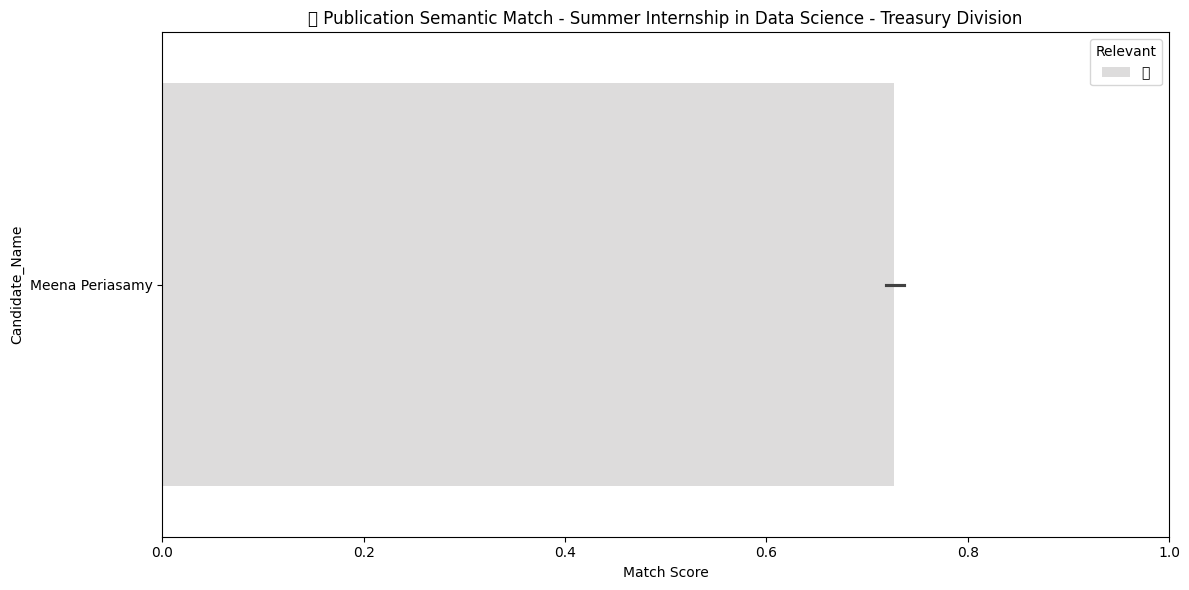

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


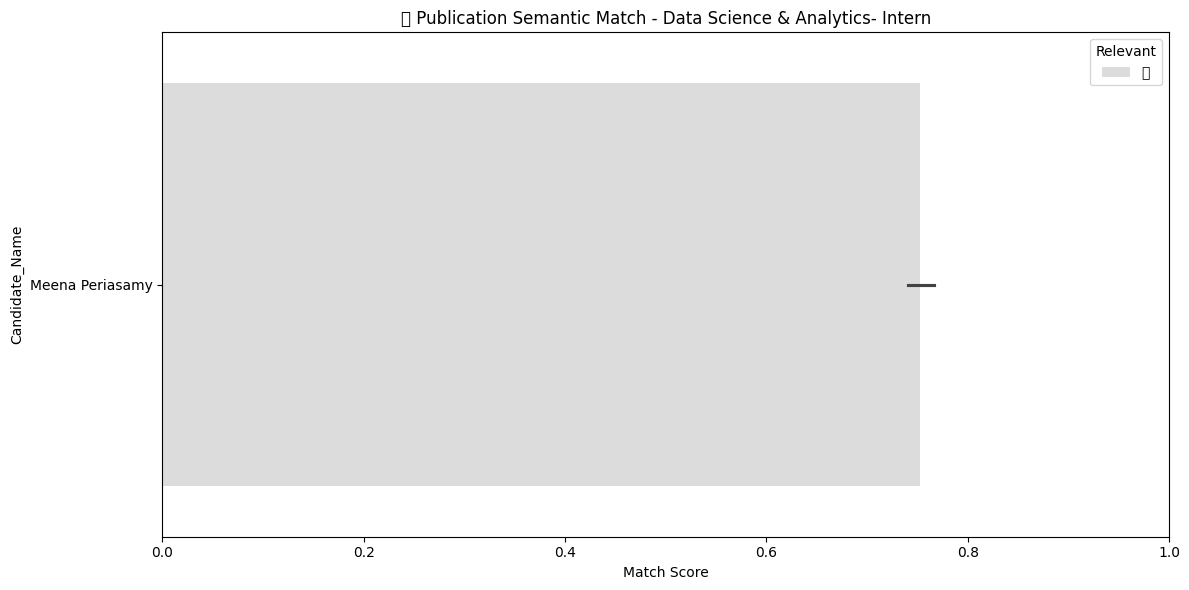

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


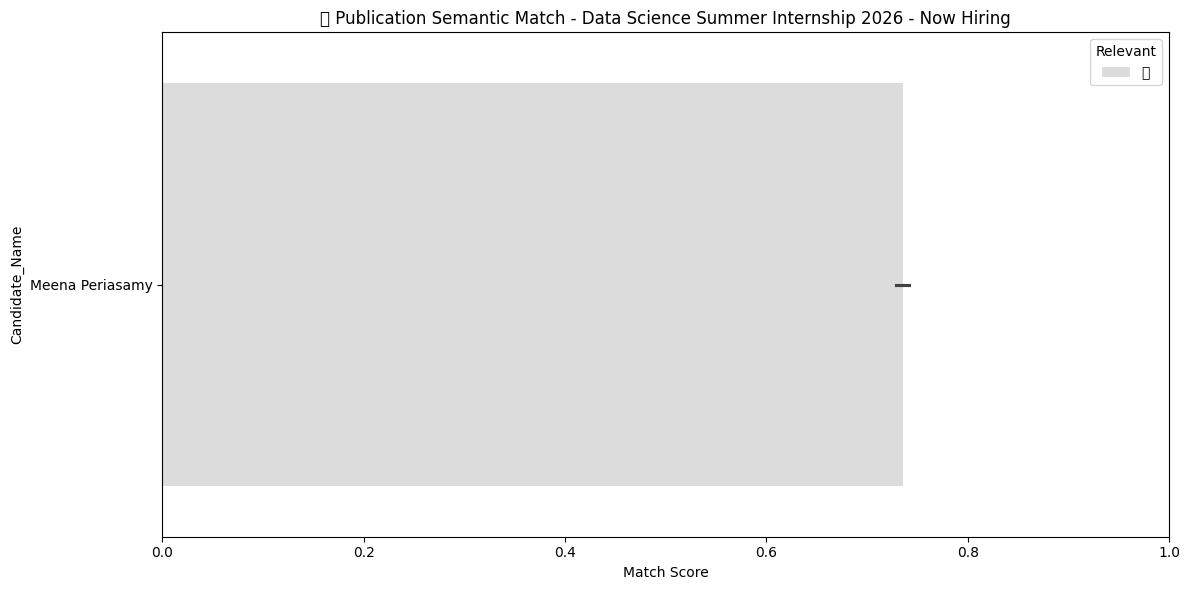

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2425516348.py:83: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


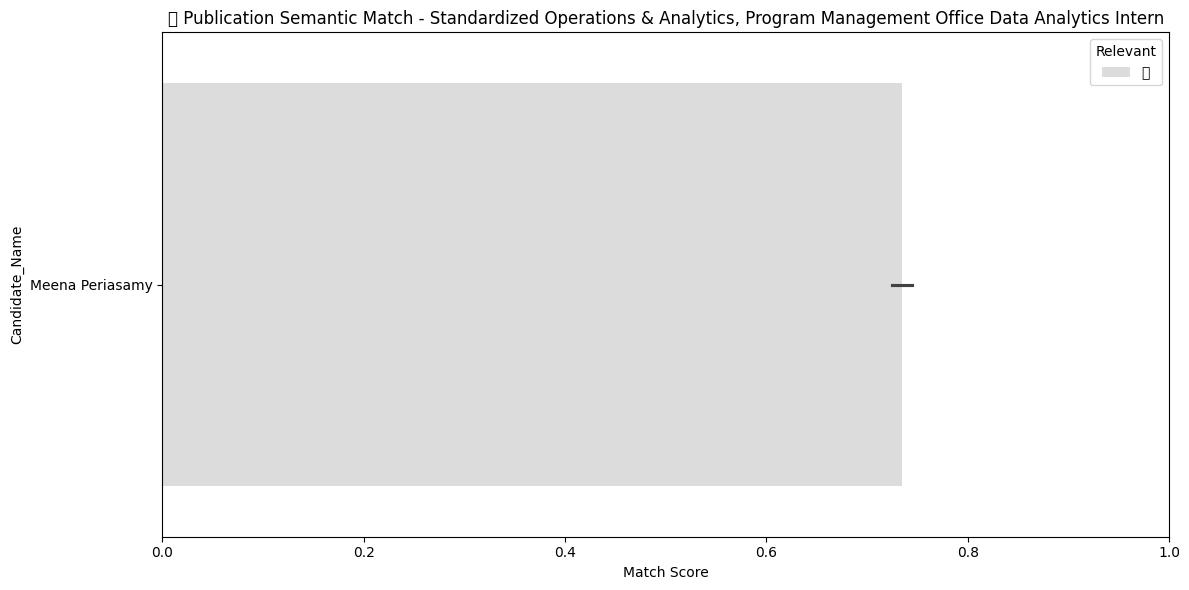

In [77]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, util

# Load Data
feature_df = pd.read_csv("semantic_feature_dataset_final.csv")
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')

# Load Ensemble Models
models = {
    "mpnet": SentenceTransformer("all-mpnet-base-v2"),
    "e5": SentenceTransformer("intfloat/e5-base"),
    "bge": SentenceTransformer("BAAI/bge-base-en-v1.5")
}

# Extract role/responsibility section
def extract_job_role(text):
    match = re.search(r"(?:RESPONSIBILITIES|ROLE):\s*(.*?)(?:QUALIFICATIONS:|SKILLS:|$)", str(text), re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else str(text).strip()

# Split and parse publication entries
def split_publications(blob):
    return [p.strip() for p in str(blob).split('|') if p.strip()]

def parse_publication(pub_text):
    parts = dict(re.findall(r"(\w+): ([^;|]+)", pub_text))
    return {
        "title": parts.get("Publication_Title", "").strip(),
        "description": parts.get("Publication_Description", "").strip()
    }

# Ensemble scoring
def get_max_ensemble_score(text1, text2):
    scores = []
    for model in models.values():
        emb1 = model.encode(text1, convert_to_tensor=True)
        emb2 = model.encode(text2, convert_to_tensor=True)
        sim = util.cos_sim(emb1, emb2).item()
        scores.append(sim)
    return max(scores)

# Match loop
match_logs = []

for _, job_row in jobs_df.iterrows():
    job_title = job_row["Job_Title"]
    job_text = extract_job_role(job_row["Job_Description"])

    for _, cand_row in candidates_df.iterrows():
        cand_name = cand_row["Name"]
        publications = split_publications(cand_row["Publications"])

        for pub in publications:
            parsed = parse_publication(pub)
            if not parsed["description"]:
                continue

            score = get_max_ensemble_score(parsed["description"], job_text)
            match_logs.append({
                "Job_Title": job_title,
                "Candidate_Name": cand_name,
                "Publication_Title": parsed["title"],
                "Score": round(score, 4),
                "Match (%)": f"{round(score * 100)}%",
                "Relevant": "✅" if score >= 0.55 else "❌"
            })

# Convert to DataFrame
df = pd.DataFrame(match_logs)
print(df)

# Visualize per job
for job in df["Job_Title"].unique():
    job_df = df[df["Job_Title"] == job].sort_values(by="Score", ascending=False)
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Score", y="Candidate_Name", hue="Relevant", data=job_df, palette="coolwarm")
    plt.title(f"📚 Publication Semantic Match - {job}")
    plt.xlabel("Match Score")
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()


C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:94: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


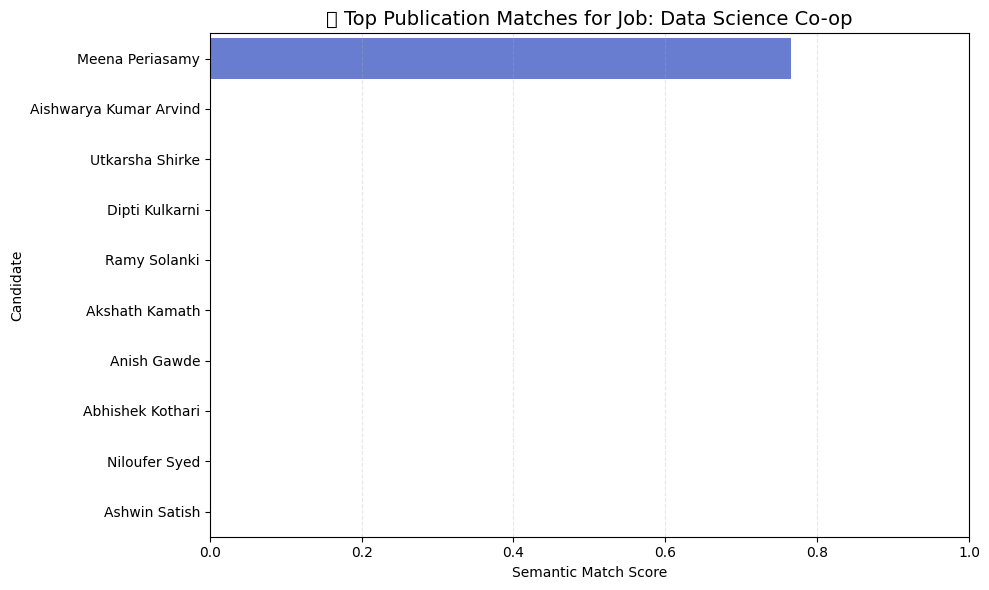

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:94: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


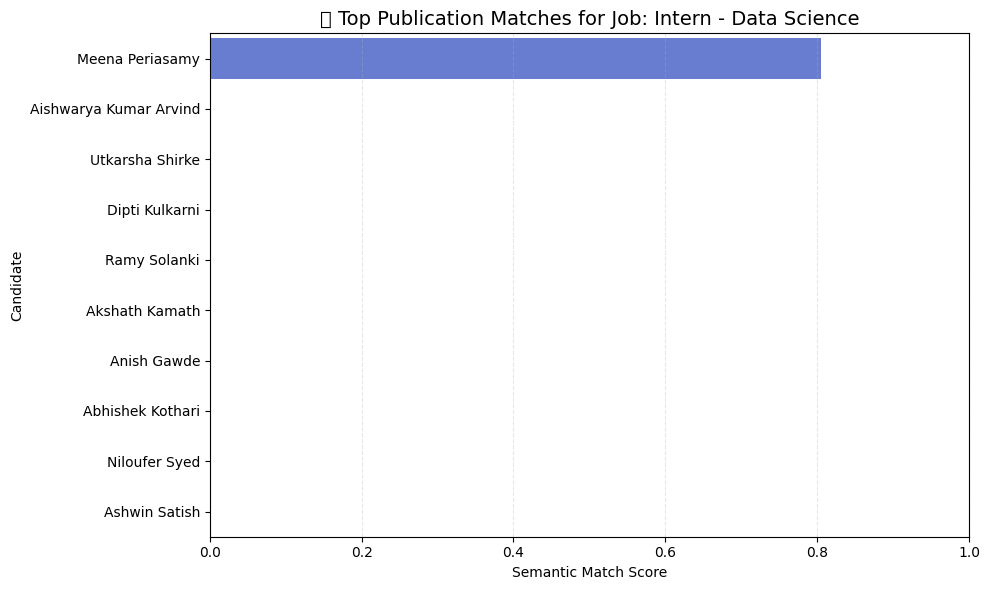

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:94: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


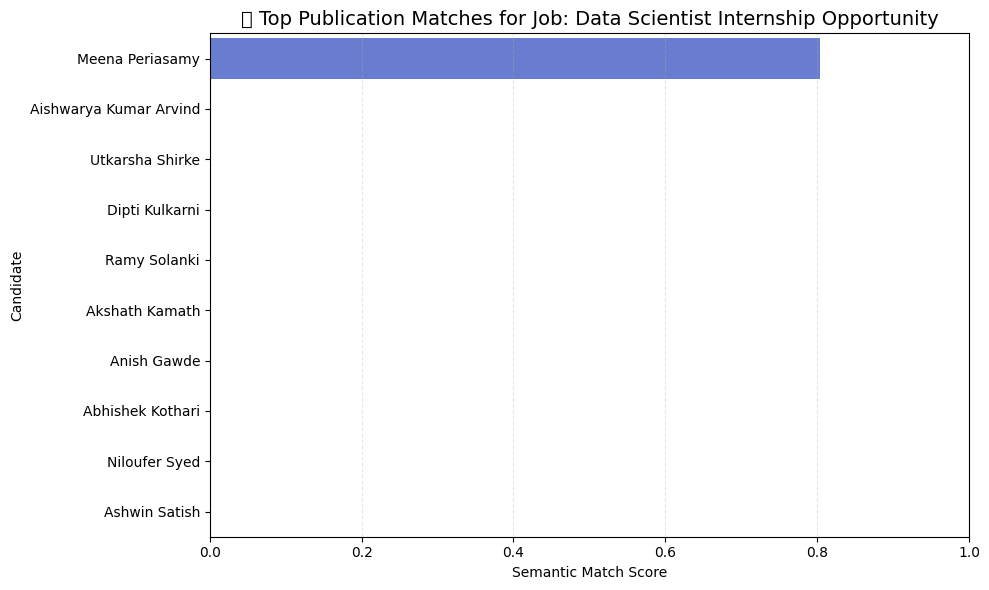

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:94: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


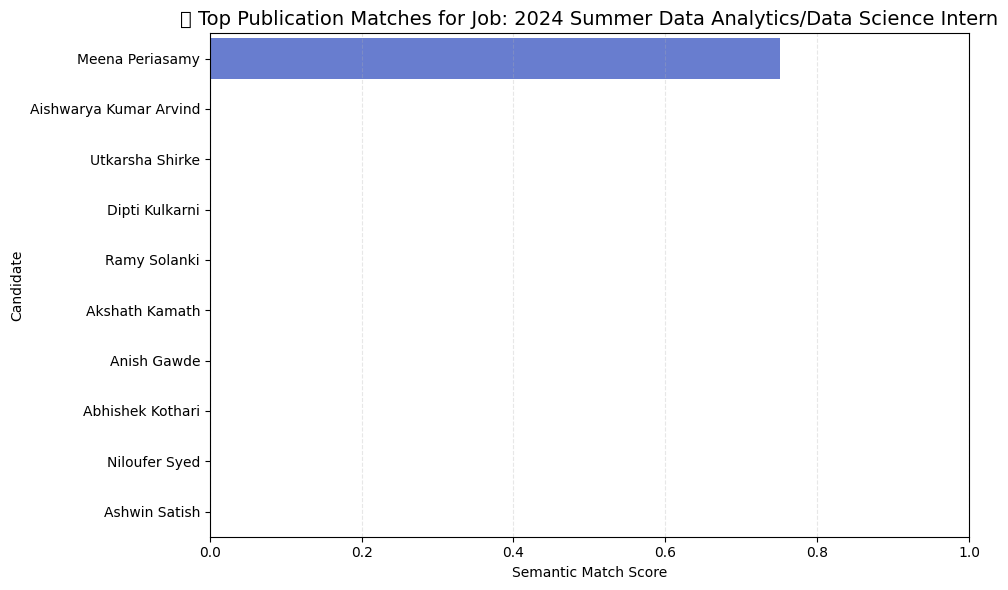

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:94: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


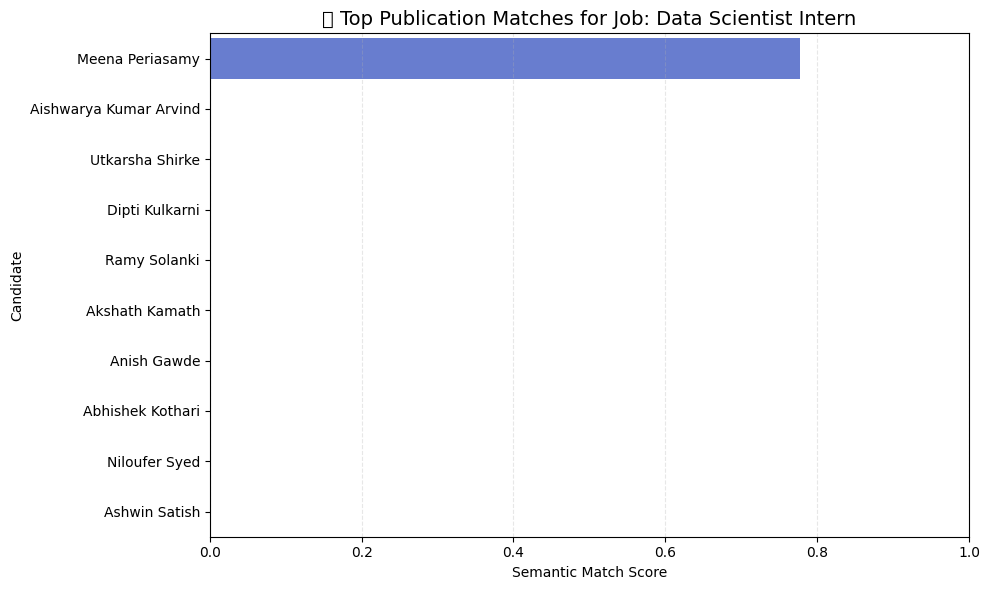

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:94: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


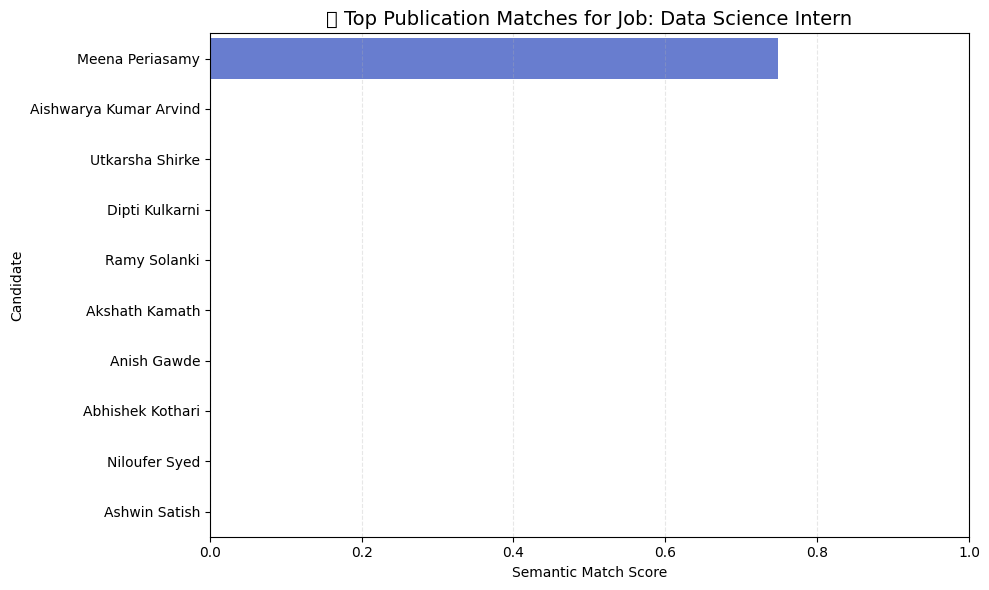

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:94: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


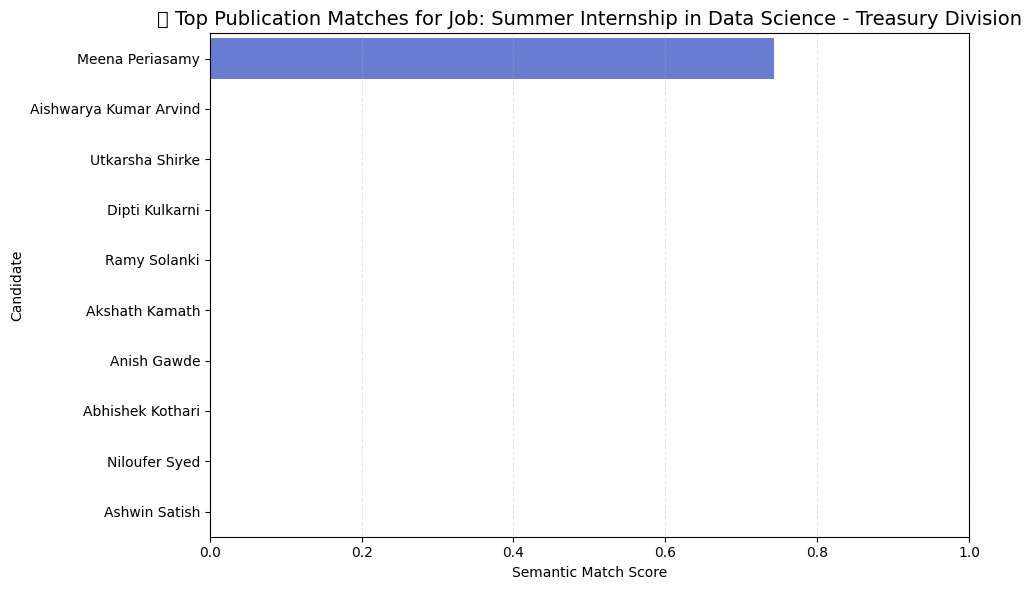

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:94: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


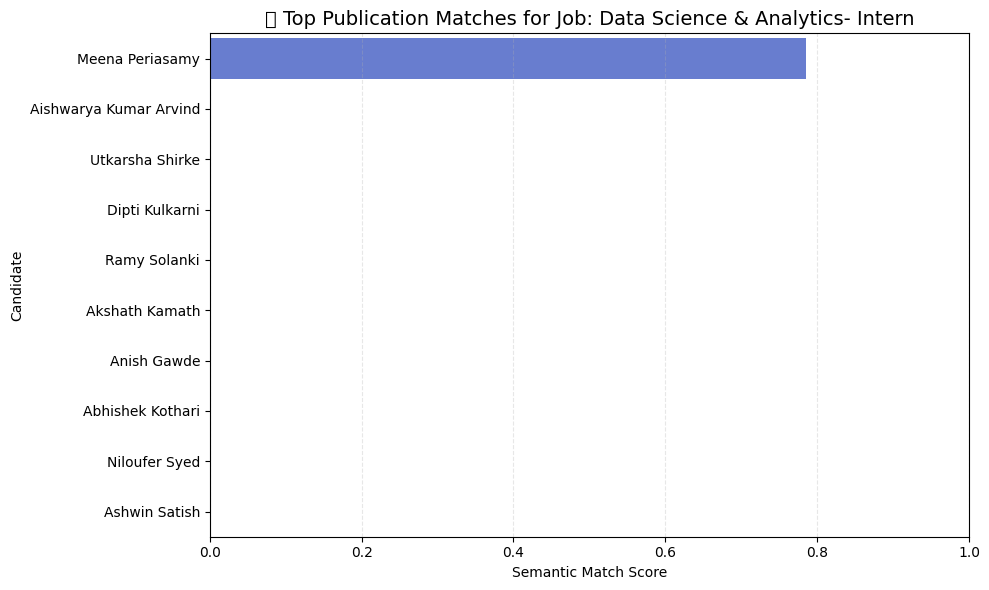

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:94: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


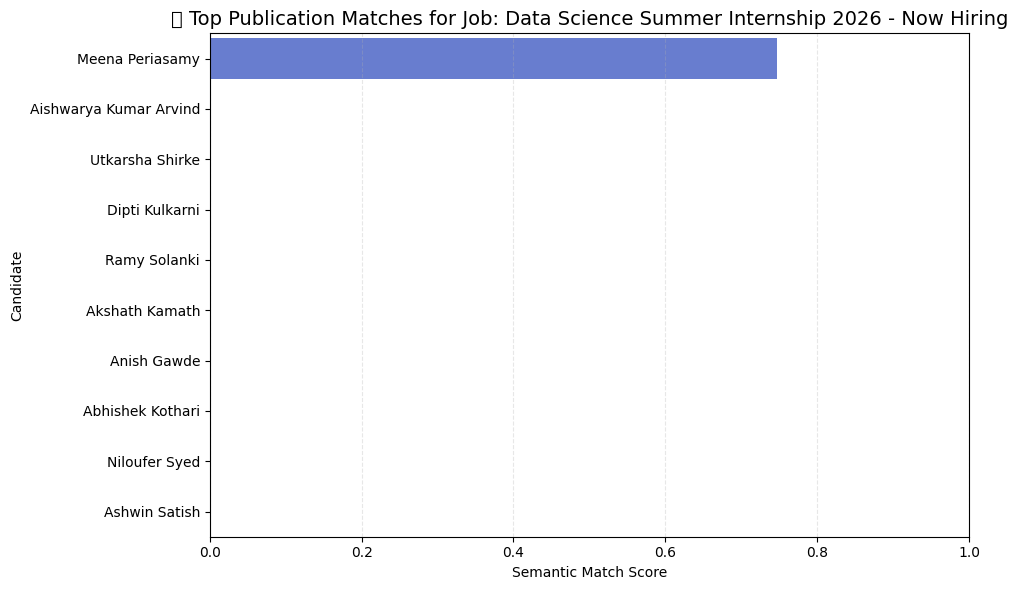

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3056294680.py:94: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


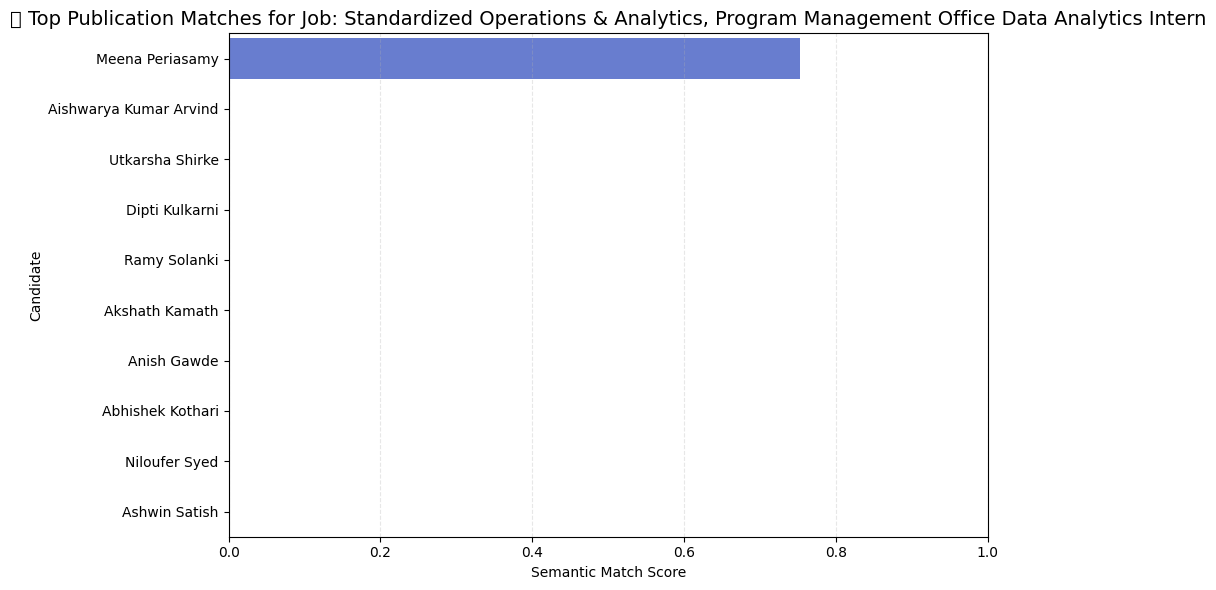

In [80]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, util

# Load data
feature_df = pd.read_csv("semantic_feature_dataset_final.csv")
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')

# Load ensemble models
models = {
    "mpnet": SentenceTransformer("all-mpnet-base-v2"),
    "e5": SentenceTransformer("intfloat/e5-base"),
    "bge": SentenceTransformer("BAAI/bge-base-en-v1.5")
}

# Extract job role
def extract_job_role(text):
    match = re.search(r"(?:RESPONSIBILITIES|ROLE):\s*(.*?)(?:QUALIFICATIONS:|SKILLS:|$)",
                      str(text), re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else str(text).strip()

# Split and parse publication data
def split_publications(blob):
    return [p.strip() for p in str(blob).split('|') if p.strip()]

def parse_publication(pub_text):
    parts = dict(re.findall(r"(\w+): ([^;|]+)", pub_text))
    return {
        "title": parts.get("Publication_Title", "").strip(),
        "description": parts.get("Publication_Description", "").strip()
    }

# Ensemble scoring logic
def get_max_ensemble_score(text1, text2):
    scores = []
    for model in models.values():
        emb1 = model.encode(text1, convert_to_tensor=True)
        emb2 = model.encode(text2, convert_to_tensor=True)
        sim = util.cos_sim(emb1, emb2).item()
        scores.append(sim)
    return max(scores)

# Collect max publication score per candidate per job
score_records = []

for _, job_row in jobs_df.iterrows():
    job_title = job_row["Job_Title"]
    job_id = job_row["Job_ID"]
    job_text = extract_job_role(job_row["Job_Description"])

    for _, cand_row in candidates_df.iterrows():
        cand_name = cand_row["Name"]
        cand_id = cand_row["Candidate_ID"]
        publications = split_publications(cand_row["Publications"])

        best_score = 0.0
        for pub in publications:
            parsed = parse_publication(pub)
            if not parsed["description"]:
                continue
            score = get_max_ensemble_score(parsed["description"], job_text)
            best_score = max(best_score, score)

        score_records.append({
            "Job_ID": job_id,
            "Job_Title": job_title,
            "Candidate_ID": cand_id,
            "Candidate_Name": cand_name,
            "publication_semantic_score": round(best_score, 4)
        })

# Convert to DataFrame
score_df = pd.DataFrame(score_records)

# 📊 Visualize - Simple Clean Graphs
for job in score_df["Job_Title"].unique():
    job_df = score_df[score_df["Job_Title"] == job].sort_values(by="publication_semantic_score", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=job_df,
        x="publication_semantic_score",
        y="Candidate_Name",
        palette="coolwarm"
    )
    plt.title(f"📘 Top Publication Matches for Job: {job}", fontsize=14)
    plt.xlabel("Semantic Match Score")
    plt.ylabel("Candidate")
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# 📝 Optional: Save scores to CSV
# score_df.to_csv("publication_semantic_scores.csv", index=False)


C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3686501056.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="publication_semantic_score", y="Candidate_Name", palette="mako")


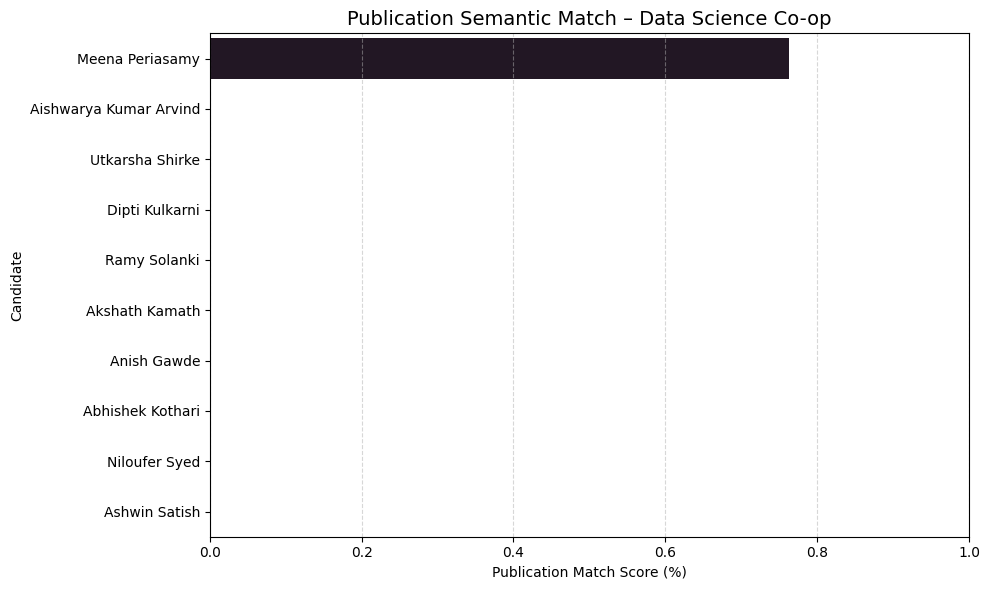

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3686501056.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="publication_semantic_score", y="Candidate_Name", palette="mako")


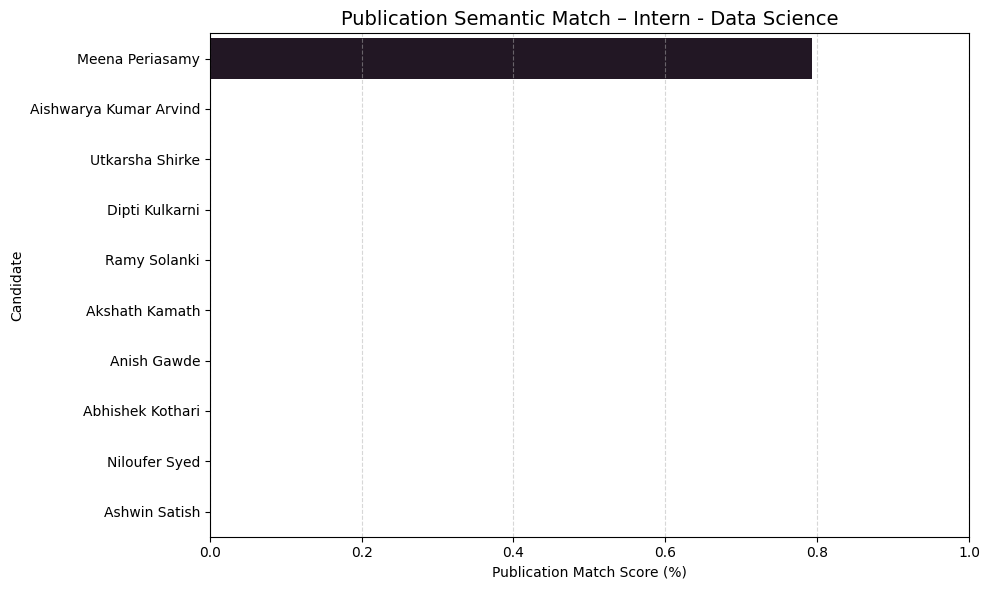

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3686501056.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="publication_semantic_score", y="Candidate_Name", palette="mako")


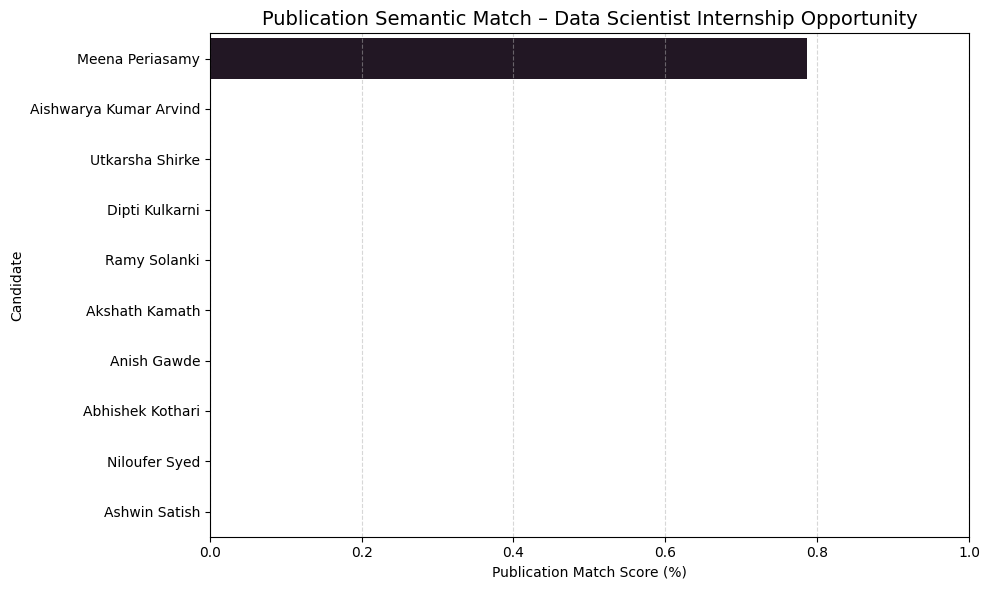

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3686501056.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="publication_semantic_score", y="Candidate_Name", palette="mako")


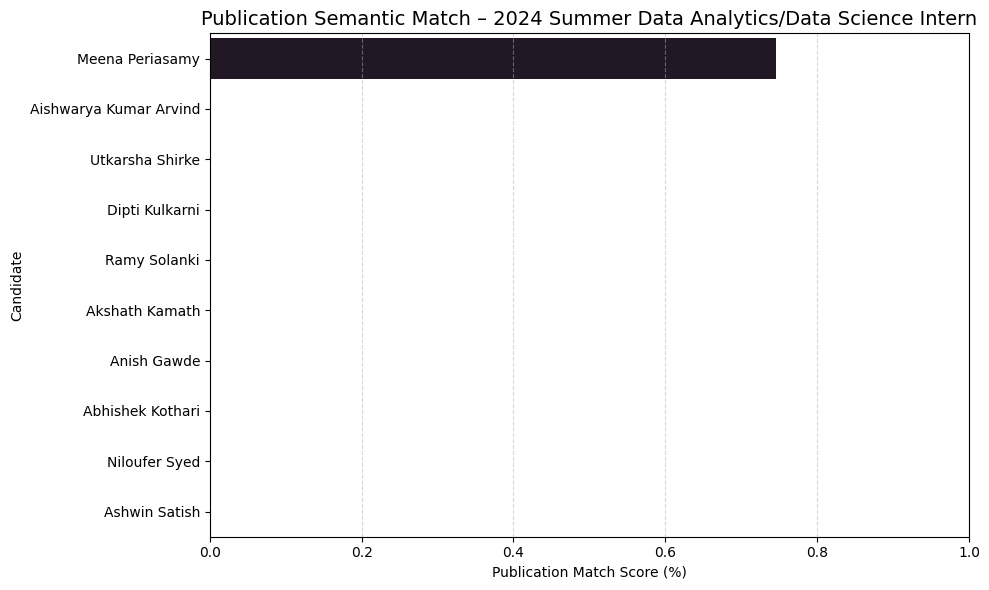

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3686501056.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="publication_semantic_score", y="Candidate_Name", palette="mako")


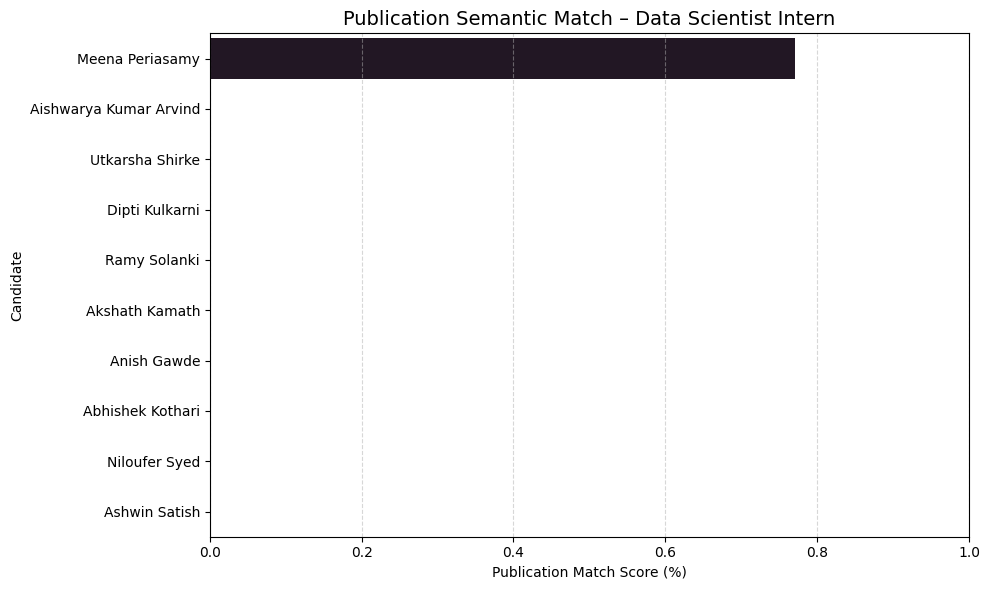

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3686501056.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="publication_semantic_score", y="Candidate_Name", palette="mako")


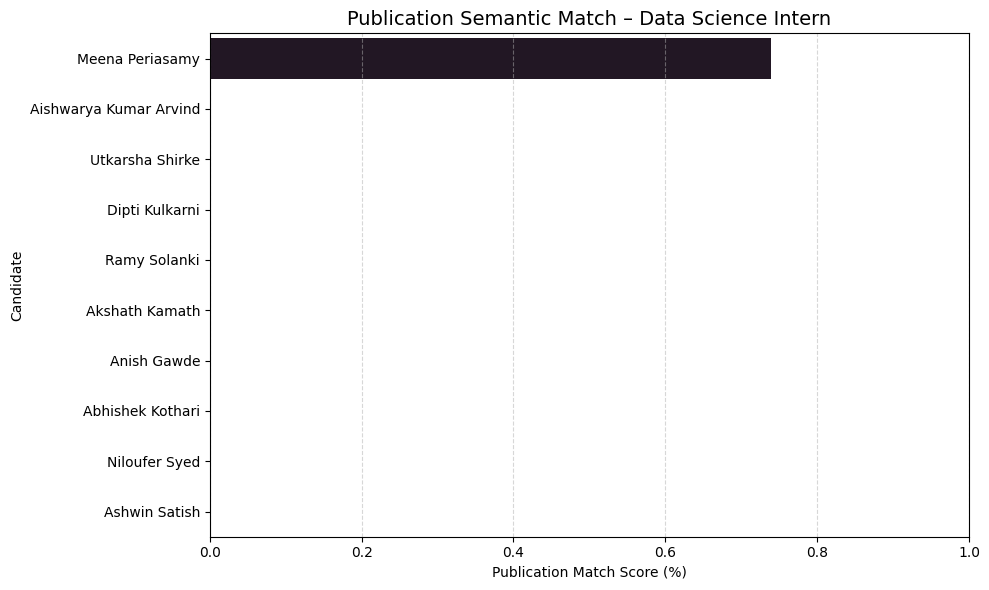

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3686501056.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="publication_semantic_score", y="Candidate_Name", palette="mako")


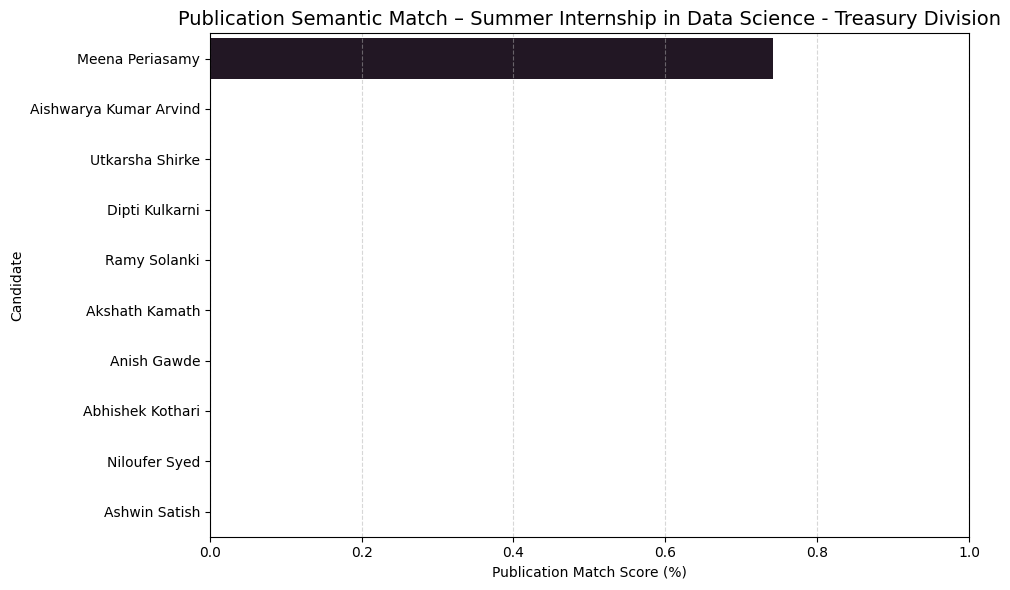

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3686501056.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="publication_semantic_score", y="Candidate_Name", palette="mako")


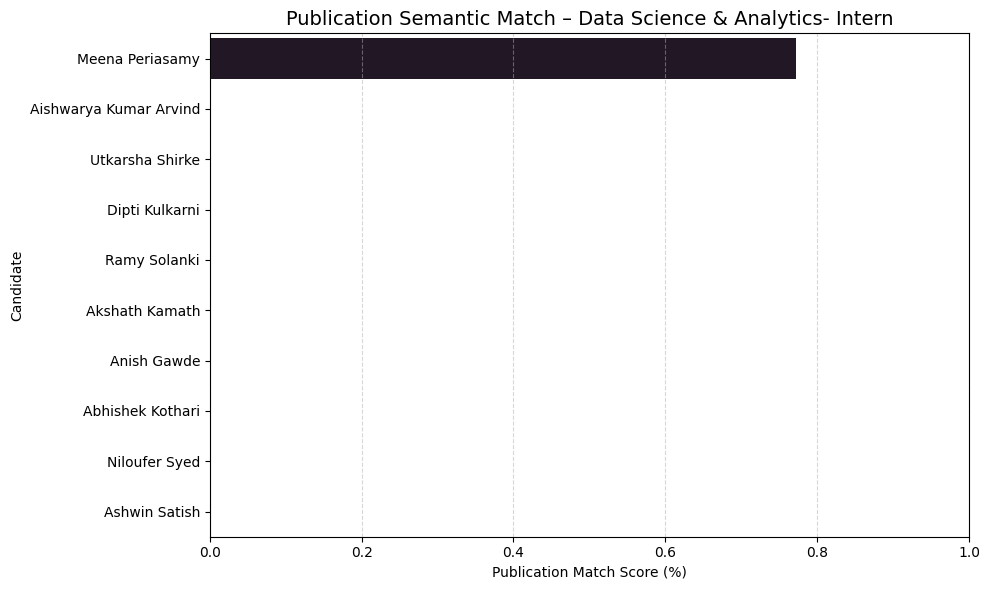

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3686501056.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="publication_semantic_score", y="Candidate_Name", palette="mako")


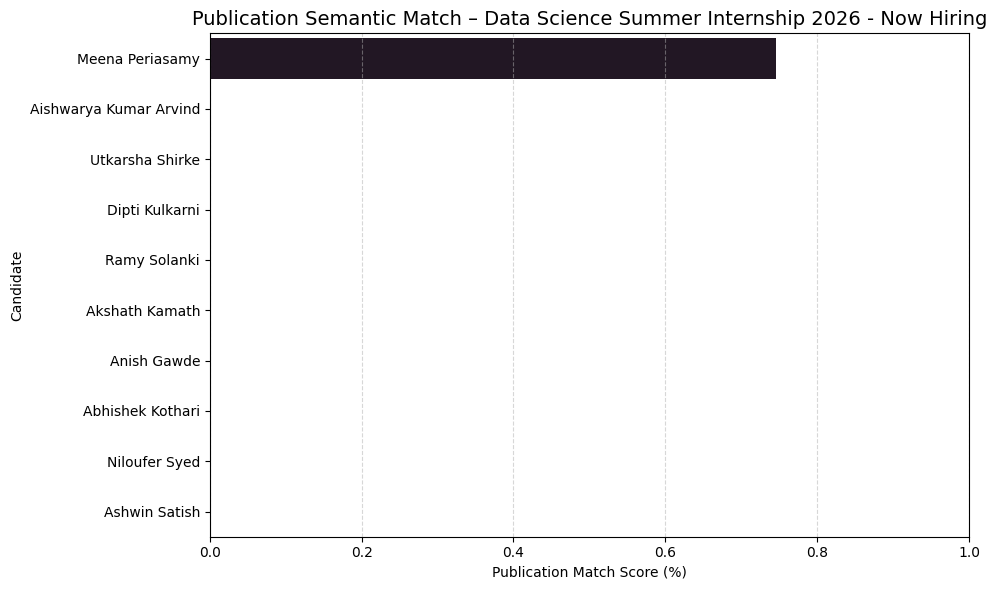

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\3686501056.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="publication_semantic_score", y="Candidate_Name", palette="mako")


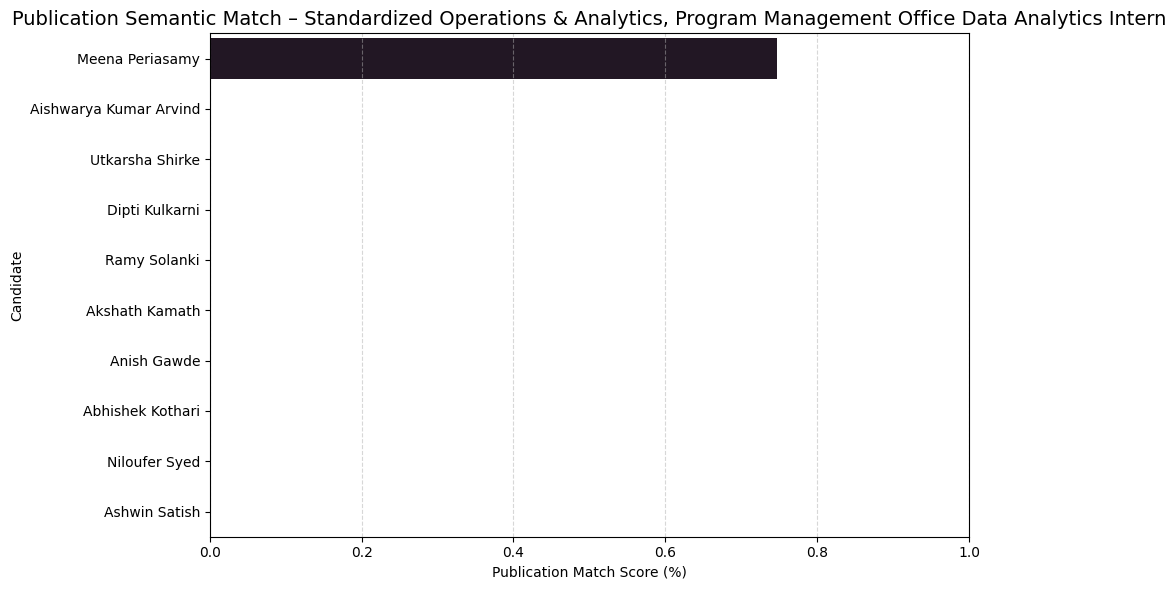

Updated: publication_semantic_score saved


In [89]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, util

# Load data
feature_df = pd.read_csv("semantic_feature_dataset_final_updated.csv")
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')

# Load Ensemble Models
models = {
    "mpnet": SentenceTransformer("all-mpnet-base-v2"),
    "e5": SentenceTransformer("intfloat/e5-base"),
    "bge": SentenceTransformer("BAAI/bge-base-en-v1.5")
}

# Extract job role or responsibility
def extract_job_role(text):
    match = re.search(r"(?:RESPONSIBILITIES|ROLE):\s*(.*?)(?:QUALIFICATIONS:|SKILLS:|$)",
                      str(text), re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else str(text).strip()

# Split publications
def split_publications(blob):
    return [p.strip() for p in str(blob).split('|') if p.strip()]

# Parse each publication
def parse_publication(pub_text):
    parts = dict(re.findall(r"(\w+): ([^;|]+)", pub_text))
    return {
        "title": parts.get("Publication_Title", "").strip(),
        "description": parts.get("Publication_Description", "").strip()
    }

# Ensemble score
def get_max_ensemble_score(text1, text2):
    scores = []
    for model in models.values():
        emb1 = model.encode(text1, convert_to_tensor=True)
        emb2 = model.encode(text2, convert_to_tensor=True)
        sim = util.cos_sim(emb1, emb2).item()
        scores.append(sim)
    return max(scores)

# Build publication semantic score table
score_records = []

for _, job_row in jobs_df.iterrows():
    job_title = job_row["Job_Title"]
    job_id = job_row["Job_ID"]
    job_text = extract_job_role(job_row["Job_Description"])

    for _, cand_row in candidates_df.iterrows():
        cand_id = cand_row["Candidate_ID"]
        cand_name = cand_row["Name"]
        publications = split_publications(cand_row["Publications"])

        pub_scores = []
        for pub in publications:
            parsed = parse_publication(pub)
            if parsed["description"]:
                score = get_max_ensemble_score(parsed["description"], job_text)
                pub_scores.append(score)

        if pub_scores:
            top_k_scores = sorted(pub_scores, reverse=True)[:3]
            avg_score = round(sum(top_k_scores) / len(top_k_scores), 4)
        else:
            avg_score = 0.0

        score_records.append({
            "Job_Title": job_title,
            "Candidate_Name": cand_name,
            "publication_semantic_score": avg_score,
            "Match (%)": f"{round(avg_score * 100)}%"
        })

# Create DataFrame
pub_score_df = pd.DataFrame(score_records)

# Visualize candidate–job score match
for job in pub_score_df["Job_Title"].unique():
    subset = pub_score_df[pub_score_df["Job_Title"] == job].sort_values(by="publication_semantic_score", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=subset, x="publication_semantic_score", y="Candidate_Name", palette="mako")

    plt.title(f"Publication Semantic Match – {job}", fontsize=14)
    plt.xlabel("Publication Match Score (%)")
    plt.ylabel("Candidate")
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    '''for index, row in subset.iterrows():
        plt.text(row["publication_semantic_score"] + 0.01, index,
                 f"{row['Match (%)']}", va='center', fontsize=9, color='dark blue')'''
    plt.tight_layout()
    plt.show()

# Optional: Merge with feature_df and save
merged_df = pd.merge(feature_df, pub_score_df[["Candidate_Name", "Job_Title", "publication_semantic_score"]],
                      on=["Candidate_Name", "Job_Title"], how="left", suffixes=("", "_new"))
merged_df["publication_semantic_score"] = merged_df["publication_semantic_score_new"].fillna(0.0)
merged_df.drop(columns=["publication_semantic_score_new"], inplace=True)
merged_df.to_csv("semantic_feature_dataset_final_updated", index=False)
print("Updated: publication_semantic_score saved")


In [ ]:
import pandas as pd
import re
from sentence_transformers import SentenceTransformer, util

# Load input files
feature_df = pd.read_csv("semantic_feature_dataset_final_updated.csv")
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')

# Load ensemble models
models = {
    "mpnet": SentenceTransformer("all-mpnet-base-v2"),
    "e5": SentenceTransformer("intfloat/e5-base"),
    "bge": SentenceTransformer("BAAI/bge-base-en-v1.5")
}

# Extract responsibilities or role section from job description
def extract_job_role(text):
    match = re.search(r"(?:RESPONSIBILITIES|ROLE):\s*(.*?)(?:QUALIFICATIONS:|SKILLS:|$)",
                      str(text), re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else str(text).strip()

# Split and parse publication blobs
def split_publications(blob):
    return [p.strip() for p in str(blob).split('|') if p.strip()]

def parse_publication(pub_text):
    parts = dict(re.findall(r"(\w+): ([^;|]+)", pub_text))
    return {
        "title": parts.get("Publication_Title", "").strip(),
        "description": parts.get("Publication_Description", "").strip()
    }

# Compute max similarity score using all models
def get_max_ensemble_score(text1, text2):
    scores = []
    for model in models.values():
        emb1 = model.encode(text1, convert_to_tensor=True)
        emb2 = model.encode(text2, convert_to_tensor=True)
        sim = util.cos_sim(emb1, emb2).item()
        scores.append(sim)
    return max(scores)

# Build scores
score_records = []

for _, job_row in jobs_df.iterrows():
    job_id = job_row["Job_ID"]
    job_title = job_row["Job_Title"]
    job_text = extract_job_role(job_row["Job_Description"])

    for _, cand_row in candidates_df.iterrows():
        cand_id = cand_row["Candidate_ID"]
        cand_name = cand_row["Name"]
        publications = split_publications(cand_row["Publications"])
        pub_scores = []

        for pub in publications:
            parsed = parse_publication(pub)
            if parsed["description"]:
                score = get_max_ensemble_score(parsed["description"], job_text)
                pub_scores.append(score)

        if pub_scores:
            top_k_scores = sorted(pub_scores, reverse=True)[:3]
            avg_score = round(sum(top_k_scores) / len(top_k_scores), 4)
        else:
            avg_score = 0.0

        score_records.append({
            "Candidate_ID": cand_id,
            "Job_ID": job_id,
            "publication_semantic_score": avg_score
        })

# Create dataframe of new scores
pub_df = pd.DataFrame(score_records)

# Merge and update into original CSV
merged_df = pd.merge(feature_df, pub_df, on=["Candidate_ID", "Job_ID"], how="left", suffixes=("", "_new"))
merged_df["publication_semantic_score"] = merged_df["publication_semantic_score_new"].fillna(0.0)
merged_df.drop(columns=["publication_semantic_score_new"], inplace=True)

# Save final file
merged_df.to_csv("semantic_feature_dataset_final_updated.csv", index=False)
print("Updated: publication_semantic_score saved to 'semantic_feature_dataset_final_updated.csv'")


✅ Updated: publication_semantic_score saved to 'semantic_feature_dataset_final_updated.csv'


Education Sematic Analysis


📌 Candidate: Aishwarya Kumar Arvind → Job: Data Science Co-op
  🎓 Degree: Masters of sciences, Field: Computer Science
     → Degree Score: 0.808 | Field Score: 0.8043 
  🎓 Degree: Bachelor of Engineering, Field: Electronics and Communications Engineering
     → Degree Score: 0.7864 | Field Score: 0.7497 
  🎓 Degree: High School, Field: Computer Science
     → Degree Score: 0.7503 | Field Score: 0.8043 

📌 Candidate: Meena Periasamy → Job: Data Science Co-op
  🎓 Degree: MS, Field: Data Analytics Engineering
     → Degree Score: 0.7321 | Field Score: 0.7947 
  🎓 Degree: Bachelor of Engineering, Field: Electrical Electronics and Communications Engineering
     → Degree Score: 0.7864 | Field Score: 0.7475 

📌 Candidate: Utkarsha Shirke → Job: Data Science Co-op
  🎓 Degree: Masters, Field: Management Information Systems
     → Degree Score: 0.7752 | Field Score: 0.7457 
  🎓 Degree: BE, Field: Electrical Electronics and Communications
     → Degree Score: 0.7385 | Field Score: 0.7462 

📌 C

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="education_semantic_score", y="Candidate_Name", palette="Spectral")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:120: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


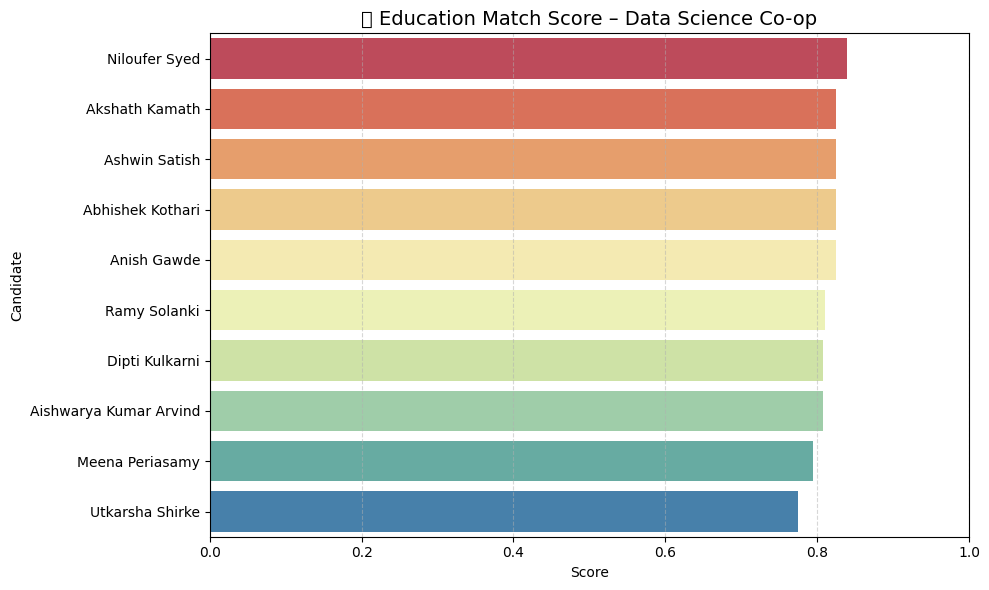

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="education_semantic_score", y="Candidate_Name", palette="Spectral")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:120: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


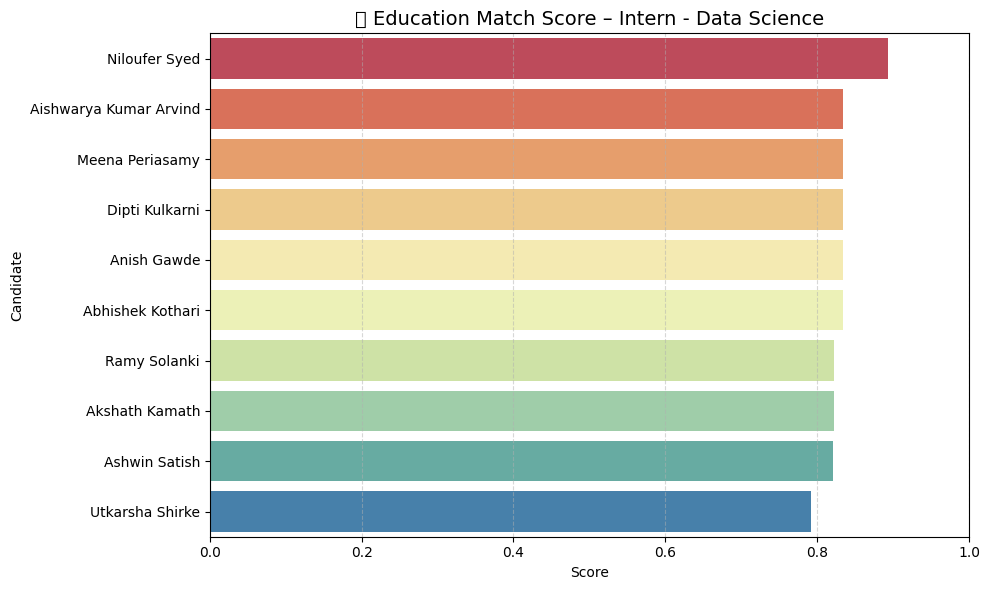

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="education_semantic_score", y="Candidate_Name", palette="Spectral")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:120: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


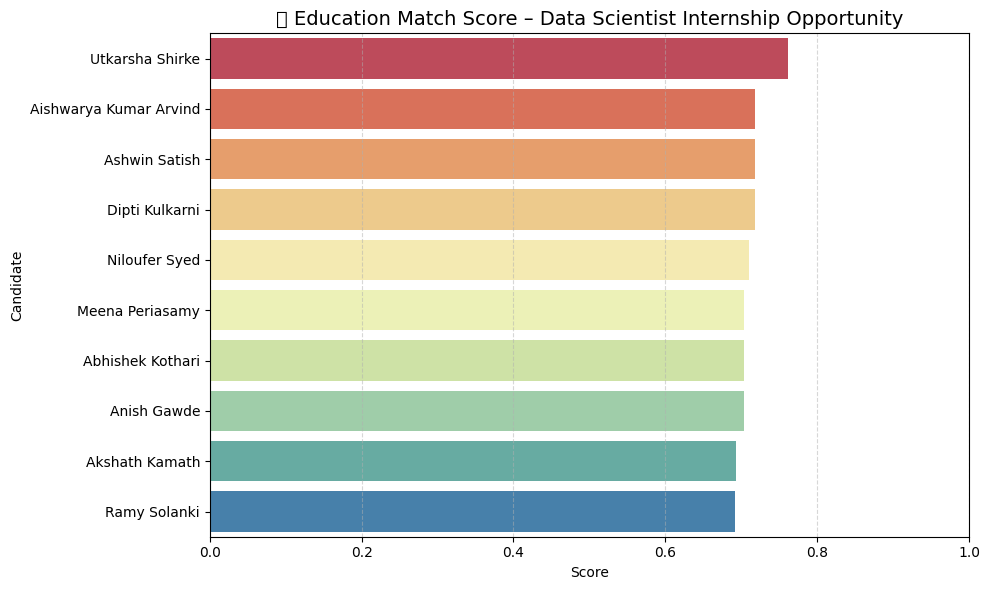

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="education_semantic_score", y="Candidate_Name", palette="Spectral")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:120: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


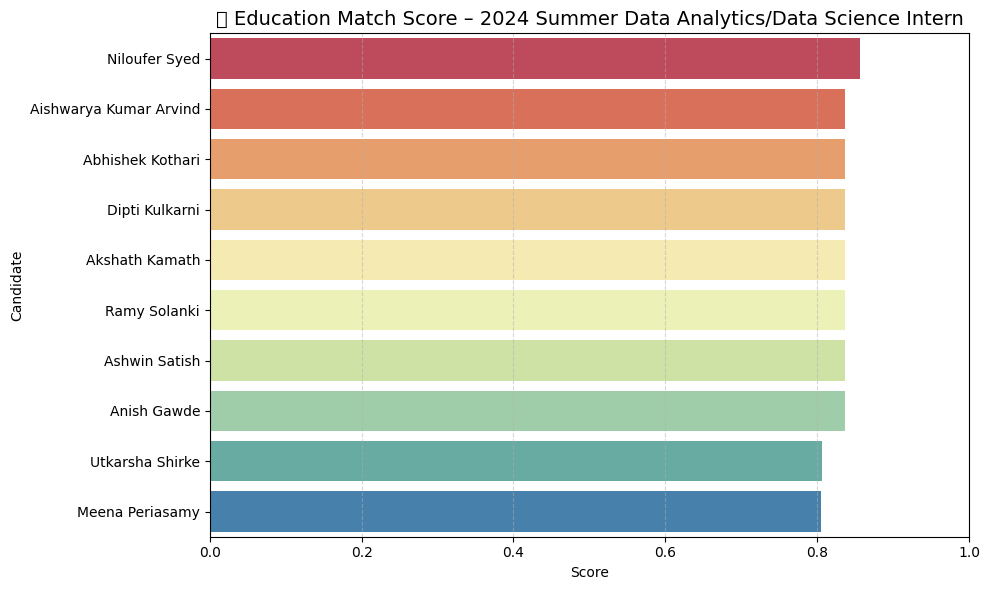

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="education_semantic_score", y="Candidate_Name", palette="Spectral")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:120: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


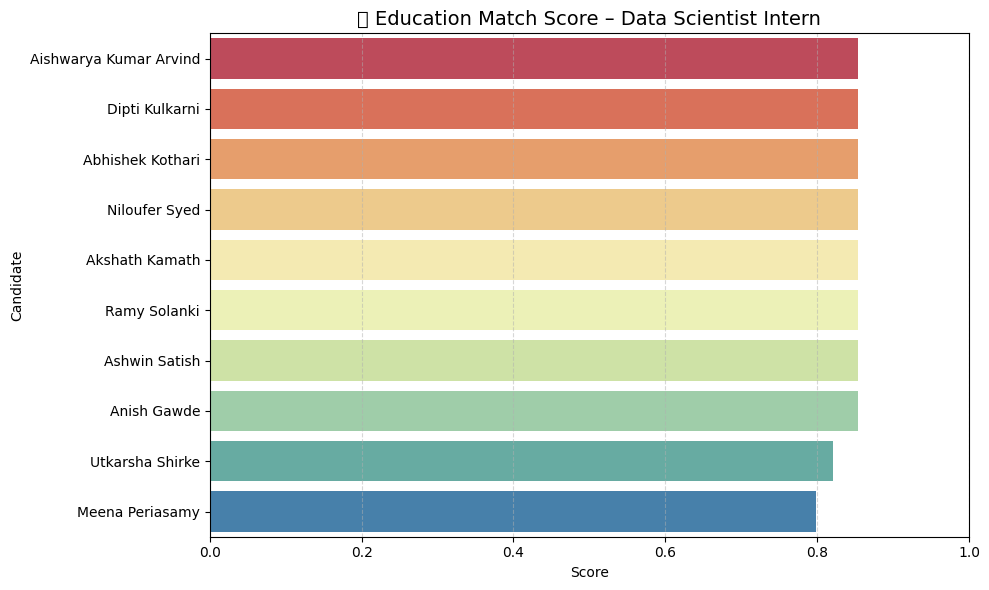

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="education_semantic_score", y="Candidate_Name", palette="Spectral")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:120: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


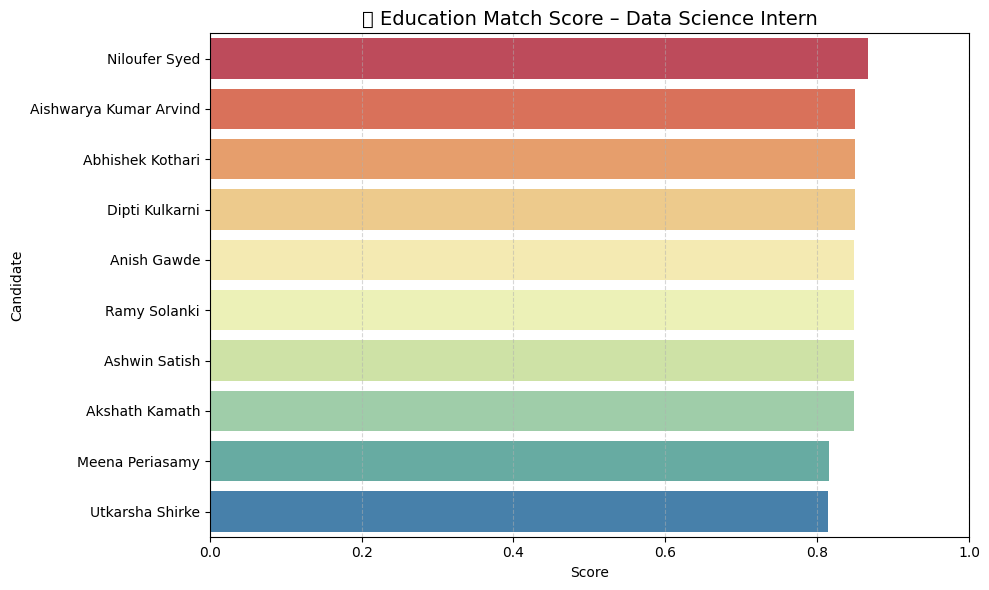

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="education_semantic_score", y="Candidate_Name", palette="Spectral")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:120: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


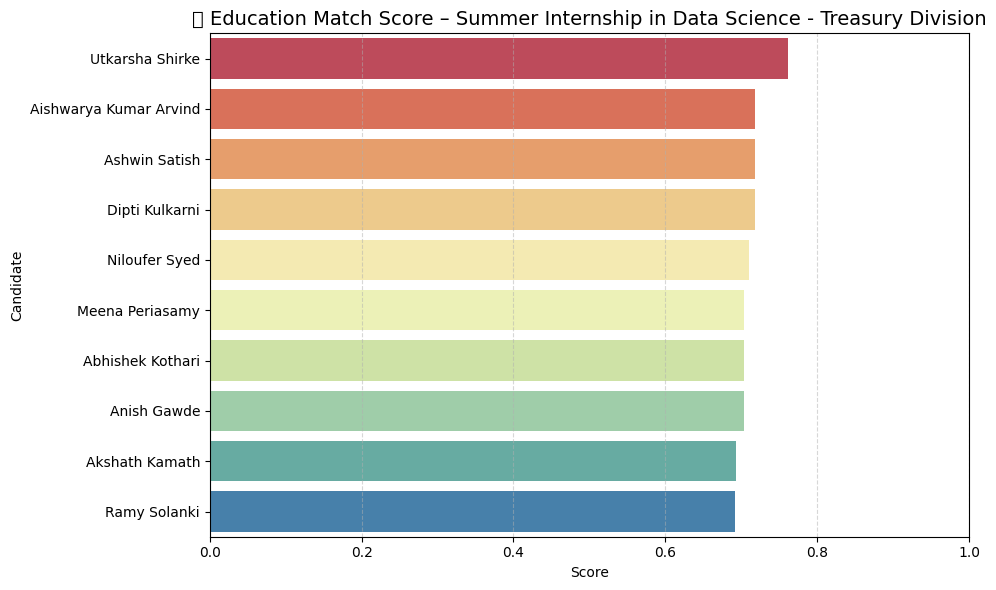

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="education_semantic_score", y="Candidate_Name", palette="Spectral")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:120: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


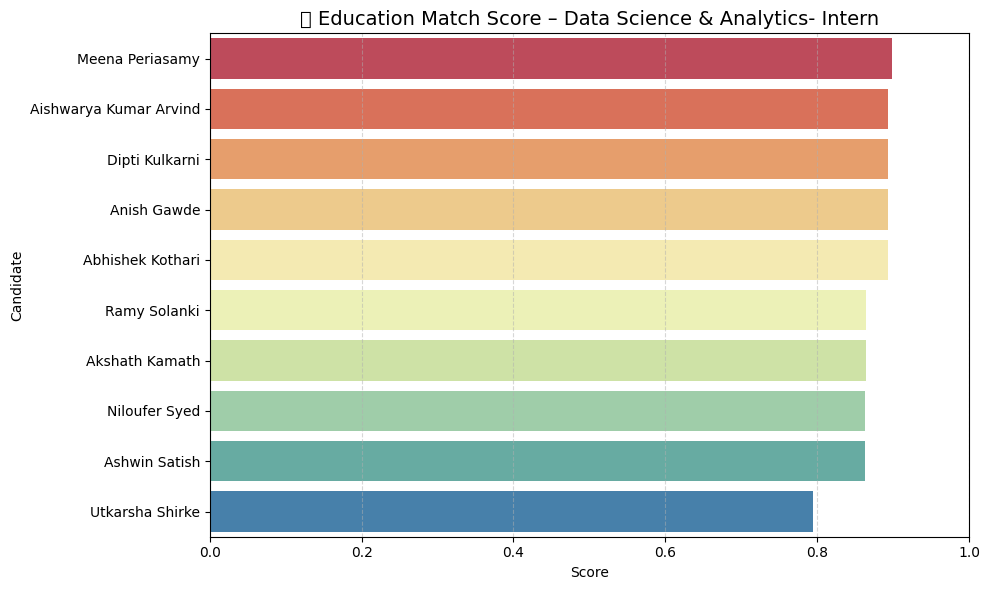

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="education_semantic_score", y="Candidate_Name", palette="Spectral")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:120: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


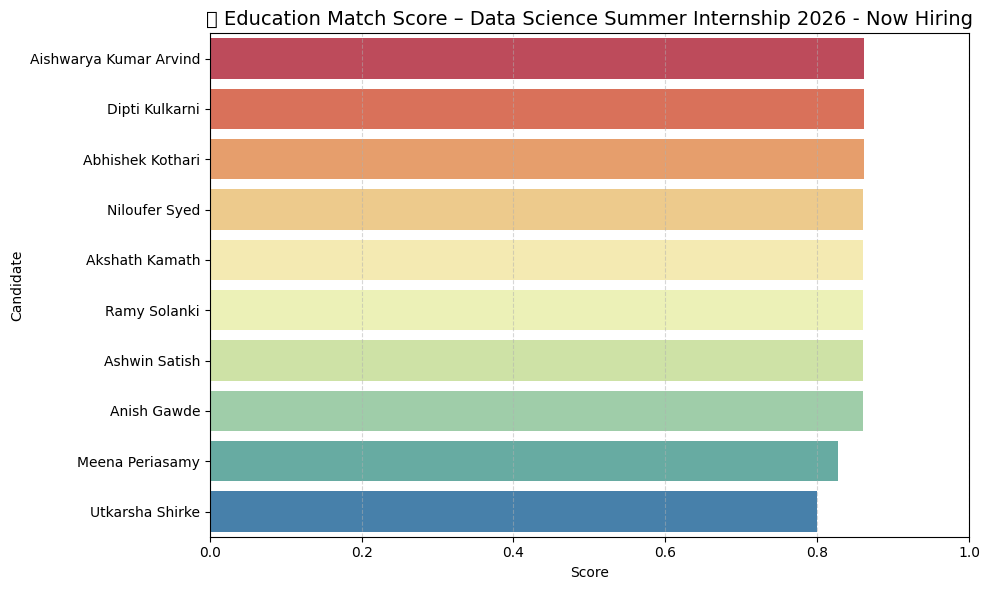

C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="education_semantic_score", y="Candidate_Name", palette="Spectral")
C:\Users\Kartik\AppData\Local\Temp\ipykernel_65976\2095890713.py:120: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Kartik\Desktop\Recruit_Code\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


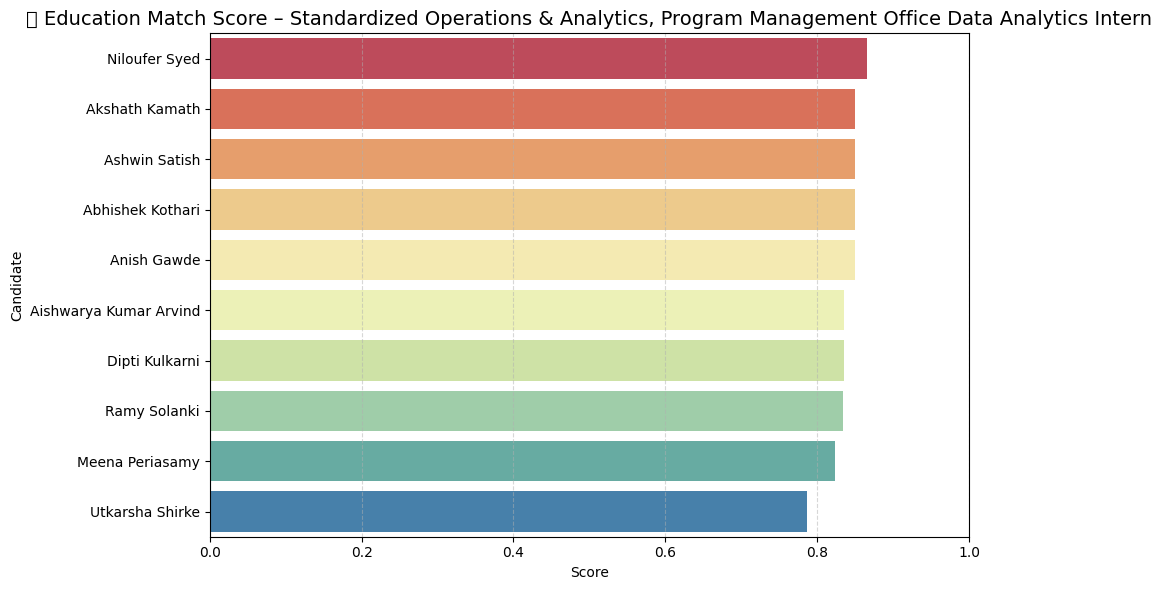

Saved updated CSV with 'education_semantic_score'


In [98]:
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, util

# Load Data
feature_df = pd.read_csv("semantic_feature_dataset_final_updated.csv")
candidates_df = pd.read_csv("Candidates/Candidate_Dataset/candidates_profiles_cleaned.csv", encoding='latin1')
jobs_df = pd.read_csv("Jobs/jobs.csv", encoding='utf-8')

# Ensemble Models
models = {
    "mpnet": SentenceTransformer("all-mpnet-base-v2"),
    "e5": SentenceTransformer("intfloat/e5-base"),
    "bge": SentenceTransformer("BAAI/bge-base-en-v1.5")
}

# Extract qualification section from job
def extract_qualification(text):
    match = re.search(r"(?:QUALIFICATIONS:|REQUIREMENTS:)\s*(.*?)(?:SKILLS:|RESPONSIBILITIES:|$)", str(text), re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else str(text).strip()

# Split education blob
def split_education(blob):
    return [e.strip() for e in str(blob).split('|') if e.strip()]

# Parse fields from education entry
def parse_education(text):
    parts = dict(re.findall(r"([\w_]+):\s*([^;|]+)", text))
    return {
        "degree": parts.get("Education_Degree", "").strip(),
        "field": parts.get("Field_Of_Study", "").strip(),
        "skills": [s.strip() for s in parts.get("Education_Skills", "").split(',') if s.strip().lower() != "none"],
        "end_year": int(parts.get("Education_End_Year", datetime.now().year)) if parts.get("Education_End_Year", "").lower() != "none" else datetime.now().year
    }


# Ensemble semantic score
def get_ensemble_score(text1, text2):
    scores = []
    for model in models.values():
        emb1 = model.encode(text1, convert_to_tensor=True)
        emb2 = model.encode(text2, convert_to_tensor=True)
        sim = util.cos_sim(emb1, emb2).item()
        scores.append(sim)
    return max(scores)

# Compute education match scores
education_scores = []

for _, job_row in jobs_df.iterrows():
    job_id = job_row["Job_ID"]
    job_title = job_row["Job_Title"]
    company = job_row["Company"]
    qual_text = extract_qualification(job_row["Job_Description"])

    for _, cand_row in candidates_df.iterrows():
        cand_id = cand_row["Candidate_ID"]
        cand_name = cand_row["Name"]
        educations = split_education(cand_row["Education"])

        if not educations:
            print(f"\n❌ No education found for candidate: {cand_name}")
            education_scores.append({
                "Candidate_ID": cand_id,
                "Candidate_Name": cand_name,
                "Job_ID": job_id,
                "Job_Title": job_title,
                "Company": company,
                "education_semantic_score": 0.0,
                "Match (%)": "0%"
            })
            continue

        parsed_educations = [parse_education(e) for e in educations]
        parsed_educations.sort(key=lambda x: x['end_year'], reverse=True)

        top_score = 0.0
        print(f"\n📌 Candidate: {cand_name} → Job: {job_title}")
        for edu in parsed_educations:
            print(f"  🎓 Degree: {edu['degree']}, Field: {edu['field']}")#, Skills: {edu['skills']}")

            degree_score = get_ensemble_score(edu["degree"], qual_text) if edu["degree"] else 0.0
            field_score = get_ensemble_score(edu["field"], qual_text) if edu["field"] else 0.0
            #skill_scores = [get_ensemble_score(skill, qual_text) for skill in edu["skills"]] if edu["skills"] else []
            #max_skill_score = max(skill_scores) if skill_scores else 0.0

            print(f"     → Degree Score: {round(degree_score, 4)} | Field Score: {round(field_score, 4)} ")#| Max Skill Score: {round(max_skill_score, 4)}")
            final_score = max(degree_score, field_score)#, max_skill_score)

            if final_score > top_score:
                top_score = final_score

        education_scores.append({
            "Candidate_ID": cand_id,
            "Candidate_Name": cand_name,
            "Job_ID": job_id,
            "Job_Title": job_title,
            "Company": company,
            "education_semantic_score": round(top_score, 4),
            "Match (%)": f"{round(top_score * 100)}%"
        })

# Create DataFrame
edu_score_df = pd.DataFrame(education_scores)

# Show visual plot
for job in edu_score_df["Job_Title"].unique():
    subset = edu_score_df[edu_score_df["Job_Title"] == job].sort_values(by="education_semantic_score", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=subset, x="education_semantic_score", y="Candidate_Name", palette="Spectral")
    plt.title(f"🎓 Education Match Score – {job}", fontsize=14)
    plt.xlabel("Score")
    plt.ylabel("Candidate")
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# === Save to CSV (optional) ===
merged_df = pd.merge(feature_df, edu_score_df[["Candidate_ID", "Job_ID", "education_semantic_score"]],
                      on=["Candidate_ID", "Job_ID"], how="left", suffixes=("", "_new"))
merged_df["education_semantic_score"] = merged_df["education_semantic_score_new"].fillna(0.0)
merged_df.drop(columns=["education_semantic_score_new"], inplace=True)
merged_df.to_csv("semantic_feature_dataset_final_updated.csv", index=False)
print("Saved updated CSV with 'education_semantic_score'")
